In [1]:
import atd2022

import torch
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)
#import  as util
from atd_CoAtNet.atd_CoAtNet import ATD_CoAtNet
from utils.tools import dotdict
from CoAtNet_Forecaster_wrapper import CoAtNetForecaster

In [2]:
import torch
torch.cuda.is_available()

True

In [8]:
from statsmodels.tsa.api import VAR

# Full Scale Test

In [3]:
torch.cuda.set_device(2) 

In [4]:
args = dotdict()

args.use_gpu=True
args.lr=0.0001
args.batch_size=59
args.train_epochs=2

In [5]:
lispDL =  CoAtNetForecaster(args)

In [6]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
#truth = truth.head(215)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [7]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispDL,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<CoAtNet_Forecaster_wrapper.CoAtNetForecaster object at 0x7fcfac08b820>:   0%|          | 0/112 [00:00<?, ?it/…

Use GPU: cuda:None


/scratch/wzong/anaconda3/envs/atd2022/lib/python3.9/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([59, 1, 20])) that is different to the input size (torch.Size([59, 20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


train_loss 31.52166175842285
train_loss 31.501996994018555
train_loss 22.138341903686523
train_loss 22.119705200195312
train_loss 1.9853025674819946
train_loss 1.9762524366378784
train_loss 1.8887487649917603
train_loss 1.8805111646652222
train_loss 3.207839012145996
train_loss 3.197430372238159
train_loss 1.9502098560333252
train_loss 1.9404094219207764
train_loss 5.19659948348999
train_loss 5.180530071258545
train_loss 3.263451337814331
train_loss 3.246173143386841
train_loss 39.20841979980469
train_loss 39.17844772338867
train_loss 4.598176956176758
train_loss 4.565562725067139
train_loss 14.651839256286621
train_loss 14.594019889831543
train_loss 2.4389777183532715
train_loss 2.3797388076782227
train_loss 1.70182204246521
train_loss 1.6207672357559204
train_loss 4.165066719055176
train_loss 4.029461860656738
train_loss 23.46949577331543
train_loss 23.17742156982422
train_loss 1.8201853036880493
train_loss 1.670604944229126
train_loss 1.251051902770996
train_loss 1.2409950494766235


train_loss 37.60683822631836
train_loss 37.641143798828125
train_loss 7.055222511291504
train_loss 6.9892730712890625
train_loss 1.8993871212005615
train_loss 1.9669480323791504
train_loss 2.4689600467681885
train_loss 2.4933691024780273
train_loss 6.896848678588867
train_loss 6.889864921569824
train_loss 11.345748901367188
train_loss 11.336798667907715
train_loss 3.8320491313934326
train_loss 3.834726095199585
train_loss 4.306742191314697
train_loss 4.143312931060791
train_loss 5.254210472106934
train_loss 5.268017768859863
train_loss 39.77717590332031
train_loss 39.7783203125
train_loss 0.9196354746818542
train_loss 0.9128280878067017
train_loss 3.2690651416778564
train_loss 3.2563350200653076
train_loss 2.32381010055542
train_loss 2.325845241546631
train_loss 5.042364597320557
train_loss 5.041677474975586
train_loss 4.38006591796875
train_loss 4.355658531188965
train_loss 0.6312114000320435
train_loss 0.6555464267730713
train_loss 8.047131538391113
train_loss 8.025429725646973
train

/scratch/wzong/LISP-ATD-2022/CoAtNet/atd_CoAtNet/atd_CoAtNet.py:154: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(inputs).to(device).float()).cpu().detach().numpy()


Use GPU: cuda:None
train_loss 31.53520965576172
train_loss 31.51253318786621
train_loss 22.153310775756836
train_loss 22.132030487060547
train_loss 1.9995704889297485
train_loss 1.9892768859863281
train_loss 1.8955962657928467
train_loss 1.886540412902832
train_loss 3.209160327911377
train_loss 3.1974823474884033
train_loss 1.9572638273239136
train_loss 1.9464017152786255
train_loss 5.19055700302124
train_loss 5.173413276672363
train_loss 3.265787124633789
train_loss 3.2474169731140137
train_loss 39.18803787231445
train_loss 39.15503692626953
train_loss 4.58603048324585
train_loss 4.551908016204834
train_loss 14.617225646972656
train_loss 14.563475608825684
train_loss 2.4206316471099854
train_loss 2.350795030593872
train_loss 1.6670140027999878
train_loss 1.5745466947555542
train_loss 4.097123622894287
train_loss 3.942847967147827
train_loss 23.351099014282227
train_loss 23.03923225402832
train_loss 1.7534855604171753
train_loss 1.5924779176712036
train_loss 1.2706660032272339
train_lo

train_loss 5.151584625244141
train_loss 5.04046106338501
train_loss 37.7660026550293
train_loss 37.78227615356445
train_loss 6.910950660705566
train_loss 6.863797664642334
train_loss 2.350712776184082
train_loss 2.4955601692199707
train_loss 2.8990538120269775
train_loss 2.688400983810425
train_loss 6.909074306488037
train_loss 6.94421911239624
train_loss 11.48558235168457
train_loss 11.54609489440918
train_loss 3.7614123821258545
train_loss 3.7584457397460938
train_loss 3.448521614074707
train_loss 3.4232943058013916
train_loss 5.4080376625061035
train_loss 5.443097114562988
train_loss 40.18769073486328
train_loss 40.082786560058594
train_loss 0.9246982932090759
train_loss 0.9167603850364685
train_loss 3.282536029815674
train_loss 3.262892484664917
train_loss 2.2782771587371826
train_loss 2.26462459564209
train_loss 5.040098190307617
train_loss 5.048281669616699
train_loss 4.241323947906494
train_loss 4.227090835571289
train_loss 0.8504384756088257
train_loss 0.8959941864013672
train_

train_loss 0.5983779430389404
train_loss 0.5541976690292358
train_loss 1.497424840927124
train_loss 1.5572724342346191
train_loss 0.6432122588157654
train_loss 0.6419304013252258
train_loss 4.778869152069092
train_loss 4.74833869934082
train_loss 1.346829891204834
train_loss 1.3425883054733276
train_loss 0.9386057257652283
train_loss 0.9258405566215515
train_loss 1.7053242921829224
train_loss 1.712300419807434
train_loss 2.097965717315674
train_loss 2.0831620693206787
train_loss 5.942227363586426
train_loss 5.915738105773926
train_loss 2.2501683235168457
train_loss 2.009143352508545
train_loss 0.7170639634132385
train_loss 0.7231548428535461
train_loss 4.515063285827637
train_loss 4.599517345428467
train_loss 0.49580496549606323
train_loss 0.49390262365341187
train_loss 1.043008804321289
train_loss 0.9740763902664185
train_loss 4.1135077476501465
train_loss 4.1770453453063965
train_loss 17.846282958984375
train_loss 17.795909881591797
train_loss 0.5578614473342896
train_loss 0.53440397

train_loss 3.6292619705200195
train_loss 0.795506477355957
train_loss 0.7955285906791687
train_loss 0.9227816462516785
train_loss 0.9215441346168518
train_loss 1.9493792057037354
train_loss 1.9548125267028809
train_loss 12.291932106018066
train_loss 12.271369934082031
train_loss 57.164703369140625
train_loss 57.160804748535156
train_loss 7.214245319366455
train_loss 7.208741188049316
train_loss 3.7655491828918457
train_loss 3.7453181743621826
train_loss 127.53091430664062
train_loss 126.96260070800781
train_loss 0.9393619298934937
train_loss 1.018752932548523
train_loss 1.1618797779083252
train_loss 1.3165398836135864
train_loss 1.22502601146698
train_loss 1.1771875619888306
train_loss 9.476984024047852
train_loss 9.472758293151855
train_loss 78.9104232788086
train_loss 78.90907287597656
train_loss 10.632458686828613
train_loss 10.658514022827148
train_loss 3.1683554649353027
train_loss 3.0115737915039062
train_loss 1.6349517107009888
train_loss 1.571081280708313
train_loss 0.902809262

train_loss 0.9636522531509399
train_loss 1.3986321687698364
train_loss 1.368343472480774
train_loss 0.7892922163009644
train_loss 0.7909674048423767
train_loss 0.9381260275840759
train_loss 0.9204135537147522
train_loss 1.049709439277649
train_loss 1.0443003177642822
train_loss 1.9417695999145508
train_loss 1.9294352531433105
train_loss 23.035282135009766
train_loss 23.039752960205078
train_loss 0.909776508808136
train_loss 0.8975265622138977
train_loss 3.635815143585205
train_loss 3.616481065750122
train_loss 1.1218504905700684
train_loss 1.0254402160644531
train_loss 0.9463553428649902
train_loss 0.9650086164474487
train_loss 1.2603986263275146
train_loss 1.241816759109497
train_loss 7.169470310211182
train_loss 7.187565803527832
train_loss 19.383562088012695
train_loss 19.336994171142578
train_loss 28.26557159423828
train_loss 27.99603271484375
train_loss 4.89713716506958
train_loss 4.832631587982178
train_loss 2.313209295272827
train_loss 2.2691092491149902
train_loss 13.3813180923

train_loss 4.4174628257751465
train_loss 6.836741924285889
train_loss 6.829164028167725
train_loss 1.3911855220794678
train_loss 1.398787021636963
train_loss 6.617544174194336
train_loss 6.612042427062988
train_loss 137.24781799316406
train_loss 137.090087890625
train_loss 0.5713951587677002
train_loss 0.5612243413925171
train_loss 1.5516502857208252
train_loss 1.5247855186462402
train_loss 7.424795627593994
train_loss 7.364164352416992
train_loss 1.722698450088501
train_loss 1.7158968448638916
train_loss 2.4631667137145996
train_loss 2.4620282649993896
train_loss 4.564509391784668
train_loss 4.562033176422119
train_loss 33.70376205444336
train_loss 33.62914276123047
train_loss 1.1866095066070557
train_loss 1.2060837745666504
train_loss 3.403195381164551
train_loss 3.3874595165252686
train_loss 1.5310215950012207
train_loss 1.510240912437439
train_loss 3.3234338760375977
train_loss 3.2593941688537598
train_loss 4.609999656677246
train_loss 4.550416469573975
train_loss 2.879117488861084

train_loss 1.6640721559524536
train_loss 0.9238010048866272
train_loss 0.8968415856361389
train_loss 0.7697582840919495
train_loss 0.7914413809776306
train_loss 65.86293029785156
train_loss 65.94680786132812
train_loss 2.7357892990112305
train_loss 2.7262682914733887
train_loss 4.65788459777832
train_loss 4.5885820388793945
train_loss 5.799576282501221
train_loss 5.752959728240967
train_loss 0.8864474892616272
train_loss 0.880092442035675
train_loss 1.471635341644287
train_loss 1.5040150880813599
train_loss 0.6453860998153687
train_loss 0.6451177000999451
train_loss 5.901217937469482
train_loss 5.903826713562012
train_loss 1.1690200567245483
train_loss 1.1647642850875854
train_loss 0.7943857312202454
train_loss 0.7930469512939453
train_loss 2.9768691062927246
train_loss 2.9717700481414795
train_loss 7.625640392303467
train_loss 7.613915920257568
train_loss 55.68455505371094
train_loss 55.641971588134766
train_loss 7.461127758026123
train_loss 7.445693016052246
train_loss 1.322139024734

train_loss 2.5535504817962646
train_loss 14.0606050491333
train_loss 14.05822467803955
train_loss 7.527994632720947
train_loss 7.5134663581848145
train_loss 1.0546696186065674
train_loss 1.0478050708770752
train_loss 0.9570285677909851
train_loss 0.9547686576843262
train_loss 7.565706729888916
train_loss 7.5915303230285645
train_loss 2.0995845794677734
train_loss 2.0903854370117188
train_loss 5.666643142700195
train_loss 5.644273281097412
train_loss 14.286233901977539
train_loss 14.288126945495605
train_loss 0.523598849773407
train_loss 0.5264330506324768
train_loss 1.177756905555725
train_loss 1.1753408908843994
train_loss 0.476470947265625
train_loss 0.47695156931877136
train_loss 8.554678916931152
train_loss 8.560868263244629
train_loss 0.7403011322021484
train_loss 0.7406218647956848
train_loss 75.122802734375
train_loss 75.01232147216797
train_loss 0.7448720932006836
train_loss 0.7815391421318054
train_loss 1.428463339805603
train_loss 1.4724493026733398
train_loss 1.1441315412521

train_loss 0.7759958505630493
train_loss 0.7777579426765442
train_loss 1.084141492843628
train_loss 1.0735113620758057
train_loss 5.398096561431885
train_loss 5.366790294647217
train_loss 7.759620189666748
train_loss 7.690799236297607
train_loss 6.9131245613098145
train_loss 6.814113616943359
train_loss 1.1080657243728638
train_loss 1.1390409469604492
train_loss 0.5410611033439636
train_loss 0.5520954728126526
train_loss 2.5774731636047363
train_loss 2.3933801651000977
train_loss 16.23650550842285
train_loss 16.241146087646484
train_loss 0.5366806387901306
train_loss 0.4933111369609833
train_loss 1.4247746467590332
train_loss 1.4610754251480103
train_loss 2.300563335418701
train_loss 2.310849189758301
train_loss 12.492606163024902
train_loss 12.520238876342773
train_loss 2.3204126358032227
train_loss 2.2590115070343018
train_loss 25.670515060424805
train_loss 25.555143356323242
train_loss 0.6280455589294434
train_loss 0.6696398854255676
train_loss 4.119424343109131
train_loss 4.1124992

train_loss 2.3040075302124023
train_loss 3.694301128387451
train_loss 3.6357007026672363
train_loss 25.079761505126953
train_loss 25.06330680847168
train_loss 5.020452976226807
train_loss 5.044553756713867
train_loss 10.087303161621094
train_loss 10.109942436218262
train_loss 182.67010498046875
train_loss 182.6149444580078
train_loss 7.812419414520264
train_loss 7.782015800476074
train_loss 6.186037063598633
train_loss 6.157122611999512
train_loss 0.729173481464386
train_loss 0.7100508213043213
train_loss 69.2109146118164
train_loss 69.03057098388672
train_loss 0.6410807371139526
train_loss 0.6493074893951416
train_loss 3.0612032413482666
train_loss 3.042692184448242
train_loss 0.8217349648475647
train_loss 0.8214589357376099
train_loss 0.47854116559028625
train_loss 0.5041635036468506
train_loss 0.46621713042259216
train_loss 0.4678329825401306
train_loss 4.214008331298828
train_loss 4.213230609893799
train_loss 0.6828612685203552
train_loss 0.6472567915916443
train_loss 66.4232559204

train_loss 0.7448005676269531
train_loss 0.7871819138526917
train_loss 0.791588306427002
train_loss 1.17600679397583
train_loss 1.1818372011184692
train_loss 7.128927230834961
train_loss 7.129369258880615
train_loss 0.5304635167121887
train_loss 0.5368958115577698
train_loss 7.294090270996094
train_loss 7.292026042938232
train_loss 0.9114521741867065
train_loss 0.8409916162490845
train_loss 1.2176990509033203
train_loss 1.2274569272994995
train_loss 1.3385454416275024
train_loss 1.3468807935714722
train_loss 0.555049479007721
train_loss 0.5612302422523499
train_loss 2.859833240509033
train_loss 2.8348336219787598
train_loss 7.156965255737305
train_loss 7.092799663543701
train_loss 0.5777550935745239
train_loss 0.5689321160316467
train_loss 1.0785468816757202
train_loss 1.0373213291168213
train_loss 0.6968529224395752
train_loss 0.6858193278312683
train_loss 1.3251774311065674
train_loss 1.3570525646209717
train_loss 4.503876686096191
train_loss 4.505188941955566
train_loss 1.3032758235

train_loss 1.222352385520935
train_loss 13.768245697021484
train_loss 13.759065628051758
train_loss 4.0005598068237305
train_loss 4.004448413848877
train_loss 1.1317222118377686
train_loss 1.1229324340820312
train_loss 1.6109200716018677
train_loss 1.621688723564148
train_loss 4.489608287811279
train_loss 4.473325252532959
train_loss 6.654416084289551
train_loss 6.653754234313965
train_loss 1.253198266029358
train_loss 1.2540768384933472
train_loss 1.615317702293396
train_loss 1.6103719472885132
train_loss 3.0718729496002197
train_loss 3.0009469985961914
train_loss 1.481702208518982
train_loss 1.519627571105957
train_loss 1.4747614860534668
train_loss 1.4859305620193481
train_loss 7.126059055328369
train_loss 7.134349346160889
train_loss 4.322866916656494
train_loss 4.318648815155029
train_loss 0.7960523962974548
train_loss 0.7768571972846985
Use GPU: cuda:None
train_loss 31.514759063720703
train_loss 31.491748809814453
train_loss 22.13479232788086
train_loss 22.113269805908203
train_l

train_loss 4.595327377319336
train_loss 0.57386314868927
train_loss 0.5741484761238098
train_loss 16.578655242919922
train_loss 16.565462112426758
train_loss 1.129361867904663
train_loss 1.1215310096740723
train_loss 1.251254677772522
train_loss 1.2474340200424194
train_loss 1.1046029329299927
train_loss 1.0994434356689453
train_loss 1.0398615598678589
train_loss 1.0147653818130493
train_loss 0.6358160972595215
train_loss 0.6483595967292786
train_loss 3.4298017024993896
train_loss 3.419947624206543
train_loss 0.828012228012085
train_loss 0.8335995674133301
train_loss 13.861072540283203
train_loss 13.776718139648438
train_loss 1.4152002334594727
train_loss 1.4724000692367554
train_loss 1.8775774240493774
train_loss 1.7804027795791626
train_loss 5.221705436706543
train_loss 5.046968460083008
train_loss 37.8963737487793
train_loss 37.842227935791016
train_loss 7.051210403442383
train_loss 6.990089416503906
train_loss 1.9306821823120117
train_loss 1.9992702007293701
train_loss 2.5455999374

train_loss 5.203501224517822
train_loss 5.187840938568115
train_loss 3.2703893184661865
train_loss 3.253370523452759
train_loss 39.230796813964844
train_loss 39.20097732543945
train_loss 4.6056599617004395
train_loss 4.575475692749023
train_loss 14.663105010986328
train_loss 14.607695579528809
train_loss 2.4469285011291504
train_loss 2.394679307937622
train_loss 1.7079025506973267
train_loss 1.6341304779052734
train_loss 4.197527885437012
train_loss 4.051240921020508
train_loss 23.615476608276367
train_loss 23.248998641967773
train_loss 1.8693382740020752
train_loss 1.7293992042541504
train_loss 1.267270565032959
train_loss 1.2385293245315552
train_loss 1.0597997903823853
train_loss 1.143836259841919
train_loss 1.9883488416671753
train_loss 1.9890943765640259
train_loss 4.982294082641602
train_loss 4.9523091316223145
train_loss 1.637265682220459
train_loss 1.4556121826171875
train_loss 0.6000593900680542
train_loss 0.5431768894195557
train_loss 1.5119773149490356
train_loss 1.566672205

train_loss 4.447373390197754
train_loss 4.228198528289795
train_loss 5.222033977508545
train_loss 5.24534273147583
train_loss 39.760372161865234
train_loss 39.74631881713867
train_loss 0.9215894341468811
train_loss 0.9163546562194824
train_loss 3.2622196674346924
train_loss 3.250560760498047
train_loss 2.322751522064209
train_loss 2.324134588241577
train_loss 5.042335510253906
train_loss 5.04044771194458
train_loss 4.3872294425964355
train_loss 4.362046718597412
train_loss 0.6234450340270996
train_loss 0.6369831562042236
train_loss 8.04338550567627
train_loss 8.049839973449707
train_loss 2.0914580821990967
train_loss 2.0204427242279053
train_loss 3.1845555305480957
train_loss 3.1472814083099365
train_loss 0.6923611760139465
train_loss 0.681486964225769
train_loss 0.6538094282150269
train_loss 0.6425960659980774
train_loss 3.6058192253112793
train_loss 3.618598461151123
train_loss 0.7920876145362854
train_loss 0.7905758619308472
train_loss 0.9198012351989746
train_loss 0.917331159114837

train_loss 1.698728084564209
train_loss 1.7068710327148438
train_loss 2.0947065353393555
train_loss 2.073014259338379
train_loss 5.919160842895508
train_loss 5.871272087097168
train_loss 2.306511402130127
train_loss 2.1733810901641846
train_loss 0.7189768552780151
train_loss 0.7144066095352173
train_loss 4.518552780151367
train_loss 4.557469844818115
train_loss 0.49108606576919556
train_loss 0.4929475486278534
train_loss 1.1131107807159424
train_loss 1.0067601203918457
train_loss 4.13185453414917
train_loss 4.178297519683838
train_loss 17.903728485107422
train_loss 17.859073638916016
train_loss 0.5634016990661621
train_loss 0.5428153276443481
train_loss 0.6728515625
train_loss 0.6505327820777893
train_loss 3.3730177879333496
train_loss 3.3525376319885254
train_loss 0.8493513464927673
train_loss 0.832784116268158
train_loss 0.9115167260169983
train_loss 0.9150761961936951
train_loss 1.3451471328735352
train_loss 1.3486353158950806
train_loss 0.798162043094635
train_loss 0.78933793306350

train_loss 7.205948352813721
train_loss 7.218279838562012
train_loss 3.764718770980835
train_loss 3.7473835945129395
train_loss 127.4000015258789
train_loss 127.06095123291016
train_loss 0.9260581135749817
train_loss 0.9657250046730042
train_loss 1.0239936113357544
train_loss 1.1334391832351685
train_loss 0.9635452032089233
train_loss 1.0104868412017822
train_loss 9.466545104980469
train_loss 9.462257385253906
train_loss 78.79771423339844
train_loss 78.7161636352539
train_loss 10.698330879211426
train_loss 10.734111785888672
train_loss 4.15104341506958
train_loss 3.8955321311950684
train_loss 1.8838012218475342
train_loss 1.720546007156372
train_loss 1.003071665763855
train_loss 0.9447484016418457
train_loss 1.2492176294326782
train_loss 1.1165663003921509
train_loss 4.343272686004639
train_loss 4.363499164581299
train_loss 6.846592426300049
train_loss 6.832705497741699
train_loss 1.3771600723266602
train_loss 1.4026551246643066
train_loss 6.6191606521606445
train_loss 6.60913133621215

train_loss 0.8997021913528442
train_loss 0.8972423076629639
train_loss 3.5328762531280518
train_loss 3.548280954360962
train_loss 1.217004656791687
train_loss 1.1594767570495605
train_loss 0.9203405976295471
train_loss 0.9650515913963318
train_loss 1.2726637125015259
train_loss 1.2593574523925781
train_loss 7.12083101272583
train_loss 7.171393871307373
train_loss 19.348873138427734
train_loss 19.299623489379883
train_loss 28.21687889099121
train_loss 27.96384048461914
train_loss 4.892081260681152
train_loss 4.840633869171143
train_loss 2.3183681964874268
train_loss 2.2683990001678467
train_loss 13.403570175170898
train_loss 13.245369911193848
train_loss 11.425766944885254
train_loss 11.395109176635742
train_loss 4.482061862945557
train_loss 4.2360100746154785
train_loss 1.3651899099349976
train_loss 1.1601781845092773
train_loss 1.686795711517334
train_loss 1.6557044982910156
train_loss 0.9178956151008606
train_loss 0.8944270014762878
train_loss 0.7736993432044983
train_loss 0.79698622

train_loss 7.437319278717041
train_loss 1.7501097917556763
train_loss 1.7234654426574707
train_loss 2.475569248199463
train_loss 2.4585483074188232
train_loss 4.591562271118164
train_loss 4.5765061378479
train_loss 33.89101791381836
train_loss 33.7969856262207
train_loss 1.1283750534057617
train_loss 1.151140809059143
train_loss 3.391413688659668
train_loss 3.3822152614593506
train_loss 1.504778265953064
train_loss 1.4982082843780518
train_loss 3.226285696029663
train_loss 3.232661724090576
train_loss 4.630304336547852
train_loss 4.595947742462158
train_loss 2.9020729064941406
train_loss 2.886169195175171
train_loss 1.0987526178359985
train_loss 1.0835320949554443
train_loss 1.380544900894165
train_loss 1.362337350845337
train_loss 0.7744198441505432
train_loss 0.7485507726669312
train_loss 1.663101315498352
train_loss 1.6721147298812866
train_loss 1.0553412437438965
train_loss 1.0740182399749756
train_loss 2.7399380207061768
train_loss 2.65145206451416
train_loss 13.956931114196777
tr

train_loss 2.7172868251800537
train_loss 2.7119290828704834
train_loss 4.5950541496276855
train_loss 4.553859710693359
train_loss 5.735507488250732
train_loss 5.690337657928467
train_loss 0.8793714642524719
train_loss 0.8747326135635376
train_loss 1.5571091175079346
train_loss 1.5794987678527832
train_loss 0.6448283791542053
train_loss 0.6431261897087097
train_loss 5.903817653656006
train_loss 5.898979187011719
train_loss 1.1699938774108887
train_loss 1.1707898378372192
train_loss 0.7965368628501892
train_loss 0.7946752309799194
train_loss 3.0132803916931152
train_loss 2.976485013961792
train_loss 7.62518310546875
train_loss 7.617137908935547
train_loss 55.67195510864258
train_loss 55.644981384277344
train_loss 7.466134071350098
train_loss 7.45759391784668
train_loss 1.3445779085159302
train_loss 1.3477301597595215
train_loss 1.1877533197402954
train_loss 1.1957330703735352
train_loss 1.8596924543380737
train_loss 1.8717784881591797
train_loss 2.7063379287719727
train_loss 2.7090046405

train_loss 0.9550086855888367
train_loss 7.602933883666992
train_loss 7.596604824066162
train_loss 2.1003146171569824
train_loss 2.1001291275024414
train_loss 5.699535846710205
train_loss 5.678204536437988
train_loss 14.27871036529541
train_loss 14.277812004089355
train_loss 0.5281814336776733
train_loss 0.5246508121490479
train_loss 1.1280579566955566
train_loss 1.1459041833877563
train_loss 0.463112473487854
train_loss 0.46689391136169434
train_loss 8.586052894592285
train_loss 8.567730903625488
train_loss 0.7245896458625793
train_loss 0.7180319428443909
train_loss 75.04985046386719
train_loss 74.95942687988281
train_loss 0.7291295528411865
train_loss 0.7570762634277344
train_loss 1.3755732774734497
train_loss 1.448954463005066
train_loss 1.1516201496124268
train_loss 1.1196060180664062
train_loss 0.7632768750190735
train_loss 0.7002531886100769
train_loss 2.4058549404144287
train_loss 2.129958152770996
train_loss 1.1853057146072388
train_loss 1.1638457775115967
train_loss 2.28695750

train_loss 6.773491382598877
train_loss 1.1045045852661133
train_loss 1.1618577241897583
train_loss 0.5311827659606934
train_loss 0.5513607859611511
train_loss 2.4026482105255127
train_loss 2.2946503162384033
train_loss 16.24346351623535
train_loss 16.24293327331543
train_loss 0.5235300660133362
train_loss 0.49437931180000305
train_loss 1.4265663623809814
train_loss 1.4366079568862915
train_loss 2.2922141551971436
train_loss 2.289881944656372
train_loss 12.499419212341309
train_loss 12.464289665222168
train_loss 2.2991511821746826
train_loss 2.274017572402954
train_loss 25.649633407592773
train_loss 25.519695281982422
train_loss 0.6474633812904358
train_loss 0.6835048198699951
train_loss 4.115756511688232
train_loss 4.114220142364502
train_loss 2.4051082134246826
train_loss 2.4252636432647705
train_loss 7.042879581451416
train_loss 7.053874969482422
train_loss 11.188249588012695
train_loss 11.052813529968262
train_loss 0.5491974949836731
train_loss 0.528430700302124
train_loss 0.729063

train_loss 25.06760597229004
train_loss 5.008039474487305
train_loss 5.046752452850342
train_loss 10.122373580932617
train_loss 10.117206573486328
train_loss 182.63255310058594
train_loss 182.61439514160156
train_loss 7.796877861022949
train_loss 7.795770168304443
train_loss 6.184990406036377
train_loss 6.144893169403076
train_loss 0.7261428236961365
train_loss 0.7109286785125732
train_loss 69.23089599609375
train_loss 69.05696868896484
train_loss 0.6372888684272766
train_loss 0.6451811194419861
train_loss 3.0581777095794678
train_loss 3.0338685512542725
train_loss 0.8192334175109863
train_loss 0.8217387795448303
train_loss 0.482265442609787
train_loss 0.493306040763855
train_loss 0.4595494568347931
train_loss 0.4697967767715454
train_loss 4.207940578460693
train_loss 4.213015556335449
train_loss 0.659912109375
train_loss 0.632817804813385
train_loss 66.37889862060547
train_loss 66.29277801513672
train_loss 2.5415732860565186
train_loss 2.5490479469299316
train_loss 4.09291410446167
tr

train_loss 0.5298159122467041
train_loss 0.5243163704872131
train_loss 7.285501480102539
train_loss 7.2935028076171875
train_loss 0.9584936499595642
train_loss 0.9005953073501587
train_loss 1.1946017742156982
train_loss 1.2190251350402832
train_loss 1.3272302150726318
train_loss 1.3334530591964722
train_loss 0.5493277311325073
train_loss 0.5489539504051208
train_loss 2.8485469818115234
train_loss 2.826564311981201
train_loss 7.127946376800537
train_loss 7.082083225250244
train_loss 0.566496729850769
train_loss 0.5579690337181091
train_loss 1.067618489265442
train_loss 1.0482568740844727
train_loss 0.6992695927619934
train_loss 0.6857756972312927
train_loss 1.3246454000473022
train_loss 1.3442424535751343
train_loss 4.506224155426025
train_loss 4.512707233428955
train_loss 1.2655320167541504
train_loss 1.2258436679840088
train_loss 0.7800198197364807
train_loss 0.7873350381851196
train_loss 0.9042344093322754
train_loss 0.9119604229927063
train_loss 1.0607304573059082
train_loss 1.06559

train_loss 1.254622459411621
train_loss 1.6203088760375977
train_loss 1.6115598678588867
train_loss 4.361687183380127
train_loss 4.367191791534424
train_loss 6.676856517791748
train_loss 6.66903829574585
train_loss 1.6656330823898315
train_loss 1.587978482246399
train_loss 1.6274690628051758
train_loss 1.6080834865570068
train_loss 3.075486183166504
train_loss 3.017277717590332
train_loss 1.4195526838302612
train_loss 1.457667589187622
train_loss 1.4392231702804565
train_loss 1.4615226984024048
train_loss 7.097108364105225
train_loss 7.118990898132324
train_loss 4.317469596862793
train_loss 4.309882640838623
train_loss 0.787773847579956
train_loss 0.7907785773277283
Use GPU: cuda:None
train_loss 31.500682830810547
train_loss 31.477924346923828
train_loss 22.109954833984375
train_loss 22.08854866027832
train_loss 1.9740068912506104
train_loss 1.9636293649673462
train_loss 1.8852808475494385
train_loss 1.8761796951293945
train_loss 3.192460775375366
train_loss 3.180683135986328
train_los

train_loss 1.1633284091949463
train_loss 1.1427994966506958
train_loss 1.255692958831787
train_loss 1.2553417682647705
train_loss 1.1205285787582397
train_loss 1.10733163356781
train_loss 1.050060510635376
train_loss 1.027552604675293
train_loss 0.6037057638168335
train_loss 0.6248814463615417
train_loss 3.490131378173828
train_loss 3.449084520339966
train_loss 0.7961291670799255
train_loss 0.8096628785133362
train_loss 13.906765937805176
train_loss 13.777172088623047
train_loss 1.3982127904891968
train_loss 1.4858317375183105
train_loss 2.1017093658447266
train_loss 2.1199793815612793
train_loss 5.212510108947754
train_loss 5.06085729598999
train_loss 37.86445236206055
train_loss 37.845680236816406
train_loss 7.033527851104736
train_loss 6.989564418792725
train_loss 1.9101920127868652
train_loss 1.9656504392623901
train_loss 2.520103931427002
train_loss 2.5197761058807373
train_loss 6.893721103668213
train_loss 6.883749485015869
train_loss 11.338476181030273
train_loss 11.345797538757

train_loss 4.547783374786377
train_loss 14.620823860168457
train_loss 14.5696439743042
train_loss 2.4096426963806152
train_loss 2.3531343936920166
train_loss 1.6594539880752563
train_loss 1.5855427980422974
train_loss 4.117443561553955
train_loss 3.9684345722198486
train_loss 23.37584114074707
train_loss 23.04129981994629
train_loss 1.7994621992111206
train_loss 1.6726224422454834
train_loss 1.203895092010498
train_loss 1.2318575382232666
train_loss 1.0994423627853394
train_loss 1.1920523643493652
train_loss 2.010359764099121
train_loss 1.985205054283142
train_loss 5.001454830169678
train_loss 4.961258411407471
train_loss 1.5754843950271606
train_loss 1.456289529800415
train_loss 0.6049153804779053
train_loss 0.551931619644165
train_loss 1.4941880702972412
train_loss 1.5444111824035645
train_loss 0.6378952264785767
train_loss 0.6349963545799255
train_loss 4.771236896514893
train_loss 4.73454475402832
train_loss 1.3415923118591309
train_loss 1.3360977172851562
train_loss 0.9353115558624

train_loss 0.9164789915084839
train_loss 0.9124749898910522
train_loss 3.2698004245758057
train_loss 3.254899501800537
train_loss 2.3456733226776123
train_loss 2.30830717086792
train_loss 5.048482894897461
train_loss 5.050992012023926
train_loss 4.353724002838135
train_loss 4.341046333312988
train_loss 0.6535711288452148
train_loss 0.6579302549362183
train_loss 8.014381408691406
train_loss 8.007611274719238
train_loss 1.850621223449707
train_loss 1.7674651145935059
train_loss 3.2306625843048096
train_loss 3.1786434650421143
train_loss 0.7328736782073975
train_loss 0.6961435079574585
train_loss 0.65938800573349
train_loss 0.645074188709259
train_loss 3.6123111248016357
train_loss 3.6437807083129883
train_loss 0.7913796305656433
train_loss 0.791410505771637
train_loss 0.9221671223640442
train_loss 0.919035792350769
train_loss 1.960789442062378
train_loss 1.9611936807632446
train_loss 12.295967102050781
train_loss 12.273088455200195
train_loss 57.191349029541016
train_loss 57.173076629638

train_loss 2.0941293239593506
train_loss 0.7134740352630615
train_loss 0.7195988297462463
train_loss 4.499066352844238
train_loss 4.54565954208374
train_loss 0.49280235171318054
train_loss 0.49204662442207336
train_loss 1.0787819623947144
train_loss 0.9667834043502808
train_loss 4.124079704284668
train_loss 4.193455219268799
train_loss 17.936487197875977
train_loss 17.833486557006836
train_loss 0.5701367259025574
train_loss 0.5430449843406677
train_loss 0.660193681716919
train_loss 0.6463469862937927
train_loss 3.363616466522217
train_loss 3.3377654552459717
train_loss 0.8355590105056763
train_loss 0.820478618144989
train_loss 0.917151153087616
train_loss 0.9471662044525146
train_loss 1.3645387887954712
train_loss 1.3478425741195679
train_loss 0.788243293762207
train_loss 0.7858926653862
train_loss 0.9288323521614075
train_loss 0.9235803484916687
train_loss 1.0505167245864868
train_loss 1.0410531759262085
train_loss 1.9624027013778687
train_loss 1.955637812614441
train_loss 23.02808952

train_loss 1.106528878211975
train_loss 1.3775571584701538
train_loss 1.5694173574447632
train_loss 1.412693738937378
train_loss 1.302324652671814
train_loss 9.464492797851562
train_loss 9.465824127197266
train_loss 79.14938354492188
train_loss 79.18134307861328
train_loss 10.593340873718262
train_loss 10.595199584960938
train_loss 2.604247808456421
train_loss 2.49250864982605
train_loss 1.5958627462387085
train_loss 1.553441047668457
train_loss 0.9138817191123962
train_loss 0.8882712125778198
train_loss 1.1623036861419678
train_loss 1.0762184858322144
train_loss 4.335655689239502
train_loss 4.355199813842773
train_loss 6.859757423400879
train_loss 6.843063831329346
train_loss 1.34210205078125
train_loss 1.3542600870132446
train_loss 6.636294364929199
train_loss 6.625341415405273
train_loss 137.26571655273438
train_loss 137.17138671875
train_loss 0.5547977685928345
train_loss 0.5451601147651672
train_loss 1.5260376930236816
train_loss 1.5013272762298584
train_loss 7.389500141143799
tra

train_loss 0.9570229649543762
train_loss 1.2711281776428223
train_loss 1.2554575204849243
train_loss 7.1288909912109375
train_loss 7.138664722442627
train_loss 19.304967880249023
train_loss 19.2609920501709
train_loss 28.192129135131836
train_loss 27.90932273864746
train_loss 4.882279872894287
train_loss 4.829543590545654
train_loss 2.302149534225464
train_loss 2.269930601119995
train_loss 13.360037803649902
train_loss 13.232025146484375
train_loss 11.404842376708984
train_loss 11.371687889099121
train_loss 4.384740352630615
train_loss 4.205563545227051
train_loss 1.462347149848938
train_loss 1.2069404125213623
train_loss 1.6876778602600098
train_loss 1.6633177995681763
train_loss 0.9314200282096863
train_loss 0.9014844298362732
train_loss 0.7857539653778076
train_loss 0.8033401370048523
train_loss 65.91780090332031
train_loss 65.98651123046875
train_loss 2.7707409858703613
train_loss 2.7540793418884277
train_loss 4.676470756530762
train_loss 4.629305839538574
train_loss 5.820950984954

train_loss 33.60309982299805
train_loss 1.2010648250579834
train_loss 1.2117903232574463
train_loss 3.3970754146575928
train_loss 3.3831489086151123
train_loss 1.5371290445327759
train_loss 1.4851398468017578
train_loss 3.282576560974121
train_loss 3.230285406112671
train_loss 4.534340858459473
train_loss 4.487196445465088
train_loss 2.878537893295288
train_loss 2.8760998249053955
train_loss 1.0654360055923462
train_loss 1.0639363527297974
train_loss 1.3160734176635742
train_loss 1.3019956350326538
train_loss 0.7288640737533569
train_loss 0.7234355211257935
train_loss 1.7595082521438599
train_loss 1.7442868947982788
train_loss 1.1288197040557861
train_loss 1.1341575384140015
train_loss 2.5574545860290527
train_loss 2.5228018760681152
train_loss 14.03341007232666
train_loss 14.036534309387207
train_loss 7.4692182540893555
train_loss 7.422794818878174
train_loss 1.083770513534546
train_loss 1.0607012510299683
train_loss 0.9472444653511047
train_loss 0.9495411515235901
train_loss 7.643635

train_loss 0.6421319842338562
train_loss 0.64081871509552
train_loss 5.908135414123535
train_loss 5.911259651184082
train_loss 1.1717747449874878
train_loss 1.17067289352417
train_loss 0.8012521266937256
train_loss 0.7924681901931763
train_loss 2.980969190597534
train_loss 2.9792943000793457
train_loss 7.632915496826172
train_loss 7.627248764038086
train_loss 55.599605560302734
train_loss 55.580474853515625
train_loss 7.447785377502441
train_loss 7.4309797286987305
train_loss 1.4535191059112549
train_loss 1.470365285873413
train_loss 1.175223469734192
train_loss 1.1783428192138672
train_loss 1.8542909622192383
train_loss 1.8589023351669312
train_loss 2.707078218460083
train_loss 2.6995081901550293
train_loss 0.7747595906257629
train_loss 0.7738688588142395
train_loss 1.0793954133987427
train_loss 1.0739060640335083
train_loss 5.356725692749023
train_loss 5.347586154937744
train_loss 7.786201000213623
train_loss 7.733235836029053
train_loss 6.893936634063721
train_loss 6.799317359924316

train_loss 14.284494400024414
train_loss 14.283507347106934
train_loss 0.5230442881584167
train_loss 0.5246249437332153
train_loss 1.1434886455535889
train_loss 1.1342185735702515
train_loss 0.4631558656692505
train_loss 0.4649367034435272
train_loss 8.604231834411621
train_loss 8.589559555053711
train_loss 0.7085935473442078
train_loss 0.7288098931312561
train_loss 75.0488510131836
train_loss 74.93457794189453
train_loss 0.7265217900276184
train_loss 0.7529069781303406
train_loss 1.3951497077941895
train_loss 1.4430162906646729
train_loss 1.1599489450454712
train_loss 1.1214239597320557
train_loss 0.7288725972175598
train_loss 0.7501886487007141
train_loss 2.443333148956299
train_loss 2.2033190727233887
train_loss 1.1829756498336792
train_loss 1.1636765003204346
train_loss 2.2721800804138184
train_loss 2.308842658996582
train_loss 3.715548276901245
train_loss 3.629589796066284
train_loss 25.067054748535156
train_loss 25.053239822387695
train_loss 5.030985355377197
train_loss 5.0626239

train_loss 16.23020362854004
train_loss 16.242290496826172
train_loss 0.5180265307426453
train_loss 0.4850887060165405
train_loss 1.413355827331543
train_loss 1.4492064714431763
train_loss 2.2956600189208984
train_loss 2.3009824752807617
train_loss 12.52287483215332
train_loss 12.475761413574219
train_loss 2.2889158725738525
train_loss 2.2746400833129883
train_loss 25.669933319091797
train_loss 25.568498611450195
train_loss 0.6538281440734863
train_loss 0.6930027604103088
train_loss 4.115976333618164
train_loss 4.118320941925049
train_loss 2.253819704055786
train_loss 2.2963004112243652
train_loss 7.043819904327393
train_loss 7.049963474273682
train_loss 11.125473022460938
train_loss 10.97572135925293
train_loss 0.5595628619194031
train_loss 0.5296990275382996
train_loss 0.7294995188713074
train_loss 0.7402539253234863
train_loss 0.7752899527549744
train_loss 0.7869589328765869
train_loss 1.1939959526062012
train_loss 1.2006834745407104
train_loss 7.133559703826904
train_loss 7.1349010

train_loss 6.064303874969482
train_loss 0.7515665292739868
train_loss 0.7290931940078735
train_loss 68.65460968017578
train_loss 68.44231414794922
train_loss 0.6420639753341675
train_loss 0.6737743020057678
train_loss 3.02899432182312
train_loss 3.030679702758789
train_loss 0.850165069103241
train_loss 0.8807275891304016
train_loss 0.6105880737304688
train_loss 0.6097898483276367
train_loss 0.48232683539390564
train_loss 0.45764458179473877
train_loss 4.325588226318359
train_loss 4.206826210021973
train_loss 0.58072829246521
train_loss 0.5436774492263794
train_loss 65.87255096435547
train_loss 65.88449096679688
train_loss 2.521202325820923
train_loss 2.526374578475952
train_loss 4.156035423278809
train_loss 4.149420261383057
train_loss 4.1444783210754395
train_loss 4.168568134307861
train_loss 1.2453639507293701
train_loss 1.2354663610458374
train_loss 13.886773109436035
train_loss 13.843801498413086
train_loss 3.9481470584869385
train_loss 3.9504153728485107
train_loss 1.1461880207061

train_loss 1.2185945510864258
train_loss 1.334720253944397
train_loss 1.339620590209961
train_loss 0.5571227669715881
train_loss 0.5574688911437988
train_loss 2.862408399581909
train_loss 2.8463311195373535
train_loss 7.1585516929626465
train_loss 7.108932018280029
train_loss 0.5754213929176331
train_loss 0.5629813075065613
train_loss 1.0675956010818481
train_loss 1.0555014610290527
train_loss 0.6996209621429443
train_loss 0.6894067525863647
train_loss 1.3276861906051636
train_loss 1.337261438369751
train_loss 4.518321990966797
train_loss 4.5139994621276855
train_loss 1.3228964805603027
train_loss 1.255879282951355
train_loss 0.7820155024528503
train_loss 0.7896626591682434
train_loss 0.9083056449890137
train_loss 0.9153390526771545
train_loss 1.0641059875488281
train_loss 1.067615270614624
train_loss 0.9093964695930481
train_loss 0.8414739370346069
train_loss 4.6125712394714355
train_loss 4.619455814361572
train_loss 0.5990729928016663
train_loss 0.5849402546882629
train_loss 16.57461

train_loss 6.678317546844482
train_loss 6.669880390167236
train_loss 1.7164466381072998
train_loss 1.6035048961639404
train_loss 1.6159579753875732
train_loss 1.6067651510238647
train_loss 3.0297534465789795
train_loss 3.009526252746582
train_loss 1.4337807893753052
train_loss 1.4659998416900635
train_loss 1.4533307552337646
train_loss 1.461785912513733
train_loss 7.1349992752075195
train_loss 7.118885040283203
train_loss 4.343015670776367
train_loss 4.327852249145508
train_loss 0.8120379447937012
train_loss 0.7956816554069519
Use GPU: cuda:None
train_loss 31.46310043334961
train_loss 31.44057846069336
train_loss 22.088150024414062
train_loss 22.066850662231445
train_loss 1.9605456590652466
train_loss 1.9504053592681885
train_loss 1.8670566082000732
train_loss 1.8579782247543335
train_loss 3.1773457527160645
train_loss 3.165698289871216
train_loss 1.9236552715301514
train_loss 1.9129431247711182
train_loss 5.147158622741699
train_loss 5.130338668823242
train_loss 3.225116014480591
trai

train_loss 1.1298410892486572
train_loss 1.0874156951904297
train_loss 1.0688501596450806
train_loss 0.5671648979187012
train_loss 0.5813952088356018
train_loss 3.582899332046509
train_loss 3.5334818363189697
train_loss 0.7870873808860779
train_loss 0.7878614664077759
train_loss 14.091707229614258
train_loss 13.98125171661377
train_loss 1.3315575122833252
train_loss 1.3646320104599
train_loss 2.3147501945495605
train_loss 2.407634973526001
train_loss 5.107976913452148
train_loss 5.008895397186279
train_loss 37.7338981628418
train_loss 37.74195098876953
train_loss 7.057770252227783
train_loss 7.01793098449707
train_loss 1.8644306659698486
train_loss 1.9148491621017456
train_loss 2.445864200592041
train_loss 2.4693446159362793
train_loss 6.874152660369873
train_loss 6.87615442276001
train_loss 11.315425872802734
train_loss 11.313435554504395
train_loss 3.8617396354675293
train_loss 3.8395261764526367
train_loss 4.4759039878845215
train_loss 4.394326210021973
train_loss 5.20440149307251
t

train_loss 1.6296335458755493
train_loss 1.532469391822815
train_loss 4.0846076011657715
train_loss 3.936988353729248
train_loss 23.305986404418945
train_loss 22.945817947387695
train_loss 1.7178974151611328
train_loss 1.6045879125595093
train_loss 1.2811923027038574
train_loss 1.3717113733291626
train_loss 1.1552903652191162
train_loss 1.197585105895996
train_loss 1.9974514245986938
train_loss 1.9598853588104248
train_loss 5.0243635177612305
train_loss 5.0032196044921875
train_loss 1.451687216758728
train_loss 1.4173322916030884
train_loss 0.603431761264801
train_loss 0.5443804264068604
train_loss 1.4813332557678223
train_loss 1.5479686260223389
train_loss 0.6396176218986511
train_loss 0.6431871652603149
train_loss 4.735206604003906
train_loss 4.710629940032959
train_loss 1.3287770748138428
train_loss 1.3228248357772827
train_loss 0.9358490109443665
train_loss 0.9271543622016907
train_loss 1.7249023914337158
train_loss 1.723091721534729
train_loss 2.064940929412842
train_loss 2.052296

train_loss 3.263554096221924
train_loss 3.2689146995544434
train_loss 2.337235689163208
train_loss 2.3281524181365967
train_loss 5.051665306091309
train_loss 5.0498456954956055
train_loss 4.364197254180908
train_loss 4.313719272613525
train_loss 0.6447069048881531
train_loss 0.6531088352203369
train_loss 7.999701976776123
train_loss 7.999594211578369
train_loss 1.9842389822006226
train_loss 1.8793259859085083
train_loss 3.2332561016082764
train_loss 3.1904122829437256
train_loss 0.6957875490188599
train_loss 0.6733202934265137
train_loss 0.6513784527778625
train_loss 0.6417886018753052
train_loss 3.600701093673706
train_loss 3.6279897689819336
train_loss 0.7972552180290222
train_loss 0.7988017797470093
train_loss 0.9249297976493835
train_loss 0.9198662638664246
train_loss 1.9414644241333008
train_loss 1.9572720527648926
train_loss 12.26504898071289
train_loss 12.238146781921387
train_loss 57.16875457763672
train_loss 57.15644073486328
train_loss 7.2340474128723145
train_loss 7.23232364

train_loss 1.9871809482574463
train_loss 0.7176533341407776
train_loss 0.7267906665802002
train_loss 4.546535968780518
train_loss 4.59144926071167
train_loss 0.49060067534446716
train_loss 0.4953208863735199
train_loss 1.0497301816940308
train_loss 1.0018744468688965
train_loss 4.116787433624268
train_loss 4.179643154144287
train_loss 17.88530731201172
train_loss 17.818683624267578
train_loss 0.5587214231491089
train_loss 0.5318561792373657
train_loss 0.6430641412734985
train_loss 0.6306659579277039
train_loss 3.3415729999542236
train_loss 3.326164960861206
train_loss 0.8235419988632202
train_loss 0.8189749121665955
train_loss 0.929567277431488
train_loss 0.9457945823669434
train_loss 1.3691797256469727
train_loss 1.3603297472000122
train_loss 0.7934396266937256
train_loss 0.7809438109397888
train_loss 0.9346525073051453
train_loss 0.9246490001678467
train_loss 1.0530776977539062
train_loss 1.0451170206069946
train_loss 1.9513323307037354
train_loss 1.9433925151824951
train_loss 22.992

train_loss 1.004198670387268
train_loss 9.485238075256348
train_loss 9.479516983032227
train_loss 78.7226791381836
train_loss 78.60145568847656
train_loss 10.783645629882812
train_loss 10.783700942993164
train_loss 4.163802623748779
train_loss 3.86669921875
train_loss 1.7090617418289185
train_loss 1.6166560649871826
train_loss 0.9143767356872559
train_loss 0.8836380839347839
train_loss 1.1076592206954956
train_loss 1.0305603742599487
train_loss 4.386140823364258
train_loss 4.434248447418213
train_loss 6.831536769866943
train_loss 6.822856903076172
train_loss 1.4161721467971802
train_loss 1.4314446449279785
train_loss 6.616460800170898
train_loss 6.609681606292725
train_loss 137.6374053955078
train_loss 137.5911865234375
train_loss 0.6003642082214355
train_loss 0.5839293003082275
train_loss 1.6142151355743408
train_loss 1.5942598581314087
train_loss 7.546976566314697
train_loss 7.494463920593262
train_loss 1.7687268257141113
train_loss 1.7474637031555176
train_loss 2.4884941577911377
tr

train_loss 7.12318229675293
train_loss 7.152421951293945
train_loss 19.336130142211914
train_loss 19.320594787597656
train_loss 28.274534225463867
train_loss 28.084779739379883
train_loss 4.9057393074035645
train_loss 4.844302177429199
train_loss 2.337367296218872
train_loss 2.2876360416412354
train_loss 13.465702056884766
train_loss 13.297779083251953
train_loss 11.437724113464355
train_loss 11.372371673583984
train_loss 4.437245845794678
train_loss 4.002522945404053
train_loss 1.3799047470092773
train_loss 1.1450092792510986
train_loss 1.6746634244918823
train_loss 1.6533883810043335
train_loss 0.9238499402999878
train_loss 0.897895336151123
train_loss 0.7648873329162598
train_loss 0.7781725525856018
train_loss 65.67872619628906
train_loss 65.8539047241211
train_loss 2.7050373554229736
train_loss 2.6923611164093018
train_loss 4.584734916687012
train_loss 4.526390552520752
train_loss 5.733832836151123
train_loss 5.684587478637695
train_loss 0.8795266151428223
train_loss 0.879641532897

train_loss 1.4506014585494995
train_loss 1.460066556930542
train_loss 3.2104125022888184
train_loss 3.203962564468384
train_loss 4.6514739990234375
train_loss 4.60024356842041
train_loss 2.907672166824341
train_loss 2.892934799194336
train_loss 1.1164112091064453
train_loss 1.0939769744873047
train_loss 1.4049460887908936
train_loss 1.381056547164917
train_loss 0.785028338432312
train_loss 0.7615644931793213
train_loss 1.6452916860580444
train_loss 1.661267876625061
train_loss 1.0394763946533203
train_loss 1.046005129814148
train_loss 2.7270636558532715
train_loss 2.6903719902038574
train_loss 13.94056510925293
train_loss 13.97048282623291
train_loss 7.477720737457275
train_loss 7.438556671142578
train_loss 1.0512070655822754
train_loss 1.0470085144042969
train_loss 0.9588277339935303
train_loss 0.9572336077690125
train_loss 7.606159687042236
train_loss 7.608209133148193
train_loss 2.1118545532226562
train_loss 2.100817918777466
train_loss 5.703604221343994
train_loss 5.704564571380615

train_loss 7.6253180503845215
train_loss 7.618147850036621
train_loss 55.694190979003906
train_loss 55.62388610839844
train_loss 7.465618133544922
train_loss 7.441887378692627
train_loss 1.404739260673523
train_loss 1.4005438089370728
train_loss 1.1811466217041016
train_loss 1.1873598098754883
train_loss 1.85450279712677
train_loss 1.8562796115875244
train_loss 2.7058653831481934
train_loss 2.712543249130249
train_loss 0.7731444239616394
train_loss 0.7723904848098755
train_loss 1.0818068981170654
train_loss 1.071038842201233
train_loss 5.385503768920898
train_loss 5.366255760192871
train_loss 7.7971625328063965
train_loss 7.719202518463135
train_loss 6.941118240356445
train_loss 6.822537899017334
train_loss 1.0874429941177368
train_loss 1.1524189710617065
train_loss 0.5285746455192566
train_loss 0.5568731427192688
train_loss 2.5622191429138184
train_loss 2.4736244678497314
train_loss 16.242536544799805
train_loss 16.249401092529297
train_loss 0.5388921499252319
train_loss 0.49607563018

train_loss 0.7004625797271729
train_loss 75.10704040527344
train_loss 74.95455169677734
train_loss 0.7242817282676697
train_loss 0.7586085796356201
train_loss 1.3950273990631104
train_loss 1.4410858154296875
train_loss 1.1531739234924316
train_loss 1.1630520820617676
train_loss 0.7685878276824951
train_loss 0.7458833456039429
train_loss 2.4283618927001953
train_loss 2.1689839363098145
train_loss 1.1851106882095337
train_loss 1.1649590730667114
train_loss 2.276522159576416
train_loss 2.3195905685424805
train_loss 3.6733412742614746
train_loss 3.63165283203125
train_loss 25.060997009277344
train_loss 25.050050735473633
train_loss 5.038774490356445
train_loss 5.071319580078125
train_loss 10.123300552368164
train_loss 10.16018009185791
train_loss 182.67626953125
train_loss 182.6414337158203
train_loss 7.814857482910156
train_loss 7.831544876098633
train_loss 6.2095537185668945
train_loss 6.178267002105713
train_loss 0.7366352677345276
train_loss 0.7277488708496094
train_loss 69.32717895507

train_loss 25.561552047729492
train_loss 0.6381360292434692
train_loss 0.6713994741439819
train_loss 4.119345188140869
train_loss 4.114170551300049
train_loss 2.4546079635620117
train_loss 2.4936723709106445
train_loss 7.054769992828369
train_loss 7.065715312957764
train_loss 11.129582405090332
train_loss 10.98172378540039
train_loss 0.5468559861183167
train_loss 0.532666027545929
train_loss 0.7312968373298645
train_loss 0.7394763827323914
train_loss 0.7904088497161865
train_loss 0.7913379669189453
train_loss 1.178696632385254
train_loss 1.1962542533874512
train_loss 7.1309733390808105
train_loss 7.129701614379883
train_loss 0.5351530313491821
train_loss 0.5368602871894836
train_loss 7.29971170425415
train_loss 7.28985595703125
train_loss 0.9878929853439331
train_loss 0.9373936653137207
train_loss 1.2184669971466064
train_loss 1.2245094776153564
train_loss 1.3387118577957153
train_loss 1.3296234607696533
train_loss 0.5485429763793945
train_loss 0.5549032092094421
train_loss 2.853483676

train_loss 0.49914878606796265
train_loss 0.4588513672351837
train_loss 0.45185744762420654
train_loss 4.223184108734131
train_loss 4.207143306732178
train_loss 0.6815276145935059
train_loss 0.6377459764480591
train_loss 66.48839569091797
train_loss 66.41380310058594
train_loss 2.5300142765045166
train_loss 2.544191837310791
train_loss 4.09757137298584
train_loss 4.09086275100708
train_loss 4.1030802726745605
train_loss 4.098536014556885
train_loss 1.3389918804168701
train_loss 1.3216779232025146
train_loss 13.75798225402832
train_loss 13.75002670288086
train_loss 3.91601300239563
train_loss 3.914191484451294
train_loss 1.3462274074554443
train_loss 1.3057736158370972
train_loss 1.6225954294204712
train_loss 1.612533450126648
train_loss 4.361312389373779
train_loss 4.363348007202148
train_loss 6.689434051513672
train_loss 6.680654048919678
train_loss 1.8560776710510254
train_loss 1.7356175184249878
train_loss 1.622187614440918
train_loss 1.6069411039352417
train_loss 3.081479787826538


train_loss 0.683897078037262
train_loss 1.2874614000320435
train_loss 1.3042203187942505
train_loss 4.496800422668457
train_loss 4.507847309112549
train_loss 1.2710216045379639
train_loss 1.2259154319763184
train_loss 0.7786890268325806
train_loss 0.7873469591140747
train_loss 0.8924826383590698
train_loss 0.9062734842300415
train_loss 1.0573959350585938
train_loss 1.0647547245025635
train_loss 0.8549354076385498
train_loss 0.8116402626037598
train_loss 4.592658996582031
train_loss 4.603604316711426
train_loss 0.5765489339828491
train_loss 0.5789357423782349
train_loss 16.597612380981445
train_loss 16.576448440551758
train_loss 1.1530927419662476
train_loss 1.1369847059249878
train_loss 1.2603371143341064
train_loss 1.2502954006195068
train_loss 1.1141648292541504
train_loss 1.0999832153320312
train_loss 1.0383656024932861
train_loss 1.02516770362854
train_loss 0.6146360039710999
train_loss 0.6190442442893982
train_loss 3.459353446960449
train_loss 3.4405460357666016
train_loss 0.81403

train_loss 0.7607494592666626
train_loss 0.7533285617828369
Use GPU: cuda:None
train_loss 31.46204376220703
train_loss 31.44083023071289
train_loss 22.075956344604492
train_loss 22.056026458740234
train_loss 1.9628164768218994
train_loss 1.9533082246780396
train_loss 1.8654060363769531
train_loss 1.8567231893539429
train_loss 3.1780145168304443
train_loss 3.167057752609253
train_loss 1.9284677505493164
train_loss 1.9183778762817383
train_loss 5.152780532836914
train_loss 5.136812686920166
train_loss 3.2277584075927734
train_loss 3.2102208137512207
train_loss 39.131935119628906
train_loss 39.101192474365234
train_loss 4.56541109085083
train_loss 4.534987926483154
train_loss 14.590425491333008
train_loss 14.537802696228027
train_loss 2.402820587158203
train_loss 2.3464715480804443
train_loss 1.6743537187576294
train_loss 1.5920023918151855
train_loss 4.155503273010254
train_loss 4.030105113983154
train_loss 23.442636489868164
train_loss 23.10233497619629
train_loss 1.863026738166809
trai

train_loss 5.250807285308838
train_loss 5.081784248352051
train_loss 37.838890075683594
train_loss 37.90306854248047
train_loss 7.015605449676514
train_loss 6.933770179748535
train_loss 1.9250893592834473
train_loss 2.0253829956054688
train_loss 2.595489501953125
train_loss 2.5772109031677246
train_loss 6.911977291107178
train_loss 6.891098499298096
train_loss 11.367668151855469
train_loss 11.363676071166992
train_loss 3.7986202239990234
train_loss 3.781827211380005
train_loss 3.8989875316619873
train_loss 3.8315279483795166
train_loss 5.298220157623291
train_loss 5.319207668304443
train_loss 39.92464828491211
train_loss 39.91044235229492
train_loss 0.9245629906654358
train_loss 0.9185091853141785
train_loss 3.293517827987671
train_loss 3.2776641845703125
train_loss 2.327813148498535
train_loss 2.2888524532318115
train_loss 5.0519537925720215
train_loss 5.063392162322998
train_loss 4.282608509063721
train_loss 4.256752014160156
train_loss 0.7144180536270142
train_loss 0.747140288352966

train_loss 1.557429552078247
train_loss 1.4854156970977783
train_loss 0.617081880569458
train_loss 0.5552340149879456
train_loss 1.5093202590942383
train_loss 1.5488810539245605
train_loss 0.638161838054657
train_loss 0.6370744705200195
train_loss 4.763779163360596
train_loss 4.751674175262451
train_loss 1.3458443880081177
train_loss 1.3395811319351196
train_loss 0.924313485622406
train_loss 0.9174534678459167
train_loss 1.7130426168441772
train_loss 1.7241092920303345
train_loss 2.10237979888916
train_loss 2.098740816116333
train_loss 6.00511360168457
train_loss 5.94868278503418
train_loss 2.1660983562469482
train_loss 2.0331227779388428
train_loss 0.7188013792037964
train_loss 0.7209305167198181
train_loss 4.503211498260498
train_loss 4.541833400726318
train_loss 0.4904289245605469
train_loss 0.48993879556655884
train_loss 1.0933527946472168
train_loss 0.9742192029953003
train_loss 4.107966899871826
train_loss 4.162199020385742
train_loss 17.858097076416016
train_loss 17.827964782714

train_loss 0.6456106901168823
train_loss 3.630702018737793
train_loss 3.6605277061462402
train_loss 0.8033450841903687
train_loss 0.8014394044876099
train_loss 0.925024151802063
train_loss 0.9229047894477844
train_loss 1.9866094589233398
train_loss 1.9785335063934326
train_loss 12.250838279724121
train_loss 12.242504119873047
train_loss 57.174869537353516
train_loss 57.161659240722656
train_loss 7.233622074127197
train_loss 7.2223968505859375
train_loss 3.7511465549468994
train_loss 3.74043607711792
train_loss 127.11060333251953
train_loss 126.2729721069336
train_loss 0.9663947224617004
train_loss 1.0844640731811523
train_loss 1.4884893894195557
train_loss 1.7066282033920288
train_loss 1.338736653327942
train_loss 1.1981219053268433
train_loss 9.502558708190918
train_loss 9.478736877441406
train_loss 79.07978057861328
train_loss 79.0058822631836
train_loss 10.612916946411133
train_loss 10.604010581970215
train_loss 2.0460164546966553
train_loss 1.9422162771224976
train_loss 1.514550209

train_loss 0.9193935990333557
train_loss 0.9300496578216553
train_loss 1.3522977828979492
train_loss 1.376086950302124
train_loss 0.7961854934692383
train_loss 0.7858573198318481
train_loss 0.9402467608451843
train_loss 0.9229815602302551
train_loss 1.0536577701568604
train_loss 1.049702525138855
train_loss 1.9515241384506226
train_loss 1.9384772777557373
train_loss 23.01871681213379
train_loss 23.026653289794922
train_loss 0.8965250849723816
train_loss 0.8985333442687988
train_loss 3.5889947414398193
train_loss 3.5904908180236816
train_loss 1.2387486696243286
train_loss 1.1193434000015259
train_loss 0.9260250926017761
train_loss 0.952276349067688
train_loss 1.266912579536438
train_loss 1.245936632156372
train_loss 7.148754119873047
train_loss 7.208249092102051
train_loss 19.354904174804688
train_loss 19.365381240844727
train_loss 28.242565155029297
train_loss 28.034765243530273
train_loss 4.917977333068848
train_loss 4.852408409118652
train_loss 2.3265902996063232
train_loss 2.2857456

train_loss 6.839363098144531
train_loss 6.8328328132629395
train_loss 1.3960107564926147
train_loss 1.4007357358932495
train_loss 6.618221759796143
train_loss 6.606318473815918
train_loss 137.48941040039062
train_loss 137.39306640625
train_loss 0.583941638469696
train_loss 0.5673550367355347
train_loss 1.5844546556472778
train_loss 1.5715755224227905
train_loss 7.490212917327881
train_loss 7.459255218505859
train_loss 1.7504568099975586
train_loss 1.7311475276947021
train_loss 2.481854200363159
train_loss 2.4680354595184326
train_loss 4.618264198303223
train_loss 4.588578224182129
train_loss 33.9018669128418
train_loss 33.8242073059082
train_loss 1.1386547088623047
train_loss 1.1397346258163452
train_loss 3.387211561203003
train_loss 3.379196882247925
train_loss 1.5156362056732178
train_loss 1.515152096748352
train_loss 3.2547664642333984
train_loss 3.2265121936798096
train_loss 4.667591094970703
train_loss 4.608909606933594
train_loss 2.9086647033691406
train_loss 2.890244483947754
tr

train_loss 1.6746432781219482
train_loss 1.663392424583435
train_loss 0.9178758859634399
train_loss 0.9007012248039246
train_loss 0.785118579864502
train_loss 0.8064674735069275
train_loss 65.97252655029297
train_loss 66.06214141845703
train_loss 2.7729945182800293
train_loss 2.7636187076568604
train_loss 4.694735050201416
train_loss 4.649385929107666
train_loss 5.84374475479126
train_loss 5.790345191955566
train_loss 0.8959804177284241
train_loss 0.8834334015846252
train_loss 1.3721823692321777
train_loss 1.473948359489441
train_loss 0.6441687345504761
train_loss 0.6405465006828308
train_loss 5.905702114105225
train_loss 5.903068542480469
train_loss 1.1742582321166992
train_loss 1.1613459587097168
train_loss 0.7941228151321411
train_loss 0.7889626622200012
train_loss 2.9841387271881104
train_loss 2.98991060256958
train_loss 7.627959251403809
train_loss 7.621893882751465
train_loss 55.56279373168945
train_loss 55.587562561035156
train_loss 7.448681354522705
train_loss 7.420219898223877

train_loss 1.0702722072601318
train_loss 1.0726789236068726
train_loss 2.6604034900665283
train_loss 2.6341776847839355
train_loss 14.010658264160156
train_loss 14.03211498260498
train_loss 7.514773845672607
train_loss 7.4834513664245605
train_loss 1.0714083909988403
train_loss 1.0539523363113403
train_loss 0.9532767534255981
train_loss 0.952580988407135
train_loss 7.5884599685668945
train_loss 7.617157459259033
train_loss 2.1045565605163574
train_loss 2.1027016639709473
train_loss 5.727284908294678
train_loss 5.676567554473877
train_loss 14.288904190063477
train_loss 14.290099143981934
train_loss 0.5224053263664246
train_loss 0.5214449763298035
train_loss 1.148978352546692
train_loss 1.1530072689056396
train_loss 0.4612579345703125
train_loss 0.460220068693161
train_loss 8.604239463806152
train_loss 8.577488899230957
train_loss 0.7185419797897339
train_loss 0.729392409324646
train_loss 75.0171127319336
train_loss 74.87801361083984
train_loss 0.727373480796814
train_loss 0.753846883773

train_loss 0.7773907780647278
train_loss 1.0803561210632324
train_loss 1.0737073421478271
train_loss 5.363306999206543
train_loss 5.357265472412109
train_loss 7.744358062744141
train_loss 7.735555648803711
train_loss 6.8923845291137695
train_loss 6.821080684661865
train_loss 1.0993274450302124
train_loss 1.153719425201416
train_loss 0.5379912853240967
train_loss 0.549724817276001
train_loss 2.4522457122802734
train_loss 2.3649253845214844
train_loss 16.24433708190918
train_loss 16.239734649658203
train_loss 0.5253033638000488
train_loss 0.4852510988712311
train_loss 1.418075680732727
train_loss 1.4400413036346436
train_loss 2.2900774478912354
train_loss 2.3092174530029297
train_loss 12.517321586608887
train_loss 12.456313133239746
train_loss 2.283292770385742
train_loss 2.266658306121826
train_loss 25.66306495666504
train_loss 25.594707489013672
train_loss 0.6424826383590698
train_loss 0.6755083799362183
train_loss 4.120850086212158
train_loss 4.117730140686035
train_loss 2.44245457649

train_loss 3.687471389770508
train_loss 3.6077260971069336
train_loss 25.0858097076416
train_loss 25.063932418823242
train_loss 5.019702434539795
train_loss 5.074466228485107
train_loss 10.085151672363281
train_loss 10.127591133117676
train_loss 182.65904235839844
train_loss 182.5997314453125
train_loss 7.818560600280762
train_loss 7.802149295806885
train_loss 6.180492401123047
train_loss 6.143299102783203
train_loss 0.7412511706352234
train_loss 0.7249196171760559
train_loss 69.08111572265625
train_loss 68.89300537109375
train_loss 0.6417974233627319
train_loss 0.6549660563468933
train_loss 3.0512895584106445
train_loss 3.0380709171295166
train_loss 0.8263558149337769
train_loss 0.8279134631156921
train_loss 0.49799951910972595
train_loss 0.5358138680458069
train_loss 0.4913647472858429
train_loss 0.4876312017440796
train_loss 4.319439888000488
train_loss 4.242950439453125
train_loss 0.6758676171302795
train_loss 0.6311395764350891
train_loss 66.17324829101562
train_loss 66.1686401367

train_loss 0.7694180607795715
train_loss 0.7858465909957886
train_loss 1.1813292503356934
train_loss 1.1956607103347778
train_loss 7.129079341888428
train_loss 7.1306352615356445
train_loss 0.5353631377220154
train_loss 0.5286257863044739
train_loss 7.2886457443237305
train_loss 7.282754898071289
train_loss 0.8589771389961243
train_loss 0.8324844837188721
train_loss 1.2082771062850952
train_loss 1.22231125831604
train_loss 1.3338477611541748
train_loss 1.3278144598007202
train_loss 0.5408536195755005
train_loss 0.5432050228118896
train_loss 2.8496060371398926
train_loss 2.836674690246582
train_loss 7.128399848937988
train_loss 7.076011657714844
train_loss 0.5685995817184448
train_loss 0.5569605827331543
train_loss 1.0487511157989502
train_loss 1.026881456375122
train_loss 0.6950756907463074
train_loss 0.6861009001731873
train_loss 1.2515546083450317
train_loss 1.2749897241592407
train_loss 4.510776996612549
train_loss 4.501168727874756
train_loss 1.2571239471435547
train_loss 1.1658285

train_loss 13.780360221862793
train_loss 3.921715259552002
train_loss 3.9181180000305176
train_loss 1.231937050819397
train_loss 1.2211062908172607
train_loss 1.606270432472229
train_loss 1.6026909351348877
train_loss 4.385974884033203
train_loss 4.38264274597168
train_loss 6.661498069763184
train_loss 6.657188415527344
train_loss 1.388024091720581
train_loss 1.3211101293563843
train_loss 1.6261608600616455
train_loss 1.6152145862579346
train_loss 3.0607388019561768
train_loss 3.0019872188568115
train_loss 1.4382398128509521
train_loss 1.4701192378997803
train_loss 1.4533629417419434
train_loss 1.4700390100479126
train_loss 7.140804290771484
train_loss 7.143431663513184
train_loss 4.318450450897217
train_loss 4.304623603820801
train_loss 0.7890086770057678
train_loss 0.7711530327796936
Use GPU: cuda:None
train_loss 31.562467575073242
train_loss 31.54015350341797
train_loss 22.2003231048584
train_loss 22.179323196411133
train_loss 2.0150609016418457
train_loss 2.0047621726989746
train_l

train_loss 16.576677322387695
train_loss 16.57227897644043
train_loss 1.150251865386963
train_loss 1.1357330083847046
train_loss 1.2648388147354126
train_loss 1.252390742301941
train_loss 1.1187418699264526
train_loss 1.108925223350525
train_loss 1.048801064491272
train_loss 1.0301077365875244
train_loss 0.6246480941772461
train_loss 0.6480183601379395
train_loss 3.501243829727173
train_loss 3.451693534851074
train_loss 0.8009082078933716
train_loss 0.8091474771499634
train_loss 13.874072074890137
train_loss 13.741055488586426
train_loss 1.406659722328186
train_loss 1.4642952680587769
train_loss 2.072629451751709
train_loss 2.054978847503662
train_loss 5.219540119171143
train_loss 5.064964294433594
train_loss 37.66345977783203
train_loss 37.64170455932617
train_loss 7.0322699546813965
train_loss 7.0109782218933105
train_loss 1.967721700668335
train_loss 2.017747163772583
train_loss 2.526562213897705
train_loss 2.5243020057678223
train_loss 6.8915815353393555
train_loss 6.89940404891967

train_loss 4.562115669250488
train_loss 14.642417907714844
train_loss 14.591361045837402
train_loss 2.4310569763183594
train_loss 2.3760526180267334
train_loss 1.690380334854126
train_loss 1.610802173614502
train_loss 4.164903163909912
train_loss 4.012286186218262
train_loss 23.5050106048584
train_loss 23.160388946533203
train_loss 1.81976318359375
train_loss 1.6833581924438477
train_loss 1.246142864227295
train_loss 1.2415388822555542
train_loss 1.095625400543213
train_loss 1.1980702877044678
train_loss 2.0282349586486816
train_loss 1.9945777654647827
train_loss 4.986730098724365
train_loss 4.957692623138428
train_loss 1.5763800144195557
train_loss 1.4525560140609741
train_loss 0.6066983938217163
train_loss 0.546891987323761
train_loss 1.4970537424087524
train_loss 1.5482099056243896
train_loss 0.6379675269126892
train_loss 0.640019953250885
train_loss 4.791234493255615
train_loss 4.754178047180176
train_loss 1.3490198850631714
train_loss 1.341861605644226
train_loss 0.933666348457336

train_loss 3.241297483444214
train_loss 2.3143434524536133
train_loss 2.3160600662231445
train_loss 5.0534234046936035
train_loss 5.0510945320129395
train_loss 4.38526725769043
train_loss 4.369739532470703
train_loss 0.6133647561073303
train_loss 0.6187161207199097
train_loss 8.045710563659668
train_loss 8.038718223571777
train_loss 2.146821975708008
train_loss 2.1753451824188232
train_loss 3.1710047721862793
train_loss 3.141087055206299
train_loss 0.6832507848739624
train_loss 0.6624423265457153
train_loss 0.6481907963752747
train_loss 0.6412490606307983
train_loss 3.616093635559082
train_loss 3.642859697341919
train_loss 0.7965878844261169
train_loss 0.792424201965332
train_loss 0.9245718121528625
train_loss 0.9180328249931335
train_loss 1.9403092861175537
train_loss 1.9382245540618896
train_loss 12.239818572998047
train_loss 12.257394790649414
train_loss 57.161319732666016
train_loss 57.147865295410156
train_loss 7.236312389373779
train_loss 7.2328410148620605
train_loss 3.759802818

train_loss 1.9563688039779663
train_loss 0.7105171084403992
train_loss 0.7238214015960693
train_loss 4.52110481262207
train_loss 4.580541610717773
train_loss 0.4938487112522125
train_loss 0.49799302220344543
train_loss 1.0048675537109375
train_loss 0.9555090665817261
train_loss 4.138606548309326
train_loss 4.161909103393555
train_loss 17.851499557495117
train_loss 17.725969314575195
train_loss 0.5644128918647766
train_loss 0.5320093631744385
train_loss 0.647553563117981
train_loss 0.627354621887207
train_loss 3.3363330364227295
train_loss 3.3165080547332764
train_loss 0.8235171437263489
train_loss 0.8217093348503113
train_loss 0.9473105072975159
train_loss 0.9655107855796814
train_loss 1.4064035415649414
train_loss 1.4039684534072876
train_loss 0.7938181161880493
train_loss 0.78695148229599
train_loss 0.9279032349586487
train_loss 0.917435884475708
train_loss 1.0460928678512573
train_loss 1.040424108505249
train_loss 1.9400662183761597
train_loss 1.9284323453903198
train_loss 23.086263

train_loss 1.20896315574646
train_loss 1.3839222192764282
train_loss 1.1346219778060913
train_loss 1.190612554550171
train_loss 9.480838775634766
train_loss 9.464187622070312
train_loss 78.96289825439453
train_loss 78.89096069335938
train_loss 10.651864051818848
train_loss 10.656925201416016
train_loss 2.994035005569458
train_loss 2.8332760334014893
train_loss 1.6607478857040405
train_loss 1.559701681137085
train_loss 0.8938426971435547
train_loss 0.8714498281478882
train_loss 1.0836883783340454
train_loss 1.0253828763961792
train_loss 4.381620407104492
train_loss 4.4084649085998535
train_loss 6.838775157928467
train_loss 6.8235859870910645
train_loss 1.3954044580459595
train_loss 1.405495285987854
train_loss 6.622219562530518
train_loss 6.614894390106201
train_loss 137.33473205566406
train_loss 137.22181701660156
train_loss 0.5728627443313599
train_loss 0.5568447709083557
train_loss 1.5681860446929932
train_loss 1.5505605936050415
train_loss 7.433567523956299
train_loss 7.372375965118

train_loss 7.137084484100342
train_loss 7.165536403656006
train_loss 19.34579849243164
train_loss 19.308717727661133
train_loss 28.276647567749023
train_loss 27.913257598876953
train_loss 4.884134769439697
train_loss 4.826582908630371
train_loss 2.2922112941741943
train_loss 2.2676050662994385
train_loss 13.384065628051758
train_loss 13.219836235046387
train_loss 11.40993595123291
train_loss 11.365132331848145
train_loss 4.34283447265625
train_loss 4.126769542694092
train_loss 1.506164312362671
train_loss 1.1761161088943481
train_loss 1.6912548542022705
train_loss 1.6556777954101562
train_loss 0.9211165308952332
train_loss 0.8969480991363525
train_loss 0.7817344665527344
train_loss 0.7959428429603577
train_loss 65.92881774902344
train_loss 66.03253936767578
train_loss 2.781256675720215
train_loss 2.7510321140289307
train_loss 4.704527378082275
train_loss 4.622839450836182
train_loss 5.841119766235352
train_loss 5.782111644744873
train_loss 0.8983650207519531
train_loss 0.88035333156585

train_loss 3.3419909477233887
train_loss 1.3681262731552124
train_loss 1.3584891557693481
train_loss 3.182441473007202
train_loss 3.1685988903045654
train_loss 4.385655403137207
train_loss 4.354944705963135
train_loss 2.9323902130126953
train_loss 2.960160732269287
train_loss 1.0782490968704224
train_loss 1.082729697227478
train_loss 1.2863690853118896
train_loss 1.281449556350708
train_loss 0.7231296896934509
train_loss 0.7207280397415161
train_loss 1.7714970111846924
train_loss 1.7729566097259521
train_loss 1.1425669193267822
train_loss 1.1253440380096436
train_loss 2.5840842723846436
train_loss 2.582857847213745
train_loss 13.818379402160645
train_loss 13.821962356567383
train_loss 7.267850399017334
train_loss 7.210130214691162
train_loss 1.0500174760818481
train_loss 1.0347516536712646
train_loss 0.9529173970222473
train_loss 0.9631885886192322
train_loss 7.872384071350098
train_loss 7.882594108581543
train_loss 2.0520360469818115
train_loss 2.051450252532959
train_loss 5.477305412

train_loss 5.900906085968018
train_loss 1.1618106365203857
train_loss 1.1594557762145996
train_loss 0.7909659743309021
train_loss 0.7939702868461609
train_loss 3.0382957458496094
train_loss 2.9965479373931885
train_loss 7.631993293762207
train_loss 7.62265157699585
train_loss 55.60961151123047
train_loss 55.54955291748047
train_loss 7.4511260986328125
train_loss 7.40574312210083
train_loss 1.3321419954299927
train_loss 1.3314651250839233
train_loss 1.1696008443832397
train_loss 1.1789429187774658
train_loss 1.8477498292922974
train_loss 1.847669243812561
train_loss 2.702815294265747
train_loss 2.6981375217437744
train_loss 0.7832047939300537
train_loss 0.7797873020172119
train_loss 1.0806386470794678
train_loss 1.0738197565078735
train_loss 5.355466365814209
train_loss 5.347716331481934
train_loss 7.764361381530762
train_loss 7.663477897644043
train_loss 6.8421502113342285
train_loss 6.758238792419434
train_loss 1.13664972782135
train_loss 1.2000519037246704
train_loss 0.57997310161590

train_loss 0.5404868125915527
train_loss 1.1148512363433838
train_loss 1.1135154962539673
train_loss 0.4728541076183319
train_loss 0.47204989194869995
train_loss 8.5453519821167
train_loss 8.516215324401855
train_loss 0.6458090543746948
train_loss 0.6459659337997437
train_loss 74.06730651855469
train_loss 73.87672424316406
train_loss 0.7143743634223938
train_loss 0.7557865381240845
train_loss 1.3463616371154785
train_loss 1.3404457569122314
train_loss 1.2944204807281494
train_loss 1.2394521236419678
train_loss 0.6999217867851257
train_loss 0.5968484282493591
train_loss 1.2137821912765503
train_loss 1.101865291595459
train_loss 1.1764971017837524
train_loss 1.205997347831726
train_loss 2.3922934532165527
train_loss 2.433619976043701
train_loss 3.4740068912506104
train_loss 3.4372661113739014
train_loss 25.285720825195312
train_loss 25.224699020385742
train_loss 4.942668914794922
train_loss 4.98331356048584
train_loss 9.543804168701172
train_loss 9.542576789855957
train_loss 182.23625183

train_loss 1.4460620880126953
train_loss 2.3018276691436768
train_loss 2.313701629638672
train_loss 12.520462989807129
train_loss 12.500563621520996
train_loss 2.2830159664154053
train_loss 2.2438783645629883
train_loss 25.70342445373535
train_loss 25.5383243560791
train_loss 0.6578720808029175
train_loss 0.703370213508606
train_loss 4.115993499755859
train_loss 4.116685390472412
train_loss 2.2747087478637695
train_loss 2.268568754196167
train_loss 7.042527198791504
train_loss 7.041440963745117
train_loss 11.079437255859375
train_loss 10.991201400756836
train_loss 0.5621535181999207
train_loss 0.5376113057136536
train_loss 0.736245334148407
train_loss 0.7393018007278442
train_loss 0.7873262166976929
train_loss 0.7922803163528442
train_loss 1.1881320476531982
train_loss 1.2101796865463257
train_loss 7.134540557861328
train_loss 7.136195182800293
train_loss 0.5405606031417847
train_loss 0.5359658002853394
train_loss 7.274412155151367
train_loss 7.267645835876465
train_loss 0.841621220111

train_loss 66.77137756347656
train_loss 0.6689130067825317
train_loss 0.6984226107597351
train_loss 3.1199679374694824
train_loss 3.1796858310699463
train_loss 0.8897234797477722
train_loss 0.8790884017944336
train_loss 0.37346747517585754
train_loss 0.3697068691253662
train_loss 0.4459962546825409
train_loss 0.444305419921875
train_loss 4.7206196784973145
train_loss 4.554479598999023
train_loss 0.5971581935882568
train_loss 0.6074950098991394
train_loss 64.99449920654297
train_loss 65.053955078125
train_loss 2.544983148574829
train_loss 2.54756236076355
train_loss 4.267921447753906
train_loss 4.2240447998046875
train_loss 4.280773162841797
train_loss 4.307291507720947
train_loss 1.2542723417282104
train_loss 1.2503567934036255
train_loss 13.940632820129395
train_loss 13.853609085083008
train_loss 4.099094390869141
train_loss 4.138635635375977
train_loss 1.1102551221847534
train_loss 1.104768991470337
train_loss 1.7042335271835327
train_loss 1.688025951385498
train_loss 4.4881567955017

train_loss 2.8457937240600586
train_loss 7.127933979034424
train_loss 7.08491849899292
train_loss 0.5750914812088013
train_loss 0.5625961422920227
train_loss 1.0754365921020508
train_loss 1.062021017074585
train_loss 0.6978462338447571
train_loss 0.6897931694984436
train_loss 1.3596348762512207
train_loss 1.333405613899231
train_loss 4.519615650177002
train_loss 4.531339645385742
train_loss 1.3297685384750366
train_loss 1.208122730255127
train_loss 0.7850590944290161
train_loss 0.7937353253364563
train_loss 0.908715009689331
train_loss 0.9215066432952881
train_loss 1.0673027038574219
train_loss 1.0663999319076538
train_loss 0.9119967222213745
train_loss 0.870344340801239
train_loss 4.598433017730713
train_loss 4.615425109863281
train_loss 0.5898248553276062
train_loss 0.5903952717781067
train_loss 16.609519958496094
train_loss 16.583580017089844
train_loss 1.1840991973876953
train_loss 1.1580512523651123
train_loss 1.2832139730453491
train_loss 1.265118956565857
train_loss 1.1350190639

train_loss 1.4478801488876343
train_loss 1.4898278713226318
train_loss 1.4612919092178345
train_loss 1.4791570901870728
train_loss 7.120163917541504
train_loss 7.121710777282715
train_loss 4.34726095199585
train_loss 4.333367347717285
train_loss 0.8158757090568542
train_loss 0.8067251443862915
Use GPU: cuda:None
train_loss 31.504043579101562
train_loss 31.482563018798828
train_loss 22.110061645507812
train_loss 22.0902156829834
train_loss 1.9733693599700928
train_loss 1.9637411832809448
train_loss 1.8699973821640015
train_loss 1.861324429512024
train_loss 3.1865453720092773
train_loss 3.1753134727478027
train_loss 1.9344927072525024
train_loss 1.9240995645523071
train_loss 5.171256065368652
train_loss 5.1539716720581055
train_loss 3.237819194793701
train_loss 3.219573736190796
train_loss 39.17757034301758
train_loss 39.14604187011719
train_loss 4.570444107055664
train_loss 4.535791873931885
train_loss 14.60695743560791
train_loss 14.551623344421387
train_loss 2.397534132003784
train_lo

train_loss 0.8278815150260925
train_loss 13.902402877807617
train_loss 13.730758666992188
train_loss 1.4099271297454834
train_loss 1.4920417070388794
train_loss 1.6263015270233154
train_loss 1.6523391008377075
train_loss 5.214055061340332
train_loss 5.087038040161133
train_loss 37.849853515625
train_loss 37.730899810791016
train_loss 7.037732124328613
train_loss 6.9546403884887695
train_loss 1.9769355058670044
train_loss 2.0558459758758545
train_loss 2.577138900756836
train_loss 2.5475776195526123
train_loss 6.8968939781188965
train_loss 6.886521816253662
train_loss 11.34369945526123
train_loss 11.363641738891602
train_loss 3.8003807067871094
train_loss 3.7899584770202637
train_loss 4.034152984619141
train_loss 3.8634212017059326
train_loss 5.3100409507751465
train_loss 5.366969108581543
train_loss 39.94721221923828
train_loss 39.95015335083008
train_loss 0.9270444512367249
train_loss 0.9194816946983337
train_loss 3.310150384902954
train_loss 3.299304246902466
train_loss 2.357324361801

train_loss 22.981151580810547
train_loss 1.7489116191864014
train_loss 1.6339185237884521
train_loss 1.2528467178344727
train_loss 1.302146077156067
train_loss 1.152690052986145
train_loss 1.21085786819458
train_loss 2.020353078842163
train_loss 1.9946357011795044
train_loss 5.06532621383667
train_loss 5.017029285430908
train_loss 1.4343630075454712
train_loss 1.4408472776412964
train_loss 0.6125713586807251
train_loss 0.5561825633049011
train_loss 1.4963204860687256
train_loss 1.5290027856826782
train_loss 0.6414123177528381
train_loss 0.6392233371734619
train_loss 4.730767250061035
train_loss 4.723001480102539
train_loss 1.3241302967071533
train_loss 1.3208714723587036
train_loss 0.9381867051124573
train_loss 0.9310768842697144
train_loss 1.6982965469360352
train_loss 1.7133013010025024
train_loss 2.0644826889038086
train_loss 2.063049554824829
train_loss 5.951547622680664
train_loss 5.924008846282959
train_loss 1.991531252861023
train_loss 1.804735541343689
train_loss 0.709073126316

train_loss 0.8421763181686401
train_loss 7.940950393676758
train_loss 7.945655345916748
train_loss 0.6953431963920593
train_loss 0.6442516446113586
train_loss 3.228551149368286
train_loss 3.192089080810547
train_loss 0.7218454480171204
train_loss 0.6745653748512268
train_loss 0.6633768677711487
train_loss 0.644734263420105
train_loss 3.625523805618286
train_loss 3.666024684906006
train_loss 0.7883260846138
train_loss 0.7896366119384766
train_loss 0.9128222465515137
train_loss 0.9134514927864075
train_loss 1.9822999238967896
train_loss 1.9645304679870605
train_loss 12.255403518676758
train_loss 12.250005722045898
train_loss 57.17111587524414
train_loss 57.162269592285156
train_loss 7.242711544036865
train_loss 7.236669063568115
train_loss 3.724472999572754
train_loss 3.714062213897705
train_loss 126.9212875366211
train_loss 126.1024169921875
train_loss 1.0648107528686523
train_loss 1.3377147912979126
train_loss 1.801619291305542
train_loss 1.8509209156036377
train_loss 1.344741106033325

train_loss 1.182812213897705
train_loss 1.0557650327682495
train_loss 4.105304718017578
train_loss 4.123225212097168
train_loss 17.816078186035156
train_loss 17.787145614624023
train_loss 0.5683507323265076
train_loss 0.5365713238716125
train_loss 0.6535270810127258
train_loss 0.6334173679351807
train_loss 3.3652126789093018
train_loss 3.3426835536956787
train_loss 0.8479169607162476
train_loss 0.8310258388519287
train_loss 0.9059696197509766
train_loss 0.9082895517349243
train_loss 1.313787579536438
train_loss 1.3272652626037598
train_loss 0.7886106371879578
train_loss 0.7863115072250366
train_loss 0.9427844882011414
train_loss 0.930637538433075
train_loss 1.0634585618972778
train_loss 1.0526878833770752
train_loss 1.9698044061660767
train_loss 1.9568201303482056
train_loss 22.950149536132812
train_loss 22.977575302124023
train_loss 0.8947591185569763
train_loss 0.8976510167121887
train_loss 3.5817208290100098
train_loss 3.570962429046631
train_loss 1.3088164329528809
train_loss 1.216

train_loss 9.459846496582031
train_loss 78.78092956542969
train_loss 78.65536499023438
train_loss 10.739039421081543
train_loss 10.796021461486816
train_loss 4.2382917404174805
train_loss 4.043750762939453
train_loss 1.8045021295547485
train_loss 1.6814607381820679
train_loss 0.9974556565284729
train_loss 0.9230560064315796
train_loss 1.2027555704116821
train_loss 1.1118789911270142
train_loss 4.338255405426025
train_loss 4.372310638427734
train_loss 6.851537227630615
train_loss 6.829966068267822
train_loss 1.3789608478546143
train_loss 1.4058083295822144
train_loss 6.617016792297363
train_loss 6.604916095733643
train_loss 137.59681701660156
train_loss 137.50828552246094
train_loss 0.5877959132194519
train_loss 0.5719158053398132
train_loss 1.6169664859771729
train_loss 1.5903658866882324
train_loss 7.561789035797119
train_loss 7.522428035736084
train_loss 1.7749178409576416
train_loss 1.7548792362213135
train_loss 2.4922935962677
train_loss 2.4846596717834473
train_loss 4.634512901306

train_loss 19.326387405395508
train_loss 28.243450164794922
train_loss 28.044139862060547
train_loss 4.90863037109375
train_loss 4.846005439758301
train_loss 2.318164348602295
train_loss 2.27884578704834
train_loss 13.434649467468262
train_loss 13.270466804504395
train_loss 11.421749114990234
train_loss 11.378437042236328
train_loss 4.4718241691589355
train_loss 4.496532917022705
train_loss 1.400270938873291
train_loss 1.1400226354599
train_loss 1.681174397468567
train_loss 1.6540806293487549
train_loss 0.9077494740486145
train_loss 0.8894365429878235
train_loss 0.7739596366882324
train_loss 0.7984640598297119
train_loss 65.87464904785156
train_loss 65.99108123779297
train_loss 2.753744125366211
train_loss 2.751274585723877
train_loss 4.667675018310547
train_loss 4.643012046813965
train_loss 5.817289352416992
train_loss 5.748498916625977
train_loss 0.8953725695610046
train_loss 0.8825470209121704
train_loss 1.4262380599975586
train_loss 1.4673937559127808
train_loss 0.6453367471694946


train_loss 1.5117688179016113
train_loss 3.242418050765991
train_loss 3.227896213531494
train_loss 4.65408992767334
train_loss 4.614431858062744
train_loss 2.9095001220703125
train_loss 2.8904552459716797
train_loss 1.0939735174179077
train_loss 1.079584002494812
train_loss 1.389043927192688
train_loss 1.3601313829421997
train_loss 0.7704399228096008
train_loss 0.746126651763916
train_loss 1.6680338382720947
train_loss 1.67654550075531
train_loss 1.0502421855926514
train_loss 1.0651828050613403
train_loss 2.727541446685791
train_loss 2.696561574935913
train_loss 13.992561340332031
train_loss 14.018951416015625
train_loss 7.540245532989502
train_loss 7.461755752563477
train_loss 1.05532705783844
train_loss 1.0499619245529175
train_loss 0.9599652886390686
train_loss 0.9568952918052673
train_loss 7.586380481719971
train_loss 7.608769416809082
train_loss 2.1072778701782227
train_loss 2.1065833568573
train_loss 5.720244407653809
train_loss 5.702363967895508
train_loss 14.283381462097168
tra

train_loss 7.627298355102539
train_loss 7.621821403503418
train_loss 55.617374420166016
train_loss 55.58961486816406
train_loss 7.4473772048950195
train_loss 7.417011260986328
train_loss 1.4086484909057617
train_loss 1.42900550365448
train_loss 1.1666059494018555
train_loss 1.1823816299438477
train_loss 1.8443284034729004
train_loss 1.8442144393920898
train_loss 2.7005422115325928
train_loss 2.7042813301086426
train_loss 0.7777631878852844
train_loss 0.7774296402931213
train_loss 1.0782207250595093
train_loss 1.0772007703781128
train_loss 5.378242492675781
train_loss 5.358392238616943
train_loss 7.792152404785156
train_loss 7.728903293609619
train_loss 6.876357078552246
train_loss 6.80539608001709
train_loss 1.1125900745391846
train_loss 1.1628143787384033
train_loss 0.5406544804573059
train_loss 0.5724509954452515
train_loss 2.4713809490203857
train_loss 2.267031192779541
train_loss 16.251203536987305
train_loss 16.26782989501953
train_loss 0.5302390456199646
train_loss 0.475876480340

train_loss 0.7426512241363525
train_loss 75.02349853515625
train_loss 74.8785171508789
train_loss 0.746499240398407
train_loss 0.7796933054924011
train_loss 1.3881471157073975
train_loss 1.4509024620056152
train_loss 1.1654150485992432
train_loss 1.1381772756576538
train_loss 0.7444693446159363
train_loss 0.7176192998886108
train_loss 1.9035837650299072
train_loss 1.752010703086853
train_loss 1.167565107345581
train_loss 1.1621636152267456
train_loss 2.31427001953125
train_loss 2.3355977535247803
train_loss 3.603917121887207
train_loss 3.544980049133301
train_loss 25.067588806152344
train_loss 25.052827835083008
train_loss 5.068784236907959
train_loss 5.052829265594482
train_loss 10.116320610046387
train_loss 10.117341995239258
train_loss 182.6713104248047
train_loss 182.62489318847656
train_loss 7.7971882820129395
train_loss 7.780330181121826
train_loss 6.154205799102783
train_loss 6.092769145965576
train_loss 0.7095461487770081
train_loss 0.7018194794654846
train_loss 69.072441101074

train_loss 0.6285359263420105
train_loss 0.669286847114563
train_loss 4.114507675170898
train_loss 4.112360954284668
train_loss 2.430001974105835
train_loss 2.32063889503479
train_loss 7.053854465484619
train_loss 7.0720672607421875
train_loss 11.10170841217041
train_loss 11.013710975646973
train_loss 0.5530427694320679
train_loss 0.5333320498466492
train_loss 0.7268117666244507
train_loss 0.7368888854980469
train_loss 0.7758897542953491
train_loss 0.7873599529266357
train_loss 1.172537088394165
train_loss 1.190232515335083
train_loss 7.128382682800293
train_loss 7.131136894226074
train_loss 0.5387146472930908
train_loss 0.5317203998565674
train_loss 7.299576282501221
train_loss 7.2966837882995605
train_loss 0.9921008944511414
train_loss 0.9304698705673218
train_loss 1.2144734859466553
train_loss 1.2162065505981445
train_loss 1.333262324333191
train_loss 1.3315930366516113
train_loss 0.5537202954292297
train_loss 0.5495420694351196
train_loss 2.856656789779663
train_loss 2.840213537216

train_loss 0.47920307517051697
train_loss 0.45999830961227417
train_loss 4.241608142852783
train_loss 4.210977554321289
train_loss 0.6761114597320557
train_loss 0.6406033635139465
train_loss 66.33683013916016
train_loss 66.25159454345703
train_loss 2.536090135574341
train_loss 2.5516555309295654
train_loss 4.092601299285889
train_loss 4.081973552703857
train_loss 4.108431816101074
train_loss 4.108013153076172
train_loss 1.3216246366500854
train_loss 1.3183932304382324
train_loss 13.759597778320312
train_loss 13.755916595458984
train_loss 3.910691261291504
train_loss 3.9167392253875732
train_loss 1.2902473211288452
train_loss 1.3099453449249268
train_loss 1.62295663356781
train_loss 1.611243486404419
train_loss 4.36450719833374
train_loss 4.36909818649292
train_loss 6.673306941986084
train_loss 6.6665425300598145
train_loss 1.7130330801010132
train_loss 1.6372463703155518
train_loss 1.6160446405410767
train_loss 1.604919672012329
train_loss 3.102771520614624
train_loss 2.993064165115356

train_loss 0.6894664764404297
train_loss 0.6835546493530273
train_loss 1.2283341884613037
train_loss 1.2635855674743652
train_loss 4.4916205406188965
train_loss 4.485548973083496
train_loss 1.1910141706466675
train_loss 1.1389646530151367
train_loss 0.7720829844474792
train_loss 0.7817590236663818
train_loss 0.8944436311721802
train_loss 0.8964714407920837
train_loss 1.0571253299713135
train_loss 1.0558946132659912
train_loss 0.8153324127197266
train_loss 0.7796305418014526
train_loss 4.560092449188232
train_loss 4.619672775268555
train_loss 0.5666367411613464
train_loss 0.5711708664894104
train_loss 16.577051162719727
train_loss 16.570049285888672
train_loss 1.1261191368103027
train_loss 1.1165790557861328
train_loss 1.2488727569580078
train_loss 1.2417343854904175
train_loss 1.105311393737793
train_loss 1.0963244438171387
train_loss 1.0295100212097168
train_loss 1.015745759010315
train_loss 0.6496219635009766
train_loss 0.6751697063446045
train_loss 3.4561641216278076
train_loss 3.41

train_loss 4.319808483123779
train_loss 0.8267682194709778
train_loss 0.8045444488525391
Use GPU: cuda:None
train_loss 31.5482234954834
train_loss 31.526752471923828
train_loss 22.178300857543945
train_loss 22.15814208984375
train_loss 2.0061581134796143
train_loss 1.9962373971939087
train_loss 1.8998626470565796
train_loss 1.8908032178878784
train_loss 3.2202627658843994
train_loss 3.208692789077759
train_loss 1.9622639417648315
train_loss 1.9513150453567505
train_loss 5.203499794006348
train_loss 5.185828685760498
train_loss 3.272888660430908
train_loss 3.254286289215088
train_loss 39.206443786621094
train_loss 39.17499542236328
train_loss 4.601197719573975
train_loss 4.567999839782715
train_loss 14.64925479888916
train_loss 14.594069480895996
train_loss 2.422356605529785
train_loss 2.3583879470825195
train_loss 1.6706453561782837
train_loss 1.578633189201355
train_loss 4.111730098724365
train_loss 3.9809165000915527
train_loss 23.4135799407959
train_loss 23.086122512817383
train_los

train_loss 5.227943420410156
train_loss 5.104093551635742
train_loss 37.704444885253906
train_loss 37.69283676147461
train_loss 7.088015556335449
train_loss 7.034400463104248
train_loss 1.838936448097229
train_loss 1.877758264541626
train_loss 2.465167999267578
train_loss 2.4846391677856445
train_loss 6.892082214355469
train_loss 6.886275291442871
train_loss 11.323948860168457
train_loss 11.343769073486328
train_loss 3.8365354537963867
train_loss 3.8536245822906494
train_loss 4.406661033630371
train_loss 4.24702787399292
train_loss 5.242571830749512
train_loss 5.2713212966918945
train_loss 39.78617477416992
train_loss 39.75959777832031
train_loss 0.9219580888748169
train_loss 0.9200194478034973
train_loss 3.262139081954956
train_loss 3.276113271713257
train_loss 2.3600409030914307
train_loss 2.3217153549194336
train_loss 5.0548624992370605
train_loss 5.058398246765137
train_loss 4.388648986816406
train_loss 4.357239246368408
train_loss 0.6172621846199036
train_loss 0.6445685029029846
t

train_loss 4.977316856384277
train_loss 1.4570344686508179
train_loss 1.4305285215377808
train_loss 0.6115487813949585
train_loss 0.5566642880439758
train_loss 1.4902933835983276
train_loss 1.5073171854019165
train_loss 0.628738284111023
train_loss 0.6368301510810852
train_loss 4.722033977508545
train_loss 4.718089580535889
train_loss 1.3181440830230713
train_loss 1.3168553113937378
train_loss 0.9299390316009521
train_loss 0.9245119094848633
train_loss 1.6945196390151978
train_loss 1.708809494972229
train_loss 2.0761642456054688
train_loss 2.0545568466186523
train_loss 5.946807384490967
train_loss 5.900535583496094
train_loss 2.1262972354888916
train_loss 1.869688868522644
train_loss 0.7091591358184814
train_loss 0.7169394493103027
train_loss 4.538340091705322
train_loss 4.580557823181152
train_loss 0.4867981970310211
train_loss 0.48807668685913086
train_loss 1.0843175649642944
train_loss 1.0178487300872803
train_loss 4.1176886558532715
train_loss 4.152320861816406
train_loss 17.830795

train_loss 0.6558009386062622
train_loss 0.6408342719078064
train_loss 3.602957248687744
train_loss 3.6214559078216553
train_loss 0.7943257093429565
train_loss 0.7918667793273926
train_loss 0.9237263798713684
train_loss 0.919705331325531
train_loss 1.9375606775283813
train_loss 1.9362766742706299
train_loss 12.264719009399414
train_loss 12.250007629394531
train_loss 57.156314849853516
train_loss 57.14872360229492
train_loss 7.239378452301025
train_loss 7.22819185256958
train_loss 3.7495522499084473
train_loss 3.7499542236328125
train_loss 127.33539581298828
train_loss 126.93111419677734
train_loss 0.9300807118415833
train_loss 0.9537129402160645
train_loss 1.031819224357605
train_loss 1.138322114944458
train_loss 0.9439942240715027
train_loss 1.0305345058441162
train_loss 9.481338500976562
train_loss 9.477679252624512
train_loss 78.7955551147461
train_loss 78.66746520996094
train_loss 10.744970321655273
train_loss 10.77601146697998
train_loss 4.152463912963867
train_loss 3.803067684173

train_loss 0.9248361587524414
train_loss 0.9393848180770874
train_loss 1.3666654825210571
train_loss 1.3689709901809692
train_loss 0.802403450012207
train_loss 0.7900686264038086
train_loss 0.9454477429389954
train_loss 0.9205152988433838
train_loss 1.0494285821914673
train_loss 1.0423240661621094
train_loss 1.951095700263977
train_loss 1.9417009353637695
train_loss 23.05245018005371
train_loss 23.034011840820312
train_loss 0.9038508534431458
train_loss 0.9013198018074036
train_loss 3.5549683570861816
train_loss 3.546055793762207
train_loss 1.2651886940002441
train_loss 1.1432839632034302
train_loss 0.9293311238288879
train_loss 0.9514347910881042
train_loss 1.2704941034317017
train_loss 1.2556642293930054
train_loss 7.143129825592041
train_loss 7.186154365539551
train_loss 19.37298583984375
train_loss 19.317960739135742
train_loss 28.2943115234375
train_loss 27.984081268310547
train_loss 4.911457061767578
train_loss 4.842557907104492
train_loss 2.320235013961792
train_loss 2.277558088

train_loss 6.846563816070557
train_loss 6.832561016082764
train_loss 1.3765417337417603
train_loss 1.407976508140564
train_loss 6.615541934967041
train_loss 6.6083598136901855
train_loss 137.4169464111328
train_loss 137.3993682861328
train_loss 0.5862276554107666
train_loss 0.5679459571838379
train_loss 1.5878968238830566
train_loss 1.5669970512390137
train_loss 7.492617607116699
train_loss 7.470365047454834
train_loss 1.7481502294540405
train_loss 1.7350057363510132
train_loss 2.4741551876068115
train_loss 2.471970796585083
train_loss 4.6104302406311035
train_loss 4.588698387145996
train_loss 33.973968505859375
train_loss 33.83045196533203
train_loss 1.1262826919555664
train_loss 1.1467150449752808
train_loss 3.3911731243133545
train_loss 3.3811144828796387
train_loss 1.519489049911499
train_loss 1.513952612876892
train_loss 3.2722225189208984
train_loss 3.268505573272705
train_loss 4.675778388977051
train_loss 4.592041015625
train_loss 2.9014732837677
train_loss 2.885375499725342
tra

train_loss 1.6760822534561157
train_loss 1.6505409479141235
train_loss 0.923372745513916
train_loss 0.897005558013916
train_loss 0.7681236267089844
train_loss 0.7856123447418213
train_loss 65.81363677978516
train_loss 65.7673110961914
train_loss 2.728411912918091
train_loss 2.7251508235931396
train_loss 4.600746154785156
train_loss 4.562828540802002
train_loss 5.733673095703125
train_loss 5.692138671875
train_loss 0.8836035132408142
train_loss 0.8776313662528992
train_loss 1.569043517112732
train_loss 1.5265003442764282
train_loss 0.6492873430252075
train_loss 0.6482681632041931
train_loss 5.902606964111328
train_loss 5.895990371704102
train_loss 1.1667898893356323
train_loss 1.1673569679260254
train_loss 0.8012145161628723
train_loss 0.7971165180206299
train_loss 3.014897584915161
train_loss 3.0064165592193604
train_loss 7.628034591674805
train_loss 7.62335205078125
train_loss 55.67074966430664
train_loss 55.615604400634766
train_loss 7.485598564147949
train_loss 7.437356472015381
tra

train_loss 1.059867262840271
train_loss 1.0576653480529785
train_loss 2.7232673168182373
train_loss 2.7088112831115723
train_loss 13.959771156311035
train_loss 13.983864784240723
train_loss 7.460911273956299
train_loss 7.446166515350342
train_loss 1.052221417427063
train_loss 1.0446611642837524
train_loss 0.9554710388183594
train_loss 0.9556469917297363
train_loss 7.599802494049072
train_loss 7.6194071769714355
train_loss 2.107361078262329
train_loss 2.108454942703247
train_loss 5.712352275848389
train_loss 5.699650764465332
train_loss 14.278802871704102
train_loss 14.276966094970703
train_loss 0.5245571136474609
train_loss 0.5224061012268066
train_loss 1.1350983381271362
train_loss 1.1377437114715576
train_loss 0.4636622369289398
train_loss 0.4648553431034088
train_loss 8.594046592712402
train_loss 8.591124534606934
train_loss 0.7096753716468811
train_loss 0.7263314723968506
train_loss 75.03561401367188
train_loss 74.98442840576172
train_loss 0.7267313003540039
train_loss 0.7554278373

train_loss 0.7761526703834534
train_loss 0.7743504047393799
train_loss 1.081105351448059
train_loss 1.0717697143554688
train_loss 5.367506980895996
train_loss 5.329465389251709
train_loss 7.767492294311523
train_loss 7.716076850891113
train_loss 6.897832870483398
train_loss 6.808593273162842
train_loss 1.1122545003890991
train_loss 1.1490790843963623
train_loss 0.5278187990188599
train_loss 0.5644274950027466
train_loss 2.5315513610839844
train_loss 2.3234028816223145
train_loss 16.253002166748047
train_loss 16.251806259155273
train_loss 0.5108762979507446
train_loss 0.4813748002052307
train_loss 1.4073811769485474
train_loss 1.4267985820770264
train_loss 2.304943323135376
train_loss 2.292651891708374
train_loss 12.525196075439453
train_loss 12.5114107131958
train_loss 2.2846808433532715
train_loss 2.274197816848755
train_loss 25.6744327545166
train_loss 25.54671287536621
train_loss 0.6356433033943176
train_loss 0.6997018456459045
train_loss 4.118552207946777
train_loss 4.1107664108276

train_loss 1.1631380319595337
train_loss 2.286020517349243
train_loss 2.319976568222046
train_loss 3.7044973373413086
train_loss 3.6353657245635986
train_loss 25.069795608520508
train_loss 25.053348541259766
train_loss 5.029284954071045
train_loss 5.059542655944824
train_loss 10.131577491760254
train_loss 10.118768692016602
train_loss 182.65025329589844
train_loss 182.59976196289062
train_loss 7.829015731811523
train_loss 7.802935600280762
train_loss 6.203158378601074
train_loss 6.154422283172607
train_loss 0.722540020942688
train_loss 0.7166599035263062
train_loss 69.23757934570312
train_loss 69.03335571289062
train_loss 0.6382383704185486
train_loss 0.6513336300849915
train_loss 3.0650289058685303
train_loss 3.038032054901123
train_loss 0.8213756680488586
train_loss 0.8245730400085449
train_loss 0.5066044330596924
train_loss 0.5047275424003601
train_loss 0.46696916222572327
train_loss 0.4739917516708374
train_loss 4.251461505889893
train_loss 4.184272766113281
train_loss 0.6655210852

train_loss 0.5266799926757812
train_loss 0.7260423898696899
train_loss 0.7354114651679993
train_loss 0.773960530757904
train_loss 0.7888660430908203
train_loss 1.1761587858200073
train_loss 1.1891694068908691
train_loss 7.134261608123779
train_loss 7.133214473724365
train_loss 0.5347515344619751
train_loss 0.5395259857177734
train_loss 7.285082817077637
train_loss 7.279728889465332
train_loss 0.911984920501709
train_loss 0.8633569478988647
train_loss 1.2122159004211426
train_loss 1.2282683849334717
train_loss 1.3358345031738281
train_loss 1.3365702629089355
train_loss 0.5601429343223572
train_loss 0.5513936281204224
train_loss 2.858461856842041
train_loss 2.8457844257354736
train_loss 7.137758731842041
train_loss 7.082973003387451
train_loss 0.5805120468139648
train_loss 0.5616488456726074
train_loss 1.0682017803192139
train_loss 1.039365530014038
train_loss 0.6924915313720703
train_loss 0.6858767867088318
train_loss 1.3328801393508911
train_loss 1.3851704597473145
train_loss 4.5184969

train_loss 4.142032146453857
train_loss 4.123408317565918
train_loss 4.129441738128662
train_loss 1.2302483320236206
train_loss 1.2451876401901245
train_loss 13.77255630493164
train_loss 13.757818222045898
train_loss 3.9349069595336914
train_loss 3.9423909187316895
train_loss 1.1693999767303467
train_loss 1.1625468730926514
train_loss 1.6096503734588623
train_loss 1.606825828552246
train_loss 4.396538257598877
train_loss 4.399705410003662
train_loss 6.661970615386963
train_loss 6.657779216766357
train_loss 1.467477560043335
train_loss 1.380963921546936
train_loss 1.6175212860107422
train_loss 1.60665762424469
train_loss 3.047589063644409
train_loss 2.94893741607666
train_loss 1.4964827299118042
train_loss 1.559787631034851
train_loss 1.4918560981750488
train_loss 1.5145738124847412
train_loss 7.185441493988037
train_loss 7.170817852020264
train_loss 4.361640930175781
train_loss 4.351817607879639
train_loss 0.8095285296440125
train_loss 0.7943467497825623
Use GPU: cuda:None
train_loss 3

train_loss 0.7846605181694031
train_loss 0.7886313796043396
train_loss 0.8971537947654724
train_loss 0.9028722047805786
train_loss 1.0600156784057617
train_loss 1.0633639097213745
train_loss 0.8631508350372314
train_loss 0.8369713425636292
train_loss 4.55765438079834
train_loss 4.578428745269775
train_loss 0.5770307779312134
train_loss 0.5807626247406006
train_loss 16.55891990661621
train_loss 16.546064376831055
train_loss 1.1547836065292358
train_loss 1.1419123411178589
train_loss 1.2652809619903564
train_loss 1.2496857643127441
train_loss 1.1158638000488281
train_loss 1.1062605381011963
train_loss 1.0417898893356323
train_loss 1.0366418361663818
train_loss 0.6047247648239136
train_loss 0.6088609099388123
train_loss 3.4716291427612305
train_loss 3.4609673023223877
train_loss 0.8113796710968018
train_loss 0.8133516311645508
train_loss 13.954493522644043
train_loss 13.752300262451172
train_loss 1.3856735229492188
train_loss 1.455329418182373
train_loss 2.213928461074829
train_loss 2.166

train_loss 1.9651541709899902
train_loss 1.877240777015686
train_loss 1.8684589862823486
train_loss 3.1939637660980225
train_loss 3.1824309825897217
train_loss 1.9359685182571411
train_loss 1.9251995086669922
train_loss 5.171667575836182
train_loss 5.1538567543029785
train_loss 3.237286329269409
train_loss 3.2182955741882324
train_loss 39.16558074951172
train_loss 39.1321907043457
train_loss 4.562149524688721
train_loss 4.527000904083252
train_loss 14.585809707641602
train_loss 14.531207084655762
train_loss 2.3822147846221924
train_loss 2.32175612449646
train_loss 1.6332927942276
train_loss 1.5428354740142822
train_loss 4.066342353820801
train_loss 3.903228759765625
train_loss 23.2379093170166
train_loss 22.85430908203125
train_loss 1.7168296575546265
train_loss 1.586026906967163
train_loss 1.2381856441497803
train_loss 1.292075514793396
train_loss 1.082711100578308
train_loss 1.1669468879699707
train_loss 1.9853096008300781
train_loss 1.9625552892684937
train_loss 4.971439838409424
tr

train_loss 1.8397563695907593
train_loss 2.44317364692688
train_loss 2.42714262008667
train_loss 6.891378879547119
train_loss 6.88604736328125
train_loss 11.35262680053711
train_loss 11.361865997314453
train_loss 3.815410614013672
train_loss 3.8078112602233887
train_loss 4.38937520980835
train_loss 4.249310493469238
train_loss 5.239872932434082
train_loss 5.2686381340026855
train_loss 39.76081085205078
train_loss 39.79575729370117
train_loss 0.9109255075454712
train_loss 0.9093093276023865
train_loss 3.2485671043395996
train_loss 3.2343478202819824
train_loss 2.3287031650543213
train_loss 2.336160659790039
train_loss 5.067740440368652
train_loss 5.061625957489014
train_loss 4.364200115203857
train_loss 4.335151195526123
train_loss 0.6193996667861938
train_loss 0.6429147720336914
train_loss 8.002992630004883
train_loss 7.990942001342773
train_loss 1.952645182609558
train_loss 1.826293706893921
train_loss 3.2111916542053223
train_loss 3.183382034301758
train_loss 0.6913011074066162
train

train_loss 0.6270179152488708
train_loss 4.700936794281006
train_loss 4.665642261505127
train_loss 1.3257575035095215
train_loss 1.3240598440170288
train_loss 0.9275035262107849
train_loss 0.9244325160980225
train_loss 1.7103327512741089
train_loss 1.712087869644165
train_loss 2.0921437740325928
train_loss 2.064026117324829
train_loss 5.9875593185424805
train_loss 5.935866832733154
train_loss 2.1075596809387207
train_loss 1.9422401189804077
train_loss 0.7117531895637512
train_loss 0.7187920808792114
train_loss 4.529956817626953
train_loss 4.575240135192871
train_loss 0.48965662717819214
train_loss 0.49844783544540405
train_loss 1.0392247438430786
train_loss 0.9713841676712036
train_loss 4.13052225112915
train_loss 4.1523261070251465
train_loss 17.8847599029541
train_loss 17.82147216796875
train_loss 0.5509255528450012
train_loss 0.5352997779846191
train_loss 0.6480117440223694
train_loss 0.634786069393158
train_loss 3.344207763671875
train_loss 3.3224244117736816
train_loss 0.830220520

train_loss 0.9190953969955444
train_loss 1.9478912353515625
train_loss 1.9368278980255127
train_loss 12.26462459564209
train_loss 12.251752853393555
train_loss 57.162662506103516
train_loss 57.153358459472656
train_loss 7.231201171875
train_loss 7.240774154663086
train_loss 3.7611782550811768
train_loss 3.7438130378723145
train_loss 127.4107894897461
train_loss 126.96668243408203
train_loss 0.9230711460113525
train_loss 0.9549771547317505
train_loss 1.032905101776123
train_loss 1.130077838897705
train_loss 0.9350335001945496
train_loss 0.9870960712432861
train_loss 9.486546516418457
train_loss 9.496285438537598
train_loss 78.73054504394531
train_loss 78.67350006103516
train_loss 10.811501502990723
train_loss 10.819137573242188
train_loss 4.255856037139893
train_loss 3.866513729095459
train_loss 1.7601977586746216
train_loss 1.620636224746704
train_loss 0.9244896769523621
train_loss 0.878511369228363
train_loss 1.1098393201828003
train_loss 1.0358684062957764
train_loss 4.3822021484375


train_loss 0.9329396486282349
train_loss 0.9198228120803833
train_loss 1.0537381172180176
train_loss 1.0452483892440796
train_loss 1.9419111013412476
train_loss 1.933988332748413
train_loss 23.034828186035156
train_loss 23.0562744140625
train_loss 0.903526782989502
train_loss 0.900912344455719
train_loss 3.531924247741699
train_loss 3.534212827682495
train_loss 1.200433611869812
train_loss 1.0717426538467407
train_loss 0.9289442896842957
train_loss 0.9469433426856995
train_loss 1.2689863443374634
train_loss 1.251206398010254
train_loss 7.148894786834717
train_loss 7.17941951751709
train_loss 19.35148048400879
train_loss 19.28611183166504
train_loss 28.171741485595703
train_loss 27.880775451660156
train_loss 4.87174654006958
train_loss 4.824948787689209
train_loss 2.2946770191192627
train_loss 2.271834373474121
train_loss 13.338175773620605
train_loss 13.217941284179688
train_loss 11.393628120422363
train_loss 11.389418601989746
train_loss 4.809759140014648
train_loss 4.391111373901367


train_loss 137.5012969970703
train_loss 137.46630859375
train_loss 0.580619215965271
train_loss 0.5696025490760803
train_loss 1.5789527893066406
train_loss 1.5653977394104004
train_loss 7.478778839111328
train_loss 7.444439888000488
train_loss 1.7484543323516846
train_loss 1.735722303390503
train_loss 2.4671120643615723
train_loss 2.4625494480133057
train_loss 4.594071388244629
train_loss 4.581721305847168
train_loss 33.886138916015625
train_loss 33.82145309448242
train_loss 1.1439496278762817
train_loss 1.1706485748291016
train_loss 3.398499011993408
train_loss 3.3865883350372314
train_loss 1.5008342266082764
train_loss 1.5251203775405884
train_loss 3.2634432315826416
train_loss 3.2389261722564697
train_loss 4.654032230377197
train_loss 4.604330539703369
train_loss 2.8974759578704834
train_loss 2.8849096298217773
train_loss 1.0861872434616089
train_loss 1.0722553730010986
train_loss 1.3767677545547485
train_loss 1.3499140739440918
train_loss 0.7629684805870056
train_loss 0.74769389629

train_loss 66.11055755615234
train_loss 66.16718292236328
train_loss 2.8112943172454834
train_loss 2.787423849105835
train_loss 4.74672794342041
train_loss 4.685521125793457
train_loss 5.886782169342041
train_loss 5.809479236602783
train_loss 0.8999598622322083
train_loss 0.8922300934791565
train_loss 1.3210128545761108
train_loss 1.3304314613342285
train_loss 0.6417510509490967
train_loss 0.6413010358810425
train_loss 5.911391258239746
train_loss 5.9066901206970215
train_loss 1.1671783924102783
train_loss 1.166687250137329
train_loss 0.7936697006225586
train_loss 0.7907140851020813
train_loss 3.0269172191619873
train_loss 3.0181379318237305
train_loss 7.638471603393555
train_loss 7.626583576202393
train_loss 55.561737060546875
train_loss 55.49947738647461
train_loss 7.436602592468262
train_loss 7.404512405395508
train_loss 1.2729108333587646
train_loss 1.3729937076568604
train_loss 1.1759291887283325
train_loss 1.1761465072631836
train_loss 1.85146164894104
train_loss 1.84808278083801

train_loss 7.486885070800781
train_loss 7.487151145935059
train_loss 1.0663425922393799
train_loss 1.0584172010421753
train_loss 0.9596694707870483
train_loss 0.9559904932975769
train_loss 7.6276655197143555
train_loss 7.6336236000061035
train_loss 2.096719264984131
train_loss 2.090190887451172
train_loss 5.695650100708008
train_loss 5.680318355560303
train_loss 14.292740821838379
train_loss 14.293791770935059
train_loss 0.5247304439544678
train_loss 0.5218592286109924
train_loss 1.1329268217086792
train_loss 1.1500164270401
train_loss 0.4627961218357086
train_loss 0.4645281136035919
train_loss 8.55887508392334
train_loss 8.539100646972656
train_loss 0.7109397649765015
train_loss 0.7432869672775269
train_loss 74.80701446533203
train_loss 74.6710433959961
train_loss 0.7353504300117493
train_loss 0.764597475528717
train_loss 1.4285163879394531
train_loss 1.4200414419174194
train_loss 1.146759271621704
train_loss 1.1585123538970947
train_loss 0.7241299748420715
train_loss 0.72112125158309

train_loss 3.741599917411804
train_loss 3.7036595344543457
train_loss 4.360960870981216
train_loss 4.315975397825241
train_loss 3.791486442089081
train_loss 3.7570653557777405
train_loss 1.1616950035095215
train_loss 1.141763985157013
train_loss 0.5130262970924377
train_loss 0.451902836561203
train_loss 1.646654188632965
train_loss 1.2044545412063599
train_loss 13.040810585021973
train_loss 13.168334007263184
train_loss 0.39751559495925903
train_loss 0.41915687918663025
train_loss 1.6122443675994873
train_loss 1.6064638495445251
train_loss 1.9167985916137695
train_loss 1.8727501034736633
train_loss 7.022294461727142
train_loss 6.960063219070435
train_loss 1.4711418002843857
train_loss 1.4017090648412704
train_loss 14.055248141288757
train_loss 13.97123920917511
train_loss 0.558368444442749
train_loss 0.6013050675392151
train_loss 2.2732461243867874
train_loss 2.2664362341165543
train_loss 1.8871460556983948
train_loss 1.4766482710838318
train_loss 4.484701037406921
train_loss 4.5918882

train_loss 3.8693636655807495
train_loss 3.8647897243499756
train_loss 36.51325798034668
train_loss 36.50086307525635
train_loss 3.419565439224243
train_loss 3.3710891604423523
train_loss 6.677464962005615
train_loss 6.57663369178772
train_loss 112.59593772888184
train_loss 112.29511260986328
train_loss 4.691547632217407
train_loss 4.737981140613556
train_loss 4.536376118659973
train_loss 4.509421229362488
train_loss 0.8305541574954987
train_loss 0.7932871580123901
train_loss 188.14431381225586
train_loss 187.71957397460938
train_loss 1.1609636545181274
train_loss 1.3950902223587036
train_loss 2.674941062927246
train_loss 2.5047197341918945
train_loss 0.7597816288471222
train_loss 0.6809358149766922
train_loss 0.4856705814599991
train_loss 0.46489672362804413
train_loss 0.35658522695302963
train_loss 0.36111490428447723
train_loss 2.1438101679086685
train_loss 2.1272590309381485
train_loss 0.37417469918727875
train_loss 0.3682708069682121
train_loss 42.31284523010254
train_loss 42.1248

train_loss 2.6734907031059265
train_loss 2.7186635434627533
train_loss 2.754969537258148
train_loss 2.7479862570762634
train_loss 1.3374626636505127
train_loss 1.3088900446891785
train_loss 0.8922970443964005
train_loss 0.8647607415914536
train_loss 6.25254225730896
train_loss 6.23571515083313
train_loss 0.3297094367444515
train_loss 0.31176702305674553
train_loss 4.906904935836792
train_loss 4.913848876953125
train_loss 1.1209299564361572
train_loss 0.9722157418727875
train_loss 0.93708136677742
train_loss 0.9651159048080444
train_loss 0.8796560317277908
train_loss 0.8876401335000992
train_loss 0.4778212010860443
train_loss 0.4797813594341278
train_loss 3.94846248626709
train_loss 3.9204705953598022
train_loss 3.9105826914310455
train_loss 3.850761964917183
train_loss 0.3910960853099823
train_loss 0.37667229771614075
train_loss 0.6287270113825798
train_loss 0.6190195083618164
train_loss 0.46763384342193604
train_loss 0.47116445004940033
train_loss 1.5079180002212524
train_loss 1.32703

train_loss 3.3400291204452515
train_loss 3.3536648750305176
train_loss 3.8596150279045105
train_loss 3.138791859149933
train_loss 0.9692806601524353
train_loss 0.9778028428554535
train_loss 24.721550941467285
train_loss 24.740691661834717
train_loss 2.2792824506759644
train_loss 2.2567803412675858
train_loss 1.3025655150413513
train_loss 1.3027212619781494
train_loss 1.563567876815796
train_loss 1.55856192111969
train_loss 2.489743649959564
train_loss 2.4827605485916138
train_loss 4.413232684135437
train_loss 4.3668133020401
train_loss 1.4112422466278076
train_loss 1.1452011466026306
train_loss 4.508624851703644
train_loss 4.570831656455994
train_loss 2.3796082735061646
train_loss 2.3216331005096436
train_loss 1.2205574810504913
train_loss 1.2490157783031464
train_loss 1.1913953721523285
train_loss 1.1804147064685822
train_loss 4.057850182056427
train_loss 4.037697643041611
train_loss 2.331228643655777
train_loss 2.311638966202736
train_loss 0.5821259766817093
train_loss 0.554972127079

train_loss 0.6643451154232025
train_loss 0.8081258237361908
train_loss 0.8547094762325287
train_loss 1.0006063282489777
train_loss 1.0077172815799713
train_loss 1.7415440678596497
train_loss 1.7281074523925781
train_loss 0.4530043601989746
train_loss 0.46265408396720886
train_loss 6.585104942321777
train_loss 6.5543224811553955
train_loss 0.547003909945488
train_loss 0.5133046060800552
train_loss 25.601880073547363
train_loss 25.431801795959473
train_loss 0.8075767755508423
train_loss 0.8041196763515472
train_loss 1.0458601117134094
train_loss 1.0693582892417908
train_loss 0.8772397041320801
train_loss 0.8692817687988281
train_loss 2.022194027900696
train_loss 2.005590945482254
train_loss 0.5952356308698654
train_loss 0.5751477926969528
train_loss 2.042922794818878
train_loss 2.0470063388347626
train_loss 0.6943197548389435
train_loss 0.6896702349185944
train_loss 7.424604535102844
train_loss 7.370906963944435
train_loss 0.9819952547550201
train_loss 0.9933261573314667
train_loss 1.593

Use GPU: cuda:None
train_loss 16.75536286830902
train_loss 16.728601813316345
train_loss 11.802474737167358
train_loss 11.77632999420166
train_loss 1.4730472564697266
train_loss 1.453790694475174
train_loss 1.565539002418518
train_loss 1.5416261553764343
train_loss 2.11459481716156
train_loss 2.0737873911857605
train_loss 3.5391533374786377
train_loss 3.45143061876297
train_loss 3.0493940114974976
train_loss 2.8675504326820374
train_loss 2.149797022342682
train_loss 1.8332434296607971
train_loss 21.06779718399048
train_loss 21.07936406135559
train_loss 2.2181352376937866
train_loss 1.9943363070487976
train_loss 9.750698328018188
train_loss 9.787859916687012
train_loss 0.9266093671321869
train_loss 0.9378302097320557
train_loss 0.4382029324769974
train_loss 0.4312969222664833
train_loss 2.0044111013412476
train_loss 1.9955486059188843
train_loss 11.314367413520813
train_loss 11.23451143503189
train_loss 1.3451287150382996
train_loss 1.2745290994644165
train_loss 1.3477762341499329
train

train_loss 3.9984002113342285
train_loss 3.975726008415222
train_loss 21.2220778465271
train_loss 21.284622073173523
train_loss 5.58711838722229
train_loss 5.506502866744995
train_loss 1.2056707441806793
train_loss 1.2062402665615082
train_loss 1.4903465509414673
train_loss 1.4975947141647339
train_loss 7.660932540893555
train_loss 7.637368440628052
train_loss 6.078545838594437
train_loss 6.0612613260746
train_loss 2.7977041006088257
train_loss 2.789271116256714
train_loss 13.015079259872437
train_loss 12.858028650283813
train_loss 4.371528148651123
train_loss 4.415455937385559
train_loss 21.24971342086792
train_loss 21.239651560783386
train_loss 0.676426574587822
train_loss 0.6713993400335312
train_loss 3.6406599283218384
train_loss 3.623703956604004
train_loss 2.2267050743103027
train_loss 2.214557647705078
train_loss 7.172621488571167
train_loss 7.132598400115967
train_loss 2.721268057823181
train_loss 2.709061086177826
train_loss 0.545253723859787
train_loss 0.5363150835037231
trai

train_loss 1.621762216091156
train_loss 1.6338685750961304
train_loss 3.1118388772010803
train_loss 3.0445397943258286
train_loss 2.8176782727241516
train_loss 2.790891468524933
train_loss 0.4956018924713135
train_loss 0.5176607072353363
train_loss 1.0559788942337036
train_loss 1.024851530790329
train_loss 0.5297965854406357
train_loss 0.5150433629751205
train_loss 5.57404899597168
train_loss 5.564452648162842
train_loss 5.3905123472213745
train_loss 5.3873127698898315
train_loss 0.8610102534294128
train_loss 0.8530832231044769
train_loss 1.4584289193153381
train_loss 1.4383654594421387
train_loss 1.3560243248939514
train_loss 1.3381832838058472
train_loss 3.825096070766449
train_loss 3.788866341114044
train_loss 1.416544258594513
train_loss 1.1627693176269531
train_loss 0.8297879993915558
train_loss 0.9136199653148651
train_loss 3.218958556652069
train_loss 3.226343274116516
train_loss 0.48262155055999756
train_loss 0.4559762179851532
train_loss 0.7442508041858673
train_loss 0.7391399

train_loss 0.02935045922640711
train_loss 2.8519366979599
train_loss 2.8457318544387817
train_loss 0.7387796938419342
train_loss 0.7334911227226257
train_loss 0.5999478399753571
train_loss 0.5881327688694
train_loss 2.4434236884117126
train_loss 2.4413155913352966
train_loss 0.6451192796230316
train_loss 0.6296162903308868
train_loss 0.5690252035856247
train_loss 0.5707321763038635
train_loss 1.4907238483428955
train_loss 1.4932053089141846
train_loss 8.428368091583252
train_loss 8.420532464981079
train_loss 41.24689769744873
train_loss 41.18750762939453
train_loss 5.381202936172485
train_loss 5.272107481956482
train_loss 2.4433805346488953
train_loss 2.4674912691116333
train_loss 67.00123691558838
train_loss 66.35104846954346
train_loss 0.9034312665462494
train_loss 0.9371212422847748
train_loss 0.9279013127088547
train_loss 0.907927542924881
train_loss 0.8628479838371277
train_loss 0.5612009018659592
train_loss 5.251049280166626
train_loss 5.2143926322460175
train_loss 44.33286190032

train_loss 0.3400755003094673
train_loss 0.32849878817796707
train_loss 0.5340140461921692
train_loss 0.5651456266641617
train_loss 2.075933814048767
train_loss 2.039424031972885
train_loss 0.5873095691204071
train_loss 0.568243145942688
train_loss 0.8307503163814545
train_loss 0.8273614645004272
train_loss 1.4668469429016113
train_loss 1.4641985297203064
train_loss 0.5003287717700005
train_loss 0.4946970120072365
train_loss 0.6521389037370682
train_loss 0.6551421135663986
train_loss 0.8784309327602386
train_loss 0.8675388693809509
train_loss 1.7942322492599487
train_loss 1.7956445217132568
train_loss 14.991492986679077
train_loss 14.955129861831665
train_loss 0.680217444896698
train_loss 0.6824984401464462
train_loss 14.406265258789062
train_loss 14.376552104949951
train_loss 1.2156170010566711
train_loss 0.9186287820339203
train_loss 0.8502326309680939
train_loss 0.921454519033432
train_loss 4.788516044616699
train_loss 4.803637146949768
train_loss 4.484866440296173
train_loss 4.4337

train_loss 7.333619594573975
train_loss 3.622143864631653
train_loss 3.438296675682068
train_loss 1.0526984632015228
train_loss 1.0379462242126465
train_loss 0.5313624292612076
train_loss 0.5408243462443352
train_loss 1.7438643872737885
train_loss 1.7352879643440247
train_loss 15.771363496780396
train_loss 15.749666929244995
train_loss 6.566544771194458
train_loss 6.5798280239105225
train_loss 0.9025039672851562
train_loss 0.8937062621116638
train_loss 305.0948736667633
train_loss 304.9131076335907
train_loss 72.13275098800659
train_loss 71.73781299591064
train_loss 0.6164154708385468
train_loss 0.7695165276527405
train_loss 1.4002993702888489
train_loss 1.4048203229904175
train_loss 6.742275714874268
train_loss 6.73317813873291
train_loss 1.1464125961065292
train_loss 1.0874109119176865
train_loss 1.937126338481903
train_loss 1.925855815410614
train_loss 3.5110586881637573
train_loss 3.494518995285034
train_loss 25.889989852905273
train_loss 25.8525447845459
train_loss 0.9304182529449

train_loss 14.52436313033104
train_loss 14.148642301559448
train_loss 2.7038275599479675
train_loss 2.799761712551117
train_loss 1.551069974899292
train_loss 1.560536652803421
train_loss 7.63252592086792
train_loss 7.651746392250061
train_loss 9.485010147094727
train_loss 9.499065160751343
train_loss 2.2806665897369385
train_loss 1.8174231052398682
train_loss 0.6476989537477493
train_loss 0.694126546382904
train_loss 4.170783281326294
train_loss 4.233094215393066
train_loss 0.8434502482414246
train_loss 0.8426980376243591
train_loss 0.6415464729070663
train_loss 0.6123922914266586
train_loss 35.77616310119629
train_loss 35.55910110473633
train_loss 1.6803868114948273
train_loss 1.6246598064899445
train_loss 3.2220715284347534
train_loss 3.198363423347473
train_loss 3.2667988538742065
train_loss 3.2732279896736145
train_loss 0.8830583989620209
train_loss 0.8181361258029938
train_loss 2.0374085903167725
train_loss 1.3351929187774658
train_loss 0.5938286185264587
train_loss 0.684203237295

train_loss 2.74478816986084
train_loss 2.728428602218628
train_loss 8.321332931518555
train_loss 8.303064107894897
train_loss 1.744443416595459
train_loss 1.7385897934436798
train_loss 0.6806468218564987
train_loss 0.6674881279468536
train_loss 1.5373269319534302
train_loss 1.5356550216674805
train_loss 0.5340877175331116
train_loss 0.5241653323173523
train_loss 1.1101508736610413
train_loss 1.1085055470466614
train_loss 0.9598198533058167
train_loss 0.9525793790817261
train_loss 2.594130277633667
train_loss 2.5040621757507324
train_loss 7.782579123973846
train_loss 7.817947566509247
train_loss 4.098965495824814
train_loss 4.088756054639816
train_loss 0.6909502297639847
train_loss 0.6833830922842026
train_loss 0.7919313013553619
train_loss 0.7901436686515808
train_loss 13.301167964935303
train_loss 13.288109302520752
train_loss 6.389732837677002
train_loss 6.345452427864075
train_loss 3.0512509793043137
train_loss 3.0250546038150787
train_loss 10.236132383346558
train_loss 10.239631175

train_loss 1.0777017176151276
train_loss 1.0781790614128113
train_loss 0.8659643828868866
train_loss 0.8365260064601898
train_loss 3.6155887842178345
train_loss 3.608392119407654
train_loss 4.962567329406738
train_loss 4.923372387886047
train_loss 32.451143741607666
train_loss 32.257580280303955
train_loss 8.260571479797363
train_loss 8.149001121520996
train_loss 1.805757224559784
train_loss 1.790439784526825
train_loss 0.946157842874527
train_loss 0.953118085861206
train_loss 1.1685272455215454
train_loss 1.1677838265895844
train_loss 2.5800098180770874
train_loss 2.5801477432250977
train_loss 0.5662912130355835
train_loss 0.5557850897312164
train_loss 0.6815287619829178
train_loss 0.6682090312242508
train_loss 3.7454607486724854
train_loss 3.6931615471839905
train_loss 4.365185260772705
train_loss 4.330828607082367
train_loss 3.7686336636543274
train_loss 3.7479767203330994
train_loss 1.1371924877166748
train_loss 1.1317997574806213
train_loss 0.5317439436912537
train_loss 0.47342729

train_loss 1.0216432511806488
train_loss 0.9644764065742493
train_loss 0.3237982839345932
train_loss 0.31779199093580246
train_loss 4.858438938856125
train_loss 4.861811697483063
train_loss 0.5169693678617477
train_loss 0.5160503685474396
train_loss 40.35154151916504
train_loss 40.23402118682861
train_loss 0.5943323373794556
train_loss 0.639103502035141
train_loss 1.1083303689956665
train_loss 1.0982285141944885
train_loss 0.7949065864086151
train_loss 0.7617126703262329
train_loss 0.3986981511116028
train_loss 0.37956973910331726
train_loss 1.212887942790985
train_loss 0.9680335223674774
train_loss 0.7918609529733658
train_loss 0.8387300968170166
train_loss 1.769404113292694
train_loss 1.7819957435131073
train_loss 3.864792823791504
train_loss 3.8603734970092773
train_loss 36.32328414916992
train_loss 36.291274070739746
train_loss 3.372777283191681
train_loss 3.315759539604187
train_loss 6.4545053243637085
train_loss 6.301336288452148
train_loss 111.97282218933105
train_loss 111.69184

train_loss 13.027046203613281
train_loss 13.15947961807251
train_loss 0.3952995836734772
train_loss 0.4147017300128937
train_loss 1.60751610994339
train_loss 1.6072060465812683
train_loss 1.9109274744987488
train_loss 1.8736611008644104
train_loss 7.018448650836945
train_loss 6.949823379516602
train_loss 1.4640825539827347
train_loss 1.397487923502922
train_loss 14.042448043823242
train_loss 13.965142607688904
train_loss 0.572394996881485
train_loss 0.6116860508918762
train_loss 2.2587430477142334
train_loss 2.2532219886779785
train_loss 1.8337445259094238
train_loss 1.443705141544342
train_loss 4.493703067302704
train_loss 4.593045353889465
train_loss 5.693913459777832
train_loss 5.636830657720566
train_loss 2.689637303352356
train_loss 2.726403445005417
train_loss 2.758310377597809
train_loss 2.750460207462311
train_loss 1.338708758354187
train_loss 1.307862102985382
train_loss 0.897397831082344
train_loss 0.8564881384372711
train_loss 6.247565746307373
train_loss 6.231178522109985
t

train_loss 4.481239557266235
train_loss 4.43815004825592
train_loss 0.7069676518440247
train_loss 0.7094970047473907
train_loss 188.96144104003906
train_loss 188.48523330688477
train_loss 0.7406158745288849
train_loss 0.851624995470047
train_loss 2.4276121258735657
train_loss 2.3881019949913025
train_loss 0.7204607129096985
train_loss 0.6971571147441864
train_loss 0.49893802404403687
train_loss 0.4628699868917465
train_loss 0.3384275659918785
train_loss 0.3377949446439743
train_loss 2.141284868121147
train_loss 2.1165777891874313
train_loss 0.36933887749910355
train_loss 0.3621271103620529
train_loss 41.288883209228516
train_loss 41.141974449157715
train_loss 2.6387484073638916
train_loss 2.62873113155365
train_loss 3.3558398485183716
train_loss 3.3461989164352417
train_loss 3.143600344657898
train_loss 2.965259075164795
train_loss 1.029844343662262
train_loss 0.9888817071914673
train_loss 24.461284637451172
train_loss 24.381726264953613
train_loss 2.254019469022751
train_loss 2.241226

train_loss 4.9515604972839355
train_loss 4.954302430152893
train_loss 1.111640751361847
train_loss 0.9487483501434326
train_loss 0.9461546242237091
train_loss 0.9835236370563507
train_loss 0.893074095249176
train_loss 0.9010638147592545
train_loss 0.5032287538051605
train_loss 0.5049275606870651
train_loss 3.9691574573516846
train_loss 3.9248369932174683
train_loss 3.922289177775383
train_loss 3.8573238253593445
train_loss 0.39668141305446625
train_loss 0.38218142092227936
train_loss 0.6283889934420586
train_loss 0.6120313480496407
train_loss 0.4685875251889229
train_loss 0.474866047501564
train_loss 1.5180449485778809
train_loss 1.3395256400108337
train_loss 2.4852301329374313
train_loss 2.523141637444496
train_loss 0.7737461030483246
train_loss 0.6401651501655579
train_loss 0.8293991088867188
train_loss 0.8720624148845673
train_loss 1.0138076543807983
train_loss 1.0234834253787994
train_loss 1.7669175863265991
train_loss 1.7472830414772034
train_loss 0.4441646933555603
train_loss 0.4

train_loss 2.362359881401062
train_loss 2.319304347038269
train_loss 3.1212360560894012
train_loss 3.06760835647583
train_loss 4.495157480239868
train_loss 4.447578608989716
train_loss 0.3909863978624344
train_loss 0.4198252707719803
train_loss 4.873816072940826
train_loss 4.854312300682068
train_loss 2.2180745005607605
train_loss 2.231494665145874
train_loss 1.2648049592971802
train_loss 1.2470840811729431
train_loss 1.169281154870987
train_loss 1.1339672207832336
train_loss 3.985528588294983
train_loss 3.9596186578273773
train_loss 2.2881099432706833
train_loss 2.2696070224046707
train_loss 0.5229305475950241
train_loss 0.5112942755222321
Use GPU: cuda:None
train_loss 16.767759919166565
train_loss 16.74055826663971
train_loss 11.80451911687851
train_loss 11.777797400951385
train_loss 1.4827455282211304
train_loss 1.4638548493385315
train_loss 1.5864065885543823
train_loss 1.5624412894248962
train_loss 2.1335329413414
train_loss 2.0929340720176697
train_loss 3.559501588344574
train_lo

train_loss 0.5281164050102234
train_loss 0.493264302611351
train_loss 25.535475730895996
train_loss 25.344843864440918
train_loss 0.7986825406551361
train_loss 0.8365568816661835
train_loss 1.1060748994350433
train_loss 1.1289536356925964
train_loss 0.8944388329982758
train_loss 0.8569163978099823
train_loss 2.0359550416469574
train_loss 2.038101762533188
train_loss 0.5228607654571533
train_loss 0.5188748985528946
train_loss 2.067307412624359
train_loss 2.075267016887665
train_loss 0.6913017928600311
train_loss 0.6913478970527649
train_loss 7.466650098562241
train_loss 7.4040830582380295
train_loss 0.998783677816391
train_loss 1.014185905456543
train_loss 1.5622171759605408
train_loss 1.3100963234901428
train_loss 4.016733884811401
train_loss 3.976509690284729
train_loss 21.181317567825317
train_loss 21.18365776538849
train_loss 5.540307283401489
train_loss 5.438075423240662
train_loss 1.2103610634803772
train_loss 1.2283715307712555
train_loss 1.5307867228984833
train_loss 1.532614469

train_loss 2.0876418948173523
train_loss 1.7934148907661438
train_loss 21.048110008239746
train_loss 21.068760871887207
train_loss 2.2611321210861206
train_loss 2.0030892491340637
train_loss 9.747972011566162
train_loss 9.784171104431152
train_loss 0.9425251483917236
train_loss 0.9469647407531738
train_loss 0.44821465015411377
train_loss 0.43554145842790604
train_loss 2.0142001509666443
train_loss 2.010358691215515
train_loss 11.3614462018013
train_loss 11.243514716625214
train_loss 1.295448660850525
train_loss 1.3051269948482513
train_loss 1.3534554243087769
train_loss 1.2050105929374695
train_loss 0.6273121386766434
train_loss 0.6594992578029633
train_loss 1.5909729599952698
train_loss 1.6187381148338318
train_loss 3.109344005584717
train_loss 3.0506333112716675
train_loss 2.823986232280731
train_loss 2.792452394962311
train_loss 0.48757247626781464
train_loss 0.5097977817058563
train_loss 1.0532827973365784
train_loss 1.024195820093155
train_loss 0.5428953468799591
train_loss 0.5193

train_loss 6.058542162179947
train_loss 6.044976443052292
train_loss 2.7461320757865906
train_loss 2.741402804851532
train_loss 12.825755953788757
train_loss 12.687302947044373
train_loss 4.439815044403076
train_loss 4.48565149307251
train_loss 21.297838926315308
train_loss 21.25490975379944
train_loss 0.7520516812801361
train_loss 0.7033458352088928
train_loss 3.601746916770935
train_loss 3.5891618728637695
train_loss 2.201037049293518
train_loss 2.2054572105407715
train_loss 7.279497146606445
train_loss 7.182797193527222
train_loss 2.674049884080887
train_loss 2.686495214700699
train_loss 0.5040623247623444
train_loss 0.49523232877254486
train_loss 4.565861999988556
train_loss 4.581051051616669
train_loss 0.8203507959842682
train_loss 0.5921660959720612
train_loss 2.8649473190307617
train_loss 2.874569296836853
train_loss 0.7557715177536011
train_loss 0.7612135708332062
train_loss 0.589606374502182
train_loss 0.5824273824691772
train_loss 2.4862741231918335
train_loss 2.4692404866218

train_loss 5.380482852458954
train_loss 5.379351198673248
train_loss 0.8500676155090332
train_loss 0.8577762544155121
train_loss 1.4623572826385498
train_loss 1.4402022957801819
train_loss 1.3611572980880737
train_loss 1.3351151049137115
train_loss 3.8392871618270874
train_loss 3.7998384833335876
train_loss 1.4640339016914368
train_loss 1.1604122519493103
train_loss 0.8352559506893158
train_loss 0.9334167838096619
train_loss 3.2628034949302673
train_loss 3.266111195087433
train_loss 0.5022459924221039
train_loss 0.4677949994802475
train_loss 0.7240771949291229
train_loss 0.7104140818119049
train_loss 2.8864623308181763
train_loss 2.898291051387787
train_loss 10.990317583084106
train_loss 10.856385231018066
train_loss 0.3448924124240875
train_loss 0.32506873458623886
train_loss 0.5358553677797318
train_loss 0.5583935379981995
train_loss 2.0904321670532227
train_loss 2.0465556383132935
train_loss 0.57308229804039
train_loss 0.5732739567756653
train_loss 0.8293499946594238
train_loss 0.82

train_loss 8.492621660232544
train_loss 8.468816995620728
train_loss 41.27125930786133
train_loss 41.22556114196777
train_loss 5.677887320518494
train_loss 5.660302758216858
train_loss 2.361860156059265
train_loss 2.3491538166999817
train_loss 67.19688749313354
train_loss 66.88056707382202
train_loss 0.79860720038414
train_loss 0.9068736433982849
train_loss 0.9876851439476013
train_loss 0.9358381032943726
train_loss 0.6907524466514587
train_loss 0.594731330871582
train_loss 5.127791851758957
train_loss 5.137991219758987
train_loss 45.14845037460327
train_loss 45.10467481613159
train_loss 7.350036978721619
train_loss 7.344489932060242
train_loss 3.5413273572921753
train_loss 3.4573400020599365
train_loss 1.069806694984436
train_loss 1.0408813059329987
train_loss 0.5302931666374207
train_loss 0.5335607007145882
train_loss 1.7372139394283295
train_loss 1.730876624584198
train_loss 15.75073528289795
train_loss 15.729557275772095
train_loss 6.57028603553772
train_loss 6.579802513122559
trai

train_loss 0.4913155734539032
train_loss 0.49329017847776413
train_loss 0.651569277048111
train_loss 0.6494396477937698
train_loss 0.8744756877422333
train_loss 0.8635880053043365
train_loss 1.79588121175766
train_loss 1.7968528270721436
train_loss 15.004993677139282
train_loss 14.966563701629639
train_loss 0.6793051362037659
train_loss 0.6820030957460403
train_loss 14.39142656326294
train_loss 14.366828918457031
train_loss 1.277177631855011
train_loss 0.9674516916275024
train_loss 0.8412900865077972
train_loss 0.9193597733974457
train_loss 4.78142237663269
train_loss 4.795937538146973
train_loss 4.47413694858551
train_loss 4.426225185394287
train_loss 12.848895788192749
train_loss 12.721682071685791
train_loss 14.445041298866272
train_loss 14.106564849615097
train_loss 2.7188415825366974
train_loss 2.825718641281128
train_loss 1.5863693356513977
train_loss 1.5744916796684265
train_loss 7.637450098991394
train_loss 7.624978840351105
train_loss 9.502066135406494
train_loss 9.49421072006

train_loss 305.0629723072052
train_loss 304.86771726608276
train_loss 72.00541353225708
train_loss 71.62563514709473
train_loss 0.6560943424701691
train_loss 0.7688122391700745
train_loss 1.367325246334076
train_loss 1.3706974387168884
train_loss 6.746992111206055
train_loss 6.736644744873047
train_loss 1.1388364732265472
train_loss 1.1003527343273163
train_loss 1.949894905090332
train_loss 1.9318431615829468
train_loss 3.502691388130188
train_loss 3.484084963798523
train_loss 25.80657196044922
train_loss 25.750886917114258
train_loss 0.9342002272605896
train_loss 0.9191706776618958
train_loss 30.290262579917908
train_loss 30.200788855552673
train_loss 1.482734203338623
train_loss 1.5166138410568237
train_loss 3.099410891532898
train_loss 2.820851683616638
train_loss 8.298105955123901
train_loss 8.292948722839355
train_loss 1.813404619693756
train_loss 1.8211070001125336
train_loss 0.6883922070264816
train_loss 0.6758922040462494
train_loss 1.5709484815597534
train_loss 1.5502093434333

train_loss 0.6448041796684265
train_loss 0.6872895210981369
train_loss 4.149173736572266
train_loss 4.19810938835144
train_loss 0.8148561120033264
train_loss 0.8097082674503326
train_loss 0.6061225533485413
train_loss 0.5786372050642967
train_loss 35.62414002418518
train_loss 35.42228555679321
train_loss 1.6456410884857178
train_loss 1.6099405586719513
train_loss 3.200331687927246
train_loss 3.1958290338516235
train_loss 3.290954113006592
train_loss 3.2904001474380493
train_loss 0.8372469544410706
train_loss 0.7651480734348297
train_loss 1.749955177307129
train_loss 1.2264329195022583
train_loss 0.6048129498958588
train_loss 0.685523509979248
train_loss 9.804777383804321
train_loss 9.872116088867188
train_loss 1.0914549827575684
train_loss 1.0740905404090881
train_loss 0.8640194535255432
train_loss 0.8357959091663361
train_loss 3.6105072498321533
train_loss 3.6078323125839233
train_loss 4.950347185134888
train_loss 4.916033387184143
train_loss 32.41575908660889
train_loss 32.2356514930

train_loss 1.1072059273719788
train_loss 1.100588172674179
train_loss 0.9513474702835083
train_loss 0.9470848143100739
train_loss 2.745774269104004
train_loss 2.610100507736206
train_loss 7.724241852760315
train_loss 7.7762739062309265
train_loss 4.085508286952972
train_loss 4.075852990150452
train_loss 0.7041049301624298
train_loss 0.6919655799865723
train_loss 0.792158454656601
train_loss 0.7901739180088043
train_loss 13.237637758255005
train_loss 13.237927675247192
train_loss 6.345035076141357
train_loss 6.300382733345032
train_loss 3.0233988910913467
train_loss 3.0036950409412384
train_loss 10.320943117141724
train_loss 10.321667194366455
train_loss 0.440170094370842
train_loss 0.42779362201690674
train_loss 0.9850344955921173
train_loss 0.9437718689441681
train_loss 0.32108335196971893
train_loss 0.3221023455262184
train_loss 4.839048653841019
train_loss 4.8240087032318115
train_loss 0.5182166546583176
train_loss 0.5192853808403015
train_loss 40.2611346244812
train_loss 40.1333663

train_loss 1.9898197054862976
train_loss 1.87698233127594
train_loss 0.9559482038021088
train_loss 0.9539840817451477
train_loss 1.1801831424236298
train_loss 1.1815978735685349
train_loss 2.6007072925567627
train_loss 2.6082063913345337
train_loss 0.5762975066900253
train_loss 0.5652202218770981
train_loss 0.6995654404163361
train_loss 0.673870861530304
train_loss 3.772756338119507
train_loss 3.6999441385269165
train_loss 4.365636050701141
train_loss 4.29087108373642
train_loss 3.7688938975334167
train_loss 3.757036119699478
train_loss 1.2141335010528564
train_loss 1.1461758017539978
train_loss 0.49210110306739807
train_loss 0.43471263349056244
train_loss 1.2693416476249695
train_loss 0.9432547092437744
train_loss 13.086822032928467
train_loss 13.200080871582031
train_loss 0.40693365037441254
train_loss 0.41870665550231934
train_loss 1.6020547151565552
train_loss 1.5799245238304138
train_loss 1.8936620950698853
train_loss 1.8481693267822266
train_loss 6.965443998575211
train_loss 6.84

train_loss 1.0248675346374512
train_loss 0.9706361889839172
train_loss 0.7545813620090485
train_loss 0.733263224363327
train_loss 0.40979327261447906
train_loss 0.41991525888442993
train_loss 0.2941696047782898
train_loss 0.18984825164079666
train_loss 0.9178064465522766
train_loss 0.9570141136646271
train_loss 1.7159487009048462
train_loss 1.6405682861804962
train_loss 3.9466270208358765
train_loss 3.9662797451019287
train_loss 36.087907791137695
train_loss 35.943817138671875
train_loss 3.0935479402542114
train_loss 3.1258633136749268
train_loss 6.213612794876099
train_loss 6.15690553188324
train_loss 111.6190357208252
train_loss 111.46651458740234
train_loss 4.808951139450073
train_loss 4.846845030784607
train_loss 4.533245921134949
train_loss 4.505350589752197
train_loss 0.7294162809848785
train_loss 0.7293647825717926
train_loss 186.7506217956543
train_loss 186.13800811767578
train_loss 0.7974341809749603
train_loss 0.9030896723270416
train_loss 2.4820531010627747
train_loss 2.2836

train_loss 14.057233929634094
train_loss 13.97671115398407
train_loss 0.543891042470932
train_loss 0.5815282762050629
train_loss 2.2739305794239044
train_loss 2.26037135720253
train_loss 1.8977007269859314
train_loss 1.4999346137046814
train_loss 4.478092670440674
train_loss 4.58505642414093
train_loss 5.697297066450119
train_loss 5.630772233009338
train_loss 2.6759499609470367
train_loss 2.7112825214862823
train_loss 2.749222993850708
train_loss 2.7413480281829834
train_loss 1.3302920460700989
train_loss 1.307254135608673
train_loss 0.8931874930858612
train_loss 0.8603980839252472
train_loss 6.248866319656372
train_loss 6.234729051589966
train_loss 0.32235144823789597
train_loss 0.306322805583477
train_loss 4.91919207572937
train_loss 4.922374129295349
train_loss 1.1198275089263916
train_loss 0.9678083658218384
train_loss 0.938027024269104
train_loss 0.968431681394577
train_loss 0.8792198151350021
train_loss 0.8885431438684464
train_loss 0.4857065826654434
train_loss 0.481759950518608

train_loss 0.5008524954319
train_loss 0.4607948958873749
train_loss 0.32740767300128937
train_loss 0.3241456300020218
train_loss 2.137250065803528
train_loss 2.110059842467308
train_loss 0.3642793446779251
train_loss 0.36318090558052063
train_loss 42.04874324798584
train_loss 41.68224620819092
train_loss 2.6372451782226562
train_loss 2.6828850507736206
train_loss 3.3959280252456665
train_loss 3.386292576789856
train_loss 3.2271910309791565
train_loss 3.054316282272339
train_loss 0.9737219214439392
train_loss 0.9558105766773224
train_loss 24.452064037322998
train_loss 24.46207332611084
train_loss 2.268563821911812
train_loss 2.260422483086586
train_loss 1.2874215245246887
train_loss 1.2827823758125305
train_loss 1.559557020664215
train_loss 1.5546518564224243
train_loss 2.4838616847991943
train_loss 2.475811690092087
train_loss 4.411606550216675
train_loss 4.380967974662781
train_loss 1.4149564504623413
train_loss 1.091308444738388
train_loss 4.440915048122406
train_loss 4.4967864155769

train_loss 3.9133896976709366
train_loss 3.8550241887569427
train_loss 0.3850899040699005
train_loss 0.3742831200361252
train_loss 0.6197129264473915
train_loss 0.6144337207078934
train_loss 0.47286003828048706
train_loss 0.4758514314889908
train_loss 1.4409266114234924
train_loss 1.2858596444129944
train_loss 2.478685677051544
train_loss 2.5196639597415924
train_loss 0.7457818686962128
train_loss 0.6446253955364227
train_loss 0.8131387531757355
train_loss 0.8586550354957581
train_loss 0.9903744161128998
train_loss 0.9994334876537323
train_loss 1.7441874742507935
train_loss 1.7242159247398376
train_loss 0.4397730380296707
train_loss 0.45305295288562775
train_loss 6.565483808517456
train_loss 6.535423278808594
train_loss 0.5286439657211304
train_loss 0.5025937259197235
train_loss 25.580642700195312
train_loss 25.403865814208984
train_loss 0.800112247467041
train_loss 0.8061415553092957
train_loss 1.0531816482543945
train_loss 1.081976294517517
train_loss 0.8941438496112823
train_loss 0.

train_loss 1.6242164373397827
train_loss 1.5916624665260315
train_loss 1.341850459575653
train_loss 1.236700028181076
train_loss 4.035150021314621
train_loss 3.958029955625534
train_loss 2.2569622695446014
train_loss 2.2205949276685715
train_loss 0.5285666882991791
train_loss 0.5414632707834244
Use GPU: cuda:None
train_loss 16.75564682483673
train_loss 16.727908968925476
train_loss 11.798542201519012
train_loss 11.771088778972626
train_loss 1.475810468196869
train_loss 1.4556957483291626
train_loss 1.5624640583992004
train_loss 1.5356633067131042
train_loss 2.1126761436462402
train_loss 2.06882506608963
train_loss 3.527204394340515
train_loss 3.436441719532013
train_loss 3.01784485578537
train_loss 2.8279327154159546
train_loss 2.1142677068710327
train_loss 1.8261833190917969
train_loss 21.07216453552246
train_loss 21.096445322036743
train_loss 2.2582621574401855
train_loss 2.0420236587524414
train_loss 9.7568678855896
train_loss 9.794490098953247
train_loss 0.9316138923168182
train_lo

train_loss 0.5036519318819046
train_loss 0.5106790959835052
train_loss 2.047804355621338
train_loss 2.044626533985138
train_loss 0.7092570662498474
train_loss 0.7037863731384277
train_loss 7.248525455594063
train_loss 7.171475291252136
train_loss 1.0828855335712433
train_loss 1.0644209682941437
train_loss 0.08714201673865318
train_loss 0.06099114753305912
train_loss 4.155002236366272
train_loss 4.056065678596497
train_loss 20.418546199798584
train_loss 20.15761125087738
train_loss 5.160656690597534
train_loss 5.160361051559448
train_loss 1.4470977187156677
train_loss 1.2991651892662048
train_loss 1.5723947882652283
train_loss 1.5763541758060455
train_loss 7.601938009262085
train_loss 7.593327045440674
train_loss 6.007939338684082
train_loss 5.964264065027237
train_loss 2.7967021465301514
train_loss 2.791236162185669
train_loss 12.684590935707092
train_loss 12.481526255607605
train_loss 4.546613335609436
train_loss 4.585015773773193
train_loss 21.22719717025757
train_loss 21.14913618564

train_loss 0.9297654032707214
train_loss 0.943806529045105
train_loss 0.4457937330007553
train_loss 0.4382389485836029
train_loss 2.0145671367645264
train_loss 1.9948631525039673
train_loss 11.344016432762146
train_loss 11.23712569475174
train_loss 1.3421024084091187
train_loss 1.293321132659912
train_loss 1.338053822517395
train_loss 1.1830338835716248
train_loss 0.6393193453550339
train_loss 0.6766977980732918
train_loss 1.6209275424480438
train_loss 1.6309062540531158
train_loss 3.1107690036296844
train_loss 3.046572983264923
train_loss 2.8268195390701294
train_loss 2.7998239994049072
train_loss 0.49366332590579987
train_loss 0.5214776992797852
train_loss 1.063878983259201
train_loss 1.0373900830745697
train_loss 0.5408954471349716
train_loss 0.5172314941883087
train_loss 5.573170900344849
train_loss 5.54646897315979
train_loss 5.386682748794556
train_loss 5.37993198633194
train_loss 0.8529889285564423
train_loss 0.8550708293914795
train_loss 1.45900160074234
train_loss 1.4396735429

train_loss 3.6552212238311768
train_loss 3.6340131759643555
train_loss 2.2232569456100464
train_loss 2.2143988609313965
train_loss 7.183844566345215
train_loss 7.156385898590088
train_loss 2.690949559211731
train_loss 2.690693497657776
train_loss 0.5471144616603851
train_loss 0.5306008011102676
train_loss 4.53640615940094
train_loss 4.529352188110352
train_loss 1.6107450723648071
train_loss 1.3229341506958008
train_loss 2.8935770988464355
train_loss 2.9496185779571533
train_loss 0.8024328351020813
train_loss 0.8220917284488678
train_loss 0.6505358219146729
train_loss 0.6453839540481567
train_loss 2.666191041469574
train_loss 2.6378365755081177
train_loss 0.7115005254745483
train_loss 0.6869233846664429
train_loss 0.5734190940856934
train_loss 0.5620443299412727
train_loss 1.5259106755256653
train_loss 1.506272792816162
train_loss 8.449469804763794
train_loss 8.432418584823608
train_loss 41.25328826904297
train_loss 41.21384048461914
train_loss 5.757054328918457
train_loss 5.66586744785

train_loss 0.8366943895816803
train_loss 0.9385037124156952
train_loss 3.2323288321495056
train_loss 3.259380340576172
train_loss 0.4918658584356308
train_loss 0.4700038731098175
train_loss 0.7295857071876526
train_loss 0.7171867489814758
train_loss 2.880423426628113
train_loss 2.914159417152405
train_loss 10.97841739654541
train_loss 10.82338035106659
train_loss 0.3429550230503082
train_loss 0.3238638639450073
train_loss 0.530702993273735
train_loss 0.5432969778776169
train_loss 2.093205064535141
train_loss 2.0581147372722626
train_loss 0.5821458697319031
train_loss 0.5694701075553894
train_loss 0.8331526517868042
train_loss 0.8250775635242462
train_loss 1.4682760834693909
train_loss 1.4681291580200195
train_loss 0.4898791164159775
train_loss 0.4953658878803253
train_loss 0.6542513370513916
train_loss 0.649223268032074
train_loss 0.8763295114040375
train_loss 0.8641430735588074
train_loss 1.7950904965400696
train_loss 1.7960456609725952
train_loss 14.99526071548462
train_loss 14.95917

train_loss 0.9329968690872192
train_loss 0.8956821262836456
train_loss 0.6705806851387024
train_loss 0.5851021111011505
train_loss 5.1430040299892426
train_loss 5.141638278961182
train_loss 45.108585834503174
train_loss 45.07598543167114
train_loss 7.339736104011536
train_loss 7.327155590057373
train_loss 3.6290618181228638
train_loss 3.4875659942626953
train_loss 1.0741208791732788
train_loss 1.0393160283565521
train_loss 0.530723936855793
train_loss 0.5386149287223816
train_loss 1.7466580271720886
train_loss 1.7413423359394073
train_loss 15.774898052215576
train_loss 15.753433465957642
train_loss 6.5691237449646
train_loss 6.574039697647095
train_loss 0.9023170173168182
train_loss 0.8949807286262512
train_loss 305.13975620269775
train_loss 304.95303535461426
train_loss 72.23307037353516
train_loss 71.89178085327148
train_loss 0.6132037043571472
train_loss 0.7602146565914154
train_loss 1.3666037321090698
train_loss 1.3734617829322815
train_loss 6.728533506393433
train_loss 6.716991424

train_loss 14.390349984169006
train_loss 14.370934963226318
train_loss 1.2394632697105408
train_loss 0.9163013398647308
train_loss 0.845731109380722
train_loss 0.9249608516693115
train_loss 4.77915620803833
train_loss 4.811304986476898
train_loss 4.485967695713043
train_loss 4.441562533378601
train_loss 12.84421181678772
train_loss 12.723952293395996
train_loss 14.425533890724182
train_loss 14.057961106300354
train_loss 2.7326256334781647
train_loss 2.8843794763088226
train_loss 1.6072840690612793
train_loss 1.555482566356659
train_loss 7.638293027877808
train_loss 7.64288991689682
train_loss 9.515826940536499
train_loss 9.526456117630005
train_loss 2.058026671409607
train_loss 1.652237892150879
train_loss 0.6479955017566681
train_loss 0.6870151460170746
train_loss 4.137918770313263
train_loss 4.198942542076111
train_loss 0.8182931542396545
train_loss 0.8059866428375244
train_loss 0.6034358143806458
train_loss 0.575674332678318
train_loss 35.64116621017456
train_loss 35.395384550094604

train_loss 1.9338139295578003
train_loss 1.920451283454895
train_loss 3.506398916244507
train_loss 3.4891018867492676
train_loss 25.967198371887207
train_loss 25.912266731262207
train_loss 0.9314658641815186
train_loss 0.9275501370429993
train_loss 30.469650268554688
train_loss 30.372974276542664
train_loss 1.4873024821281433
train_loss 1.5187612175941467
train_loss 2.851974606513977
train_loss 2.7886825799942017
train_loss 8.346930742263794
train_loss 8.303940534591675
train_loss 1.7367474436759949
train_loss 1.7377225458621979
train_loss 0.6587276756763458
train_loss 0.6579654812812805
train_loss 1.5474499464035034
train_loss 1.5416391491889954
train_loss 0.5269415974617004
train_loss 0.5209628641605377
train_loss 1.11886927485466
train_loss 1.111128717660904
train_loss 0.9559328854084015
train_loss 0.9519258141517639
train_loss 2.665457606315613
train_loss 2.5687294006347656
train_loss 7.733774840831757
train_loss 7.772691011428833
train_loss 4.078459709882736
train_loss 4.057728469

train_loss 3.300738513469696
train_loss 0.8452037274837494
train_loss 0.7590291798114777
train_loss 1.70901757478714
train_loss 1.174669861793518
train_loss 0.6108555793762207
train_loss 0.6908234655857086
train_loss 9.798815488815308
train_loss 9.85421109199524
train_loss 1.0804946720600128
train_loss 1.06873419880867
train_loss 0.8599631488323212
train_loss 0.823592483997345
train_loss 3.6093626022338867
train_loss 3.608950972557068
train_loss 4.932245969772339
train_loss 4.910663723945618
train_loss 32.39369487762451
train_loss 32.190146923065186
train_loss 8.23079800605774
train_loss 8.122226476669312
train_loss 1.863105058670044
train_loss 1.8687506914138794
train_loss 0.9494558274745941
train_loss 0.9531053304672241
train_loss 1.1716849356889725
train_loss 1.175897255539894
train_loss 2.580197334289551
train_loss 2.5924923419952393
train_loss 0.5687569379806519
train_loss 0.5612180083990097
train_loss 0.6901495009660721
train_loss 0.6707185208797455
train_loss 3.7525925040245056


train_loss 0.7944336831569672
train_loss 13.178485870361328
train_loss 13.14962887763977
train_loss 6.2175575494766235
train_loss 6.198834538459778
train_loss 2.946384146809578
train_loss 2.910312831401825
train_loss 10.561044454574585
train_loss 10.46021056175232
train_loss 0.40469877421855927
train_loss 0.413301020860672
train_loss 0.8896132111549377
train_loss 0.882090300321579
train_loss 0.34073952585458755
train_loss 0.3448965772986412
train_loss 4.831119745969772
train_loss 4.793682754039764
train_loss 0.5208079814910889
train_loss 0.5258055031299591
train_loss 39.82605242729187
train_loss 39.64542245864868
train_loss 0.6551010608673096
train_loss 0.7028195858001709
train_loss 1.1328008770942688
train_loss 1.0508993268013
train_loss 0.8067708909511566
train_loss 0.745613157749176
train_loss 0.3931736350059509
train_loss 0.40965501964092255
train_loss 0.3091401159763336
train_loss 0.16643739491701126
train_loss 0.9702116698026657
train_loss 1.02268785238266
train_loss 1.7615009844

train_loss 3.7774921655654907
train_loss 3.74276864528656
train_loss 1.1660211682319641
train_loss 1.1484127640724182
train_loss 0.5025681555271149
train_loss 0.4300146549940109
train_loss 1.4491313099861145
train_loss 1.1132627129554749
train_loss 13.035621643066406
train_loss 13.163831233978271
train_loss 0.402895912528038
train_loss 0.41852685809135437
train_loss 1.615293264389038
train_loss 1.6017059087753296
train_loss 1.8997408747673035
train_loss 1.8566062450408936
train_loss 7.001163721084595
train_loss 6.9240105748176575
train_loss 1.459202453494072
train_loss 1.377567619085312
train_loss 14.024687051773071
train_loss 13.95811402797699
train_loss 0.6108460128307343
train_loss 0.6365367472171783
train_loss 2.263437435030937
train_loss 2.250286102294922
train_loss 1.6630189418792725
train_loss 1.311675250530243
train_loss 4.493348121643066
train_loss 4.612193286418915
train_loss 5.691290110349655
train_loss 5.6235111355781555
train_loss 2.693151146173477
train_loss 2.73056861758

train_loss 3.0887078046798706
train_loss 3.0755857825279236
train_loss 6.150785565376282
train_loss 6.096768856048584
train_loss 111.63705825805664
train_loss 111.42914199829102
train_loss 4.929843306541443
train_loss 4.979877471923828
train_loss 4.589254856109619
train_loss 4.478090763092041
train_loss 0.7310046553611755
train_loss 0.7425374090671539
train_loss 187.7554931640625
train_loss 186.95911407470703
train_loss 0.7465340495109558
train_loss 0.8938907384872437
train_loss 2.725680351257324
train_loss 2.282575845718384
train_loss 0.9440016150474548
train_loss 1.008855253458023
train_loss 0.6323379278182983
train_loss 0.4947686344385147
train_loss 0.38255059719085693
train_loss 0.40869900584220886
train_loss 2.430956929922104
train_loss 2.36176797747612
train_loss 0.39888983219861984
train_loss 0.35924777388572693
train_loss 41.11072063446045
train_loss 40.9091215133667
train_loss 2.714402914047241
train_loss 2.717310905456543
train_loss 3.499405860900879
train_loss 3.465277194976

train_loss 6.2474517822265625
train_loss 6.232338190078735
train_loss 0.32162511348724365
train_loss 0.30543117225170135
train_loss 4.9469404220581055
train_loss 4.948058605194092
train_loss 1.1247918605804443
train_loss 0.9565526843070984
train_loss 0.9462927579879761
train_loss 0.9733378291130066
train_loss 0.8906350880861282
train_loss 0.9008203446865082
train_loss 0.5014920234680176
train_loss 0.49884456396102905
train_loss 3.9734511375427246
train_loss 3.9273511171340942
train_loss 3.928497835993767
train_loss 3.865460529923439
train_loss 0.39133358746767044
train_loss 0.3797394037246704
train_loss 0.632866621017456
train_loss 0.6193709671497345
train_loss 0.47579535841941833
train_loss 0.474112331867218
train_loss 1.5133610963821411
train_loss 1.316641926765442
train_loss 2.4774752110242844
train_loss 2.52904511988163
train_loss 0.7668966352939606
train_loss 0.649267852306366
train_loss 0.8234402537345886
train_loss 0.8771259784698486
train_loss 1.0055887699127197
train_loss 1.01

train_loss 2.2634359300136566
train_loss 2.2662830650806427
train_loss 1.4106284379959106
train_loss 1.3855254650115967
train_loss 1.577258288860321
train_loss 1.560586929321289
train_loss 2.479933738708496
train_loss 2.476124495267868
train_loss 4.3795448541641235
train_loss 4.344817876815796
train_loss 1.2988831400871277
train_loss 1.0969679355621338
train_loss 4.505579948425293
train_loss 4.565990507602692
train_loss 2.4104819297790527
train_loss 2.3487387895584106
train_loss 1.1870774030685425
train_loss 1.2150694727897644
train_loss 1.1739839613437653
train_loss 1.1688817739486694
train_loss 4.061555087566376
train_loss 4.050984472036362
train_loss 2.3479646295309067
train_loss 2.327334150671959
train_loss 0.6019855737686157
train_loss 0.5811791568994522
Use GPU: cuda:None
train_loss 16.77684736251831
train_loss 16.74653172492981
train_loss 11.812774658203125
train_loss 11.783010005950928
train_loss 1.476298213005066
train_loss 1.4548367857933044
train_loss 1.5523787140846252
trai

train_loss 0.4613180607557297
train_loss 0.4697103053331375
train_loss 6.611405611038208
train_loss 6.5891478061676025
train_loss 0.5528976321220398
train_loss 0.5261652171611786
train_loss 25.67153835296631
train_loss 25.529759407043457
train_loss 0.8110391795635223
train_loss 0.799334853887558
train_loss 1.019789457321167
train_loss 1.0311447381973267
train_loss 0.8535258173942566
train_loss 0.8536946475505829
train_loss 2.0187125205993652
train_loss 2.0047373473644257
train_loss 0.6380974650382996
train_loss 0.6357140839099884
train_loss 2.053353101015091
train_loss 2.046946108341217
train_loss 0.7113836407661438
train_loss 0.6982560753822327
train_loss 7.388206735253334
train_loss 7.396064758300781
train_loss 0.9827097058296204
train_loss 0.9801080822944641
train_loss 1.6036577820777893
train_loss 1.3587790727615356
train_loss 3.9974862337112427
train_loss 3.976104259490967
train_loss 21.20558202266693
train_loss 21.27217400074005
train_loss 5.5862957239151
train_loss 5.50111722946

train_loss 3.563302159309387
train_loss 3.477644145488739
train_loss 3.071139693260193
train_loss 2.8924195766448975
train_loss 2.1741222739219666
train_loss 1.8629390597343445
train_loss 21.060908555984497
train_loss 21.07283592224121
train_loss 2.2872246503829956
train_loss 2.0309101343154907
train_loss 9.74864387512207
train_loss 9.802489519119263
train_loss 0.9343300461769104
train_loss 0.9380377531051636
train_loss 0.4386945366859436
train_loss 0.4296209290623665
train_loss 2.029391884803772
train_loss 2.00575715303421
train_loss 11.345728397369385
train_loss 11.232715547084808
train_loss 1.361720860004425
train_loss 1.2753227055072784
train_loss 1.346157431602478
train_loss 1.1792097687721252
train_loss 0.6372225880622864
train_loss 0.6850763857364655
train_loss 1.6633714735507965
train_loss 1.6545642018318176
train_loss 3.1186789870262146
train_loss 3.06332303583622
train_loss 2.826461970806122
train_loss 2.7925004363059998
train_loss 0.49673031270504
train_loss 0.52632281184196

train_loss 6.029610902070999
train_loss 5.99470067024231
train_loss 2.7751561999320984
train_loss 2.7529290318489075
train_loss 12.919860124588013
train_loss 12.711259722709656
train_loss 4.479896306991577
train_loss 4.5331114530563354
train_loss 21.28990364074707
train_loss 21.26069140434265
train_loss 0.6939251124858856
train_loss 0.681240051984787
train_loss 3.64400315284729
train_loss 3.6103357076644897
train_loss 2.2159371376037598
train_loss 2.2078473567962646
train_loss 7.2332541942596436
train_loss 7.179219722747803
train_loss 2.692225456237793
train_loss 2.6839779019355774
train_loss 0.5392713248729706
train_loss 0.5212004631757736
train_loss 4.540762901306152
train_loss 4.537076324224472
train_loss 1.4623836278915405
train_loss 1.2018715739250183
train_loss 2.8983110189437866
train_loss 2.9454911947250366
train_loss 0.8135913014411926
train_loss 0.8271628320217133
train_loss 0.6431904733181
train_loss 0.6385283172130585
train_loss 2.6265101432800293
train_loss 2.5930927991867

train_loss 5.387397825717926
train_loss 5.384388983249664
train_loss 0.8550835251808167
train_loss 0.8548001646995544
train_loss 1.4598447680473328
train_loss 1.436909794807434
train_loss 1.3627182841300964
train_loss 1.3445857167243958
train_loss 3.81630140542984
train_loss 3.7810968160629272
train_loss 1.4602933526039124
train_loss 1.1572850346565247
train_loss 0.8421600162982941
train_loss 0.9376107156276703
train_loss 3.2587169408798218
train_loss 3.26980197429657
train_loss 0.5056241750717163
train_loss 0.4780256748199463
train_loss 0.7141381204128265
train_loss 0.7167612016201019
train_loss 2.898539364337921
train_loss 2.9000017642974854
train_loss 11.007425308227539
train_loss 10.846295237541199
train_loss 0.346742182970047
train_loss 0.3254738301038742
train_loss 0.5266530513763428
train_loss 0.5493461489677429
train_loss 2.0971372425556183
train_loss 2.050878584384918
train_loss 0.573447048664093
train_loss 0.5646258443593979
train_loss 0.8314305543899536
train_loss 0.82783451

train_loss 8.50355339050293
train_loss 8.473799705505371
train_loss 41.27499771118164
train_loss 41.22743892669678
train_loss 5.691961884498596
train_loss 5.657660603523254
train_loss 2.3606885075569153
train_loss 2.3564590513706207
train_loss 67.22301888465881
train_loss 66.92364978790283
train_loss 0.7649210095405579
train_loss 0.8961285054683685
train_loss 0.9539270997047424
train_loss 0.9413759112358093
train_loss 0.6830203533172607
train_loss 0.5987276136875153
train_loss 5.132506728172302
train_loss 5.152058362960815
train_loss 45.13980197906494
train_loss 45.06821346282959
train_loss 7.348025321960449
train_loss 7.331947445869446
train_loss 3.560603976249695
train_loss 3.4534175395965576
train_loss 1.0724515318870544
train_loss 1.0453194975852966
train_loss 0.5324192643165588
train_loss 0.5340390577912331
train_loss 1.741838425397873
train_loss 1.7269549071788788
train_loss 15.739790439605713
train_loss 15.7330002784729
train_loss 6.5660059452056885
train_loss 6.577538251876831


train_loss 0.4992268607020378
train_loss 0.6562160104513168
train_loss 0.6499641686677933
train_loss 0.8723741173744202
train_loss 0.8624789416790009
train_loss 1.794848084449768
train_loss 1.7954447269439697
train_loss 14.986559391021729
train_loss 14.947926759719849
train_loss 0.6804674118757248
train_loss 0.6857720613479614
train_loss 14.394163489341736
train_loss 14.378983736038208
train_loss 1.2575616836547852
train_loss 0.938886433839798
train_loss 0.8474555313587189
train_loss 0.9254761934280396
train_loss 4.779934287071228
train_loss 4.802267134189606
train_loss 4.479255378246307
train_loss 4.444074928760529
train_loss 12.855627536773682
train_loss 12.73591160774231
train_loss 14.476267993450165
train_loss 14.146019160747528
train_loss 2.707473874092102
train_loss 2.8245311081409454
train_loss 1.5711919665336609
train_loss 1.5720292925834656
train_loss 7.6560773849487305
train_loss 7.636750280857086
train_loss 9.505908727645874
train_loss 9.508975982666016
train_loss 2.19469869

train_loss 304.94903469085693
train_loss 72.22806739807129
train_loss 71.88322877883911
train_loss 0.6018898487091064
train_loss 0.7145149111747742
train_loss 1.3626558780670166
train_loss 1.3715087175369263
train_loss 6.728139638900757
train_loss 6.721971750259399
train_loss 1.1869499385356903
train_loss 1.1300586313009262
train_loss 1.9347388744354248
train_loss 1.91525399684906
train_loss 3.504344940185547
train_loss 3.484981894493103
train_loss 25.982068061828613
train_loss 25.954402923583984
train_loss 0.9298675060272217
train_loss 0.9249135255813599
train_loss 30.495861530303955
train_loss 30.42391264438629
train_loss 1.4773434400558472
train_loss 1.5084458589553833
train_loss 2.8234318494796753
train_loss 2.77419114112854
train_loss 8.332165718078613
train_loss 8.30188775062561
train_loss 1.7362909615039825
train_loss 1.728613257408142
train_loss 0.6688255965709686
train_loss 0.6632503569126129
train_loss 1.5467712879180908
train_loss 1.540503740310669
train_loss 0.5285907983779

train_loss 0.8239678740501404
train_loss 0.8192302286624908
train_loss 0.6116713136434555
train_loss 0.5878283679485321
train_loss 35.64378809928894
train_loss 35.440019607543945
train_loss 1.6481324434280396
train_loss 1.611280471086502
train_loss 3.2041736841201782
train_loss 3.1806365251541138
train_loss 3.2906195521354675
train_loss 3.2976471185684204
train_loss 0.8525601923465729
train_loss 0.7668591439723969
train_loss 1.8304405212402344
train_loss 1.2734394669532776
train_loss 0.6011222302913666
train_loss 0.6768310964107513
train_loss 9.793946027755737
train_loss 9.867311000823975
train_loss 1.068076729774475
train_loss 1.0754559338092804
train_loss 0.8639216125011444
train_loss 0.8324140012264252
train_loss 3.6138240098953247
train_loss 3.6093345880508423
train_loss 4.949423313140869
train_loss 4.923653841018677
train_loss 32.44105529785156
train_loss 32.26671123504639
train_loss 8.265245199203491
train_loss 8.148249387741089
train_loss 1.8590396642684937
train_loss 1.78855818

train_loss 2.758274555206299
train_loss 2.574380874633789
train_loss 7.746031939983368
train_loss 7.806313991546631
train_loss 4.1009621024131775
train_loss 4.06871834397316
train_loss 0.7217763513326645
train_loss 0.7022732049226761
train_loss 0.7958928942680359
train_loss 0.7916583120822906
train_loss 13.21118974685669
train_loss 13.201793909072876
train_loss 6.276994824409485
train_loss 6.2308290004730225
train_loss 2.9926821887493134
train_loss 2.979522943496704
train_loss 10.456013441085815
train_loss 10.401224613189697
train_loss 0.42172563076019287
train_loss 0.4114731252193451
train_loss 0.9542146921157837
train_loss 0.9157232046127319
train_loss 0.3269723728299141
train_loss 0.3327163979411125
train_loss 4.812865436077118
train_loss 4.799869120121002
train_loss 0.5190987884998322
train_loss 0.5183757841587067
train_loss 40.20199131965637
train_loss 40.015090465545654
train_loss 0.6061634123325348
train_loss 0.6315089762210846
train_loss 1.0747219324111938
train_loss 1.02516561

train_loss 1.1739646047353745
train_loss 1.1762233078479767
train_loss 2.579126715660095
train_loss 2.5826315879821777
train_loss 0.5647821873426437
train_loss 0.5585681051015854
train_loss 0.6789682507514954
train_loss 0.666635125875473
train_loss 3.7394728660583496
train_loss 3.692977011203766
train_loss 4.36752924323082
train_loss 4.314880073070526
train_loss 3.776171624660492
train_loss 3.7473683059215546
train_loss 1.1397772431373596
train_loss 1.1292157173156738
train_loss 0.5164274275302887
train_loss 0.45286349952220917
train_loss 1.6206963658332825
train_loss 1.2090880870819092
train_loss 13.028121948242188
train_loss 13.143424034118652
train_loss 0.3899393379688263
train_loss 0.4170096516609192
train_loss 1.6013318300247192
train_loss 1.599522352218628
train_loss 1.9053640365600586
train_loss 1.8713560104370117
train_loss 7.018845021724701
train_loss 6.933933317661285
train_loss 1.4771207869052887
train_loss 1.3998536318540573
train_loss 14.06109869480133
train_loss 13.968413

train_loss 0.3773583471775055
train_loss 0.37318673729896545
train_loss 0.9720791280269623
train_loss 0.7143235504627228
train_loss 0.8936232775449753
train_loss 0.9881609231233597
train_loss 1.90175861120224
train_loss 1.850761741399765
train_loss 3.88778018951416
train_loss 3.8958946466445923
train_loss 36.05846405029297
train_loss 36.03173351287842
train_loss 3.2856953144073486
train_loss 3.2367647290229797
train_loss 6.222523212432861
train_loss 6.101122260093689
train_loss 111.67109489440918
train_loss 111.52808952331543
train_loss 5.0109909772872925
train_loss 4.944603443145752
train_loss 4.478849411010742
train_loss 4.455962181091309
train_loss 0.7440015077590942
train_loss 0.7485201060771942
train_loss 188.28919219970703
train_loss 187.51665878295898
train_loss 0.7206168472766876
train_loss 0.8115870654582977
train_loss 2.519405961036682
train_loss 2.4197879433631897
train_loss 0.7477033734321594
train_loss 0.6974684000015259
train_loss 0.4994935989379883
train_loss 0.484385088

train_loss 2.2687468230724335
train_loss 2.2503566443920135
train_loss 1.8340595364570618
train_loss 1.4182801842689514
train_loss 4.486819207668304
train_loss 4.593258798122406
train_loss 5.686615288257599
train_loss 5.621009409427643
train_loss 2.693340092897415
train_loss 2.7259462475776672
train_loss 2.7600595355033875
train_loss 2.745997667312622
train_loss 1.34192955493927
train_loss 1.3007821440696716
train_loss 0.9000407606363297
train_loss 0.8544892370700836
train_loss 6.243038177490234
train_loss 6.228328466415405
train_loss 0.3148457035422325
train_loss 0.2982245497405529
train_loss 4.946982145309448
train_loss 4.949222564697266
train_loss 1.108484923839569
train_loss 0.9509621262550354
train_loss 0.9341317117214203
train_loss 0.9727557301521301
train_loss 0.8851864337921143
train_loss 0.8955182284116745
train_loss 0.4960770606994629
train_loss 0.49302859604358673
train_loss 3.964042901992798
train_loss 3.920607566833496
train_loss 3.908474713563919
train_loss 3.846121415495

train_loss 0.5210778266191483
train_loss 0.3881274461746216
train_loss 0.4257939010858536
train_loss 2.760453373193741
train_loss 2.4550854712724686
train_loss 0.37789611518383026
train_loss 0.3943282961845398
train_loss 41.00168514251709
train_loss 40.909996032714844
train_loss 2.781889319419861
train_loss 2.7345439195632935
train_loss 3.4550544023513794
train_loss 3.378238081932068
train_loss 2.922214150428772
train_loss 2.924278497695923
train_loss 1.0865254402160645
train_loss 1.0818952918052673
train_loss 24.38082790374756
train_loss 24.366096019744873
train_loss 2.2484673857688904
train_loss 2.249169945716858
train_loss 1.3622897863388062
train_loss 1.3316175937652588
train_loss 1.5592257976531982
train_loss 1.549119770526886
train_loss 2.453836143016815
train_loss 2.448216497898102
train_loss 4.312075972557068
train_loss 4.294897377490997
train_loss 0.780659019947052
train_loss 0.5310722142457962
train_loss 4.502356290817261
train_loss 4.575344502925873
train_loss 2.101726114749

train_loss 0.6291376873850822
train_loss 0.6183781549334526
train_loss 0.4743148535490036
train_loss 0.47551004588603973
train_loss 1.5316360592842102
train_loss 1.32619708776474
train_loss 2.4890213161706924
train_loss 2.5252470821142197
train_loss 0.7816103994846344
train_loss 0.6503909230232239
train_loss 0.8215754330158234
train_loss 0.8686744570732117
train_loss 1.0117432177066803
train_loss 1.0198536217212677
train_loss 1.7634139657020569
train_loss 1.7472901940345764
train_loss 0.456734299659729
train_loss 0.46664081513881683
train_loss 6.6234071254730225
train_loss 6.595902442932129
train_loss 0.5568863898515701
train_loss 0.5336964279413223
train_loss 25.693321228027344
train_loss 25.532819747924805
train_loss 0.8105211406946182
train_loss 0.7974259257316589
train_loss 1.0258826613426208
train_loss 1.0393649339675903
train_loss 0.8545104265213013
train_loss 0.854678601026535
train_loss 2.0184694826602936
train_loss 1.9980525970458984
train_loss 0.6398963332176208
train_loss 0.

train_loss 4.057029813528061
train_loss 2.3636127710342407
train_loss 2.343917801976204
train_loss 0.6213589310646057
train_loss 0.5949303507804871
Use GPU: cuda:None
train_loss 16.74322199821472
train_loss 16.716277480125427
train_loss 11.785158693790436
train_loss 11.758559048175812
train_loss 1.472961962223053
train_loss 1.4530842304229736
train_loss 1.561402678489685
train_loss 1.5356475114822388
train_loss 2.1100173592567444
train_loss 2.066320240497589
train_loss 3.524916112422943
train_loss 3.429261565208435
train_loss 2.9997947216033936
train_loss 2.803307890892029
train_loss 2.076329290866852
train_loss 1.7744381427764893
train_loss 21.087897539138794
train_loss 21.07699155807495
train_loss 2.239358365535736
train_loss 1.9649485647678375
train_loss 9.78284478187561
train_loss 9.831349849700928
train_loss 0.9372195601463318
train_loss 0.9399391412734985
train_loss 0.450176477432251
train_loss 0.44152016937732697
train_loss 2.0148086547851562
train_loss 1.9955334067344666
train_

train_loss 1.1038053333759308
train_loss 1.1147028505802155
train_loss 0.079630047082901
train_loss 0.05680854804813862
train_loss 4.123444437980652
train_loss 4.035484671592712
train_loss 20.410597920417786
train_loss 20.280250430107117
train_loss 5.13321328163147
train_loss 5.068735480308533
train_loss 1.2495600879192352
train_loss 1.251491904258728
train_loss 1.5935560464859009
train_loss 1.6281844973564148
train_loss 7.615558862686157
train_loss 7.585357666015625
train_loss 5.938065409660339
train_loss 5.905214622616768
train_loss 2.894393801689148
train_loss 2.8119648098945618
train_loss 12.387717604637146
train_loss 12.385403037071228
train_loss 4.466420888900757
train_loss 4.400449156761169
train_loss 21.163751363754272
train_loss 21.104442238807678
train_loss 0.718393936753273
train_loss 0.7239783704280853
train_loss 3.5871007442474365
train_loss 3.573830246925354
train_loss 2.2072683572769165
train_loss 2.1947935819625854
train_loss 7.181603193283081
train_loss 7.1044435501098

train_loss 1.2925203740596771
train_loss 1.3264493346214294
train_loss 1.1877861022949219
train_loss 0.633419819176197
train_loss 0.673095278441906
train_loss 1.6183693408966064
train_loss 1.6191495060920715
train_loss 3.113259881734848
train_loss 3.0501973927021027
train_loss 2.823358416557312
train_loss 2.7938345074653625
train_loss 0.5046252757310867
train_loss 0.512653261423111
train_loss 1.0606453120708466
train_loss 1.0258114039897919
train_loss 0.5334812998771667
train_loss 0.5136419087648392
train_loss 5.5728676319122314
train_loss 5.554546356201172
train_loss 5.382287681102753
train_loss 5.378390967845917
train_loss 0.8564892411231995
train_loss 0.8563538491725922
train_loss 1.4560736417770386
train_loss 1.4382991790771484
train_loss 1.3654735088348389
train_loss 1.3379296958446503
train_loss 3.8186747431755066
train_loss 3.7771782279014587
train_loss 1.4490673542022705
train_loss 1.1477325558662415
train_loss 0.8259053826332092
train_loss 0.926027923822403
train_loss 3.241956

train_loss 7.1394524574279785
train_loss 2.692011594772339
train_loss 2.6892058849334717
train_loss 0.5508304834365845
train_loss 0.5478135943412781
train_loss 4.5260612070560455
train_loss 4.527189522981644
train_loss 1.6514918208122253
train_loss 1.35093092918396
train_loss 2.8838648796081543
train_loss 2.941245913505554
train_loss 0.7914751172065735
train_loss 0.8151746392250061
train_loss 0.6425240337848663
train_loss 0.6405949890613556
train_loss 2.671469509601593
train_loss 2.6442424058914185
train_loss 0.7216805517673492
train_loss 0.6944791078567505
train_loss 0.5756441354751587
train_loss 0.5655591264367104
train_loss 1.5426570773124695
train_loss 1.524609625339508
train_loss 8.46584177017212
train_loss 8.443603038787842
train_loss 41.25728797912598
train_loss 41.21441459655762
train_loss 5.7683470249176025
train_loss 5.638037443161011
train_loss 2.3535211980342865
train_loss 2.36286461353302
train_loss 67.37287998199463
train_loss 67.15008854866028
train_loss 0.72000995278358

train_loss 0.48252879083156586
train_loss 0.45978696644306183
train_loss 0.7585667967796326
train_loss 0.7353974282741547
train_loss 2.8554272055625916
train_loss 2.8770594596862793
train_loss 10.95815622806549
train_loss 10.822578191757202
train_loss 0.3410954549908638
train_loss 0.326021745800972
train_loss 0.5248692184686661
train_loss 0.5470556169748306
train_loss 2.0659599006175995
train_loss 2.0502892434597015
train_loss 0.5834580659866333
train_loss 0.5672342330217361
train_loss 0.8342719972133636
train_loss 0.826866865158081
train_loss 1.4619404077529907
train_loss 1.468504011631012
train_loss 0.48525867611169815
train_loss 0.49365076422691345
train_loss 0.6508639007806778
train_loss 0.6492897570133209
train_loss 0.8725566565990448
train_loss 0.8605503439903259
train_loss 1.7954835891723633
train_loss 1.7964466214179993
train_loss 14.988309860229492
train_loss 14.956420421600342
train_loss 0.6769520491361618
train_loss 0.6813997626304626
train_loss 14.40188479423523
train_loss 

train_loss 5.158308535814285
train_loss 5.116058528423309
train_loss 44.43214797973633
train_loss 44.39716958999634
train_loss 7.320043563842773
train_loss 7.311146259307861
train_loss 2.742964506149292
train_loss 2.572933316230774
train_loss 1.195848673582077
train_loss 1.2660837173461914
train_loss 0.7305047810077667
train_loss 0.6515394747257233
train_loss 1.755034863948822
train_loss 1.7431574761867523
train_loss 15.182785034179688
train_loss 15.121937036514282
train_loss 6.9296276569366455
train_loss 6.877258539199829
train_loss 0.9110558331012726
train_loss 0.8961746394634247
train_loss 304.82745385169983
train_loss 304.54157423973083
train_loss 71.87770223617554
train_loss 71.46283197402954
train_loss 0.5061082094907761
train_loss 0.6015714108943939
train_loss 1.4437791109085083
train_loss 1.4346370697021484
train_loss 6.91766357421875
train_loss 6.82485032081604
train_loss 1.086986556649208
train_loss 1.092413529753685
train_loss 2.016420900821686
train_loss 2.003258228302002
t

train_loss 0.8440129160881042
train_loss 0.9238834977149963
train_loss 4.78333842754364
train_loss 4.805199205875397
train_loss 4.467950820922852
train_loss 4.434115648269653
train_loss 12.840756177902222
train_loss 12.720973014831543
train_loss 14.468701153993607
train_loss 14.071239918470383
train_loss 2.722035437822342
train_loss 2.8425940573215485
train_loss 1.5925849676132202
train_loss 1.568331241607666
train_loss 7.6532944440841675
train_loss 7.642645537853241
train_loss 9.519765853881836
train_loss 9.51766586303711
train_loss 2.1121010780334473
train_loss 1.7041141986846924
train_loss 0.6489721238613129
train_loss 0.6910604983568192
train_loss 4.162816762924194
train_loss 4.224727034568787
train_loss 0.829594612121582
train_loss 0.8211400210857391
train_loss 0.6143323332071304
train_loss 0.5865524858236313
train_loss 35.675045013427734
train_loss 35.46634769439697
train_loss 1.6562120020389557
train_loss 1.618006408214569
train_loss 3.1952325105667114
train_loss 3.1963014602661

train_loss 25.993696212768555
train_loss 25.961776733398438
train_loss 0.9353078901767731
train_loss 0.9306492209434509
train_loss 30.498398065567017
train_loss 30.411062836647034
train_loss 1.4798041582107544
train_loss 1.5144332647323608
train_loss 2.7865124940872192
train_loss 2.7606769800186157
train_loss 8.327544450759888
train_loss 8.314866781234741
train_loss 1.7431325018405914
train_loss 1.735493004322052
train_loss 0.671771228313446
train_loss 0.6635183542966843
train_loss 1.5399020910263062
train_loss 1.5414578318595886
train_loss 0.5314689576625824
train_loss 0.5237874388694763
train_loss 1.1170011460781097
train_loss 1.113751620054245
train_loss 0.9609976708889008
train_loss 0.9549734592437744
train_loss 2.600083112716675
train_loss 2.548648238182068
train_loss 7.759731471538544
train_loss 7.787094175815582
train_loss 4.08641991019249
train_loss 4.08026996254921
train_loss 0.6890107989311218
train_loss 0.6873012781143188
train_loss 0.791995108127594
train_loss 0.79052186012

train_loss 0.893559455871582
train_loss 0.7844198644161224
train_loss 1.758532702922821
train_loss 1.2906371355056763
train_loss 0.5850335955619812
train_loss 0.6628673374652863
train_loss 9.77430272102356
train_loss 9.827573537826538
train_loss 1.0499945282936096
train_loss 1.048747330904007
train_loss 0.8366392552852631
train_loss 0.8105132579803467
train_loss 3.60921847820282
train_loss 3.605945110321045
train_loss 4.929006338119507
train_loss 4.9020843505859375
train_loss 32.38386154174805
train_loss 32.19804811477661
train_loss 8.241983413696289
train_loss 8.123911380767822
train_loss 1.8502277135849
train_loss 1.85484117269516
train_loss 0.952977865934372
train_loss 0.9544490873813629
train_loss 1.171117514371872
train_loss 1.1719974279403687
train_loss 2.582514524459839
train_loss 2.587329149246216
train_loss 0.5671137571334839
train_loss 0.5609311759471893
train_loss 0.6848056763410568
train_loss 0.6670677810907364
train_loss 3.750136077404022
train_loss 3.707941174507141
train

train_loss 6.128127455711365
train_loss 6.140267252922058
train_loss 2.9850625693798065
train_loss 2.9585102647542953
train_loss 10.367542028427124
train_loss 10.319602251052856
train_loss 0.44879452884197235
train_loss 0.45466774702072144
train_loss 0.9033783972263336
train_loss 0.897001326084137
train_loss 0.35109151154756546
train_loss 0.33795518428087234
train_loss 4.697209060192108
train_loss 4.6453351974487305
train_loss 0.5463432967662811
train_loss 0.558425098657608
train_loss 39.64129710197449
train_loss 39.49825167655945
train_loss 0.6836872696876526
train_loss 0.6961597204208374
train_loss 1.0185995399951935
train_loss 0.9523956179618835
train_loss 0.7725965678691864
train_loss 0.7393504679203033
train_loss 0.425220787525177
train_loss 0.4432365447282791
train_loss 0.15378886461257935
train_loss 0.084354342892766
train_loss 0.8901249766349792
train_loss 0.8850277811288834
train_loss 1.639529973268509
train_loss 1.5647837817668915
train_loss 4.01076340675354
train_loss 3.9776

train_loss 3.789540618658066
train_loss 3.775515228509903
train_loss 1.1412183046340942
train_loss 1.1361052989959717
train_loss 0.524037629365921
train_loss 0.4507194012403488
train_loss 1.6159663200378418
train_loss 1.212495505809784
train_loss 13.038220405578613
train_loss 13.174529075622559
train_loss 0.3982618749141693
train_loss 0.4139059782028198
train_loss 1.6133923530578613
train_loss 1.6037114262580872
train_loss 1.9129292368888855
train_loss 1.8807368278503418
train_loss 7.029091000556946
train_loss 6.943911492824554
train_loss 1.4588236212730408
train_loss 1.4128891229629517
train_loss 14.050700187683105
train_loss 13.988539457321167
train_loss 0.5729644000530243
train_loss 0.6033526659011841
train_loss 2.2753428667783737
train_loss 2.2601458579301834
train_loss 1.8568843603134155
train_loss 1.43312269449234
train_loss 4.472381889820099
train_loss 4.59771865606308
train_loss 5.677748411893845
train_loss 5.6206537783145905
train_loss 2.7007104754447937
train_loss 2.725227534

train_loss 3.3793054819107056
train_loss 3.301644027233124
train_loss 6.443060636520386
train_loss 6.318668365478516
train_loss 112.12750053405762
train_loss 111.76566314697266
train_loss 4.949237108230591
train_loss 5.1450115442276
train_loss 4.738334894180298
train_loss 4.454605221748352
train_loss 0.6973268687725067
train_loss 0.687311977148056
train_loss 189.06395721435547
train_loss 188.7297248840332
train_loss 0.7234294414520264
train_loss 0.8402634561061859
train_loss 2.4395880103111267
train_loss 2.4354957938194275
train_loss 0.7464791834354401
train_loss 0.6996047794818878
train_loss 0.4921513646841049
train_loss 0.4572325348854065
train_loss 0.3345545008778572
train_loss 0.33679670840501785
train_loss 2.126722440123558
train_loss 2.109485149383545
train_loss 0.3668069466948509
train_loss 0.35764080286026
train_loss 42.05890464782715
train_loss 41.7440767288208
train_loss 2.6424840688705444
train_loss 2.6886935234069824
train_loss 3.3675622940063477
train_loss 3.36963832378387

train_loss 6.247374773025513
train_loss 6.227640151977539
train_loss 0.3263690806925297
train_loss 0.3046704791486263
train_loss 4.94182288646698
train_loss 4.9486658573150635
train_loss 1.1144756078720093
train_loss 0.9572873115539551
train_loss 0.9407490789890289
train_loss 0.9818900525569916
train_loss 0.8907312899827957
train_loss 0.9000600278377533
train_loss 0.5006872862577438
train_loss 0.49570202827453613
train_loss 3.969007730484009
train_loss 3.93435001373291
train_loss 3.9246269315481186
train_loss 3.8699998259544373
train_loss 0.39149269461631775
train_loss 0.38303186744451523
train_loss 0.6209002509713173
train_loss 0.612058125436306
train_loss 0.46686091274023056
train_loss 0.472283735871315
train_loss 1.488326370716095
train_loss 1.3318103551864624
train_loss 2.481091544032097
train_loss 2.5208344608545303
train_loss 0.7720404863357544
train_loss 0.6432256996631622
train_loss 0.8200418651103973
train_loss 0.8665608465671539
train_loss 1.0081553757190704
train_loss 1.0160

train_loss 2.246059849858284
train_loss 2.242770701646805
train_loss 1.3067805171012878
train_loss 1.3029356002807617
train_loss 1.565445899963379
train_loss 1.5601853728294373
train_loss 2.476037561893463
train_loss 2.464548885822296
train_loss 4.393665909767151
train_loss 4.350441575050354
train_loss 1.2534465193748474
train_loss 0.9454742670059204
train_loss 4.48311448097229
train_loss 4.564159631729126
train_loss 2.535816192626953
train_loss 2.333917200565338
train_loss 1.5860300064086914
train_loss 1.5795365869998932
train_loss 1.3646782338619232
train_loss 1.2615961134433746
train_loss 4.073730945587158
train_loss 4.029830276966095
train_loss 2.3104100674390793
train_loss 2.28343066573143
train_loss 0.5460481941699982
train_loss 0.5277828574180603
Use GPU: cuda:None
train_loss 16.779282093048096
train_loss 16.75145149230957
train_loss 11.81313931941986
train_loss 11.785578787326813
train_loss 1.486152708530426
train_loss 1.4658452272415161
train_loss 1.5792672634124756
train_loss

train_loss 0.4654013067483902
train_loss 0.4689699709415436
train_loss 6.605032682418823
train_loss 6.5854504108428955
train_loss 0.54922915995121
train_loss 0.5272844284772873
train_loss 25.668468475341797
train_loss 25.533235549926758
train_loss 0.812574103474617
train_loss 0.7973465472459793
train_loss 1.0244847238063812
train_loss 1.029528260231018
train_loss 0.8571370840072632
train_loss 0.8544036746025085
train_loss 2.021246910095215
train_loss 1.997851401567459
train_loss 0.6294290721416473
train_loss 0.6168408989906311
train_loss 2.04821914434433
train_loss 2.05019748210907
train_loss 0.7067464590072632
train_loss 0.6968585848808289
train_loss 7.409321665763855
train_loss 7.392919912934303
train_loss 0.9765343070030212
train_loss 0.9841688275337219
train_loss 1.5931963324546814
train_loss 1.3738449811935425
train_loss 3.997929334640503
train_loss 3.975384473800659
train_loss 21.192952156066895
train_loss 21.226373076438904
train_loss 5.5659109354019165
train_loss 5.484373331069

train_loss 3.5425631999969482
train_loss 3.45421302318573
train_loss 3.043162524700165
train_loss 2.856608033180237
train_loss 2.1382880210876465
train_loss 1.8248319029808044
train_loss 21.09557318687439
train_loss 21.074811697006226
train_loss 2.2409234642982483
train_loss 1.988363802433014
train_loss 9.757908344268799
train_loss 9.786376714706421
train_loss 0.935688316822052
train_loss 0.9481844305992126
train_loss 0.447308748960495
train_loss 0.43336836993694305
train_loss 2.0284459590911865
train_loss 2.0165293216705322
train_loss 11.38837617635727
train_loss 11.271356225013733
train_loss 1.3479772806167603
train_loss 1.273368626832962
train_loss 1.3381429314613342
train_loss 1.1805721521377563
train_loss 0.6355845257639885
train_loss 0.6744816824793816
train_loss 1.6366589069366455
train_loss 1.6366952657699585
train_loss 3.1234504878520966
train_loss 3.0563119053840637
train_loss 2.818817436695099
train_loss 2.791626811027527
train_loss 0.48794426023960114
train_loss 0.512745887

train_loss 7.586634874343872
train_loss 5.945812076330185
train_loss 5.899217292666435
train_loss 2.9557758569717407
train_loss 2.8357545733451843
train_loss 12.473848342895508
train_loss 12.399094820022583
train_loss 4.7110490798950195
train_loss 4.635517835617065
train_loss 21.184561014175415
train_loss 21.083021879196167
train_loss 0.680820494890213
train_loss 0.7026384621858597
train_loss 3.6198211908340454
train_loss 3.6045228242874146
train_loss 2.2222858667373657
train_loss 2.1955208778381348
train_loss 7.179940700531006
train_loss 7.096065998077393
train_loss 2.697790175676346
train_loss 2.719762682914734
train_loss 0.4810220003128052
train_loss 0.4781751334667206
train_loss 4.544366121292114
train_loss 4.531757175922394
train_loss 0.4886249154806137
train_loss 0.37692391872406006
train_loss 2.8458462953567505
train_loss 2.8387198448181152
train_loss 0.7352706491947174
train_loss 0.7386544942855835
train_loss 0.5794202089309692
train_loss 0.5740944743156433
train_loss 2.4362202

train_loss 0.5350049436092377
train_loss 0.5203330963850021
train_loss 5.566961050033569
train_loss 5.557937383651733
train_loss 5.381237328052521
train_loss 5.387296140193939
train_loss 0.8572973906993866
train_loss 0.8562965989112854
train_loss 1.452262282371521
train_loss 1.4331071376800537
train_loss 1.356521487236023
train_loss 1.33784818649292
train_loss 3.822049379348755
train_loss 3.7879212498664856
train_loss 1.4066289067268372
train_loss 1.1419230103492737
train_loss 0.8141021728515625
train_loss 0.9082373976707458
train_loss 3.19347083568573
train_loss 3.207505941390991
train_loss 0.47470857203006744
train_loss 0.44537992775440216
train_loss 0.7632614076137543
train_loss 0.7465835511684418
train_loss 2.834236264228821
train_loss 2.8580585718154907
train_loss 10.94572639465332
train_loss 10.785248875617981
train_loss 0.33757762610912323
train_loss 0.33210447430610657
train_loss 0.5561079531908035
train_loss 0.5778016746044159
train_loss 2.0760201811790466
train_loss 2.0371308

train_loss 0.6005505174398422
train_loss 0.5962717980146408
train_loss 1.4871697425842285
train_loss 1.4928186535835266
train_loss 8.415179014205933
train_loss 8.406770944595337
train_loss 41.24240016937256
train_loss 41.181612968444824
train_loss 5.353691220283508
train_loss 5.254084229469299
train_loss 2.5499017238616943
train_loss 2.555838167667389
train_loss 67.25203490257263
train_loss 66.40959811210632
train_loss 0.6935432851314545
train_loss 0.8460856974124908
train_loss 1.2467918694019318
train_loss 1.121704488992691
train_loss 0.9422474503517151
train_loss 0.6611192971467972
train_loss 5.205265760421753
train_loss 5.166352212429047
train_loss 44.369319438934326
train_loss 44.33966064453125
train_loss 7.33485746383667
train_loss 7.324887275695801
train_loss 2.8051159381866455
train_loss 2.6986582279205322
train_loss 1.0644305348396301
train_loss 1.084800660610199
train_loss 0.6090285181999207
train_loss 0.6154746562242508
train_loss 1.8011797368526459
train_loss 1.7817755043506

train_loss 0.4924626350402832
train_loss 0.4946022257208824
train_loss 0.6523892432451248
train_loss 0.650687649846077
train_loss 0.872843474149704
train_loss 0.8615909814834595
train_loss 1.7969338297843933
train_loss 1.7973552346229553
train_loss 15.003119468688965
train_loss 14.965404272079468
train_loss 0.6789296865463257
train_loss 0.6868369430303574
train_loss 14.41122031211853
train_loss 14.38540518283844
train_loss 1.1786351203918457
train_loss 0.921064704656601
train_loss 0.82761549949646
train_loss 0.9081755578517914
train_loss 4.760806918144226
train_loss 4.794108152389526
train_loss 4.460015654563904
train_loss 4.398900985717773
train_loss 12.810725688934326
train_loss 12.681649684906006
train_loss 14.376781731843948
train_loss 13.990747958421707
train_loss 2.764743447303772
train_loss 2.9029458463191986
train_loss 1.6146755516529083
train_loss 1.5526025295257568
train_loss 7.644885420799255
train_loss 7.642435550689697
train_loss 9.545164346694946
train_loss 9.545041084289

train_loss 304.78497409820557
train_loss 304.5109226703644
train_loss 71.91156959533691
train_loss 71.18234968185425
train_loss 0.5010250359773636
train_loss 0.6562570035457611
train_loss 1.6551894545555115
train_loss 1.507400631904602
train_loss 7.012412786483765
train_loss 6.788086175918579
train_loss 1.2210015505552292
train_loss 1.247589036822319
train_loss 2.131173551082611
train_loss 2.0566887855529785
train_loss 3.5397101640701294
train_loss 3.5264757871627808
train_loss 25.684648513793945
train_loss 25.629355430603027
train_loss 1.027716875076294
train_loss 1.0151367485523224
train_loss 30.273884654045105
train_loss 30.224018096923828
train_loss 1.5008549690246582
train_loss 1.5002966523170471
train_loss 2.824196696281433
train_loss 2.75705623626709
train_loss 8.253690719604492
train_loss 8.262521743774414
train_loss 1.7749741673469543
train_loss 1.7823879718780518
train_loss 0.674978032708168
train_loss 0.6695020496845245
train_loss 1.5461023449897766
train_loss 1.531241059303

train_loss 0.6436274349689484
train_loss 0.6856766939163208
train_loss 4.145580589771271
train_loss 4.208964705467224
train_loss 0.8122197389602661
train_loss 0.8057345747947693
train_loss 0.6065789461135864
train_loss 0.5780260488390923
train_loss 35.67010831832886
train_loss 35.46571755409241
train_loss 1.6531732976436615
train_loss 1.6160744726657867
train_loss 3.1984020471572876
train_loss 3.1926125288009644
train_loss 3.300891637802124
train_loss 3.2965515851974487
train_loss 0.8614982068538666
train_loss 0.7657111883163452
train_loss 1.7865615487098694
train_loss 1.2617437243461609
train_loss 0.6045300960540771
train_loss 0.6777488887310028
train_loss 9.79312777519226
train_loss 9.859918594360352
train_loss 1.0763706266880035
train_loss 1.0727506875991821
train_loss 0.8557730615139008
train_loss 0.8347204625606537
train_loss 3.6127820014953613
train_loss 3.607028603553772
train_loss 4.952012896537781
train_loss 4.9141658544540405
train_loss 32.40562152862549
train_loss 32.2260060

train_loss 1.542292833328247
train_loss 1.5321691036224365
train_loss 0.5448275953531265
train_loss 0.5438142716884613
train_loss 1.1009723544120789
train_loss 1.0961233377456665
train_loss 0.9569156765937805
train_loss 0.9506249725818634
train_loss 2.79827618598938
train_loss 2.500308394432068
train_loss 7.739057660102844
train_loss 7.7657647132873535
train_loss 3.996675878763199
train_loss 3.9280930161476135
train_loss 0.7082096934318542
train_loss 0.6759272813796997
train_loss 0.8067609965801239
train_loss 0.8223766386508942
train_loss 13.245289087295532
train_loss 13.224276304244995
train_loss 6.236644983291626
train_loss 6.228657484054565
train_loss 2.9466234892606735
train_loss 2.9300195425748825
train_loss 10.384474277496338
train_loss 10.342473268508911
train_loss 0.4111041724681854
train_loss 0.4072188436985016
train_loss 0.9054739773273468
train_loss 0.8875866830348969
train_loss 0.3381888270378113
train_loss 0.3422570526599884
train_loss 4.817189484834671
train_loss 4.775057

train_loss 32.450570583343506
train_loss 32.2724609375
train_loss 8.273172616958618
train_loss 8.151514768600464
train_loss 1.81737220287323
train_loss 1.8044757843017578
train_loss 0.949351042509079
train_loss 0.9577947854995728
train_loss 1.1746278554201126
train_loss 1.1714284121990204
train_loss 2.575966477394104
train_loss 2.5814242362976074
train_loss 0.5629580169916153
train_loss 0.5549946129322052
train_loss 0.677806168794632
train_loss 0.6611673831939697
train_loss 3.7416739463806152
train_loss 3.6891801357269287
train_loss 4.361943036317825
train_loss 4.319322854280472
train_loss 3.7821751534938812
train_loss 3.7445970475673676
train_loss 1.1423320174217224
train_loss 1.1212833523750305
train_loss 0.5114939510822296
train_loss 0.46615493297576904
train_loss 1.6425017714500427
train_loss 1.2064079642295837
train_loss 13.01345157623291
train_loss 13.136938571929932
train_loss 0.39061807096004486
train_loss 0.4135565608739853
train_loss 1.600544035434723
train_loss 1.58959460258

train_loss 40.156081676483154
train_loss 39.99654841423035
train_loss 0.6015154123306274
train_loss 0.6245937645435333
train_loss 1.0838831663131714
train_loss 1.0185285210609436
train_loss 0.7590745985507965
train_loss 0.73243048787117
train_loss 0.39844897389411926
train_loss 0.4108346104621887
train_loss 0.7082783281803131
train_loss 0.42344292998313904
train_loss 1.226214200258255
train_loss 1.2522897124290466
train_loss 1.8951847851276398
train_loss 1.6899256110191345
train_loss 4.2531105279922485
train_loss 4.243913769721985
train_loss 36.15237903594971
train_loss 36.111398696899414
train_loss 3.0831361413002014
train_loss 3.0909513235092163
train_loss 6.286601901054382
train_loss 6.226704835891724
train_loss 111.92681694030762
train_loss 111.67448616027832
train_loss 4.859440922737122
train_loss 4.947723865509033
train_loss 4.51852548122406
train_loss 4.491832733154297
train_loss 0.7428115606307983
train_loss 0.7231155633926392
train_loss 187.72212982177734
train_loss 187.168144

train_loss 7.047858119010925
train_loss 6.9501162469387054
train_loss 1.4653047770261765
train_loss 1.3971832245588303
train_loss 14.04187798500061
train_loss 13.966901898384094
train_loss 0.5803360641002655
train_loss 0.6170822083950043
train_loss 2.27841454744339
train_loss 2.26385460793972
train_loss 1.7917488813400269
train_loss 1.421710729598999
train_loss 4.487759053707123
train_loss 4.600064337253571
train_loss 5.6860591769218445
train_loss 5.628472298383713
train_loss 2.699012130498886
train_loss 2.7273198664188385
train_loss 2.757303535938263
train_loss 2.7531698346138
train_loss 1.331709861755371
train_loss 1.304185390472412
train_loss 0.8918708115816116
train_loss 0.8502976894378662
train_loss 6.242779731750488
train_loss 6.2272772789001465
train_loss 0.32246239110827446
train_loss 0.2994946949183941
train_loss 4.94789183139801
train_loss 4.950440168380737
train_loss 1.1440250277519226
train_loss 0.9284945428371429
train_loss 0.9389628469944
train_loss 0.9810148179531097
tra

train_loss 2.4516302347183228
train_loss 2.352967083454132
train_loss 0.6886122524738312
train_loss 0.6699914038181305
train_loss 0.4736088067293167
train_loss 0.47363094985485077
train_loss 0.37071946263313293
train_loss 0.3565383329987526
train_loss 2.1591001003980637
train_loss 2.143602356314659
train_loss 0.35269585996866226
train_loss 0.34770555049180984
train_loss 41.51411437988281
train_loss 41.14405155181885
train_loss 2.633063554763794
train_loss 2.6524959802627563
train_loss 3.3123737573623657
train_loss 3.3044686317443848
train_loss 3.6927932500839233
train_loss 3.0504764318466187
train_loss 0.9663598239421844
train_loss 0.98444002866745
train_loss 24.836254119873047
train_loss 24.827723503112793
train_loss 2.280308097600937
train_loss 2.250416561961174
train_loss 1.3336473107337952
train_loss 1.3350878953933716
train_loss 1.573451578617096
train_loss 1.5627582669258118
train_loss 2.4947550296783447
train_loss 2.4808815121650696
train_loss 4.389681935310364
train_loss 4.3461

train_loss 0.4914233833551407
train_loss 0.4941840320825577
train_loss 3.955892562866211
train_loss 3.911758303642273
train_loss 3.9122519195079803
train_loss 3.848079413175583
train_loss 0.38750239461660385
train_loss 0.3742709681391716
train_loss 0.6185517832636833
train_loss 0.610223576426506
train_loss 0.47728897631168365
train_loss 0.4765681028366089
train_loss 1.4024741649627686
train_loss 1.2192682027816772
train_loss 2.4780905097723007
train_loss 2.5157892256975174
train_loss 0.7084138691425323
train_loss 0.6155349314212799
train_loss 0.8128289878368378
train_loss 0.8521065413951874
train_loss 0.987494170665741
train_loss 0.9911463260650635
train_loss 1.7238253951072693
train_loss 1.6915301084518433
train_loss 0.4297162741422653
train_loss 0.43876780569553375
train_loss 6.49311900138855
train_loss 6.46273946762085
train_loss 0.4823794811964035
train_loss 0.44764456152915955
train_loss 25.31892204284668
train_loss 25.082715034484863
train_loss 0.9377270042896271
train_loss 1.058

train_loss 4.551995396614075
train_loss 4.6470667719841
train_loss 2.245088815689087
train_loss 2.199125111103058
train_loss 1.4092656970024109
train_loss 1.4110597968101501
train_loss 1.271134853363037
train_loss 1.206071376800537
train_loss 4.0405168533325195
train_loss 3.998497247695923
train_loss 2.281481608748436
train_loss 2.2599763572216034
train_loss 0.5322600454092026
train_loss 0.5130576938390732
Use GPU: cuda:None
train_loss 16.784289002418518
train_loss 16.75585436820984
train_loss 11.816077411174774
train_loss 11.787956893444061
train_loss 1.4853545427322388
train_loss 1.4644318222999573
train_loss 1.5707091689109802
train_loss 1.542851984500885
train_loss 2.1135743260383606
train_loss 2.0655497908592224
train_loss 3.519438326358795
train_loss 3.4145002365112305
train_loss 2.9833421111106873
train_loss 2.768890082836151
train_loss 2.022550106048584
train_loss 1.7127430438995361
train_loss 20.975263833999634
train_loss 20.967588901519775
train_loss 2.258926749229431
train_l

train_loss 0.8785759806632996
train_loss 0.9219722151756287
train_loss 2.406449258327484
train_loss 2.3858420848846436
train_loss 0.4900468736886978
train_loss 0.48007112741470337
train_loss 2.1821912825107574
train_loss 2.1527539789676666
train_loss 0.6988813877105713
train_loss 0.6926255524158478
train_loss 7.422257348895073
train_loss 7.322826385498047
train_loss 1.054704874753952
train_loss 1.0992104411125183
train_loss 0.7772178649902344
train_loss 0.32492785155773163
train_loss 4.093195199966431
train_loss 4.0155181884765625
train_loss 20.954265236854553
train_loss 20.630285024642944
train_loss 5.208779335021973
train_loss 5.1241233348846436
train_loss 1.657756507396698
train_loss 1.6048453450202942
train_loss 1.638482689857483
train_loss 1.5208866596221924
train_loss 7.740102291107178
train_loss 7.807437181472778
train_loss 6.214685574173927
train_loss 6.180298566818237
train_loss 2.728955924510956
train_loss 2.7249935269355774
train_loss 12.73759663105011
train_loss 12.70115053

train_loss 0.9396515190601349
train_loss 0.948674887418747
train_loss 0.44979460537433624
train_loss 0.43991100043058395
train_loss 2.035290479660034
train_loss 2.005105435848236
train_loss 11.37224131822586
train_loss 11.234036266803741
train_loss 1.3204741477966309
train_loss 1.3007775247097015
train_loss 1.362994909286499
train_loss 1.2134666442871094
train_loss 0.6213004887104034
train_loss 0.6566492766141891
train_loss 1.5921821892261505
train_loss 1.601560264825821
train_loss 3.089127838611603
train_loss 3.0409390330314636
train_loss 2.8252158761024475
train_loss 2.794135332107544
train_loss 0.4840271919965744
train_loss 0.5001245439052582
train_loss 1.0463975667953491
train_loss 1.0331535637378693
train_loss 0.5387857407331467
train_loss 0.5232058018445969
train_loss 5.573084831237793
train_loss 5.547419786453247
train_loss 5.380336344242096
train_loss 5.382263481616974
train_loss 0.8504501283168793
train_loss 0.8522632718086243
train_loss 1.4503050446510315
train_loss 1.4366344

train_loss 3.659249782562256
train_loss 3.6348448991775513
train_loss 2.229159355163574
train_loss 2.209510087966919
train_loss 7.184614181518555
train_loss 7.150018692016602
train_loss 2.7019782662391663
train_loss 2.6844550371170044
train_loss 0.5503417253494263
train_loss 0.5397503077983856
train_loss 4.529653638601303
train_loss 4.528738081455231
train_loss 1.6611627340316772
train_loss 1.352005124092102
train_loss 2.883181095123291
train_loss 2.9445024728775024
train_loss 0.7996739149093628
train_loss 0.818830668926239
train_loss 0.6517302095890045
train_loss 0.6471900343894958
train_loss 2.67169326543808
train_loss 2.6430914998054504
train_loss 0.7166496515274048
train_loss 0.6943423748016357
train_loss 0.5761818066239357
train_loss 0.5630193278193474
train_loss 1.5420081615447998
train_loss 1.5160552263259888
train_loss 8.460329055786133
train_loss 8.441846370697021
train_loss 41.25996780395508
train_loss 41.21789741516113
train_loss 5.770545482635498
train_loss 5.65907347202301

train_loss 0.8280755579471588
train_loss 0.920319676399231
train_loss 3.2368557453155518
train_loss 3.2418474555015564
train_loss 0.4944358468055725
train_loss 0.4625178873538971
train_loss 0.7336407899856567
train_loss 0.704743355512619
train_loss 2.872827649116516
train_loss 2.884006142616272
train_loss 10.982624888420105
train_loss 10.825834512710571
train_loss 0.3428862616419792
train_loss 0.32500627636909485
train_loss 0.5294839441776276
train_loss 0.5497796535491943
train_loss 2.0715955197811127
train_loss 2.0470921099185944
train_loss 0.5787499994039536
train_loss 0.5677703022956848
train_loss 0.8288227319717407
train_loss 0.8229241073131561
train_loss 1.462250530719757
train_loss 1.4634934067726135
train_loss 0.4900953844189644
train_loss 0.49864432215690613
train_loss 0.6532820761203766
train_loss 0.653588131070137
train_loss 0.8756715953350067
train_loss 0.8630300462245941
train_loss 1.7976036667823792
train_loss 1.797076404094696
train_loss 14.991332530975342
train_loss 14.9

train_loss 0.9078226983547211
train_loss 0.8908040821552277
train_loss 0.6478251814842224
train_loss 0.5599085986614227
train_loss 5.13318994641304
train_loss 5.144214749336243
train_loss 45.101587772369385
train_loss 45.0267767906189
train_loss 7.341190695762634
train_loss 7.330986976623535
train_loss 3.6256449222564697
train_loss 3.4476020336151123
train_loss 1.0451566576957703
train_loss 1.0327710211277008
train_loss 0.5447501391172409
train_loss 0.56414844840765
train_loss 1.7498489320278168
train_loss 1.744402438402176
train_loss 15.802367925643921
train_loss 15.750408411026001
train_loss 6.569470167160034
train_loss 6.585195779800415
train_loss 0.894882082939148
train_loss 0.8884356319904327
train_loss 305.09086632728577
train_loss 304.9028015136719
train_loss 72.05169582366943
train_loss 71.69036531448364
train_loss 0.6536452174186707
train_loss 0.806228756904602
train_loss 1.398598849773407
train_loss 1.3894734978675842
train_loss 6.731066703796387
train_loss 6.724461317062378


train_loss 14.391741275787354
train_loss 14.369359970092773
train_loss 1.268369436264038
train_loss 0.9591194689273834
train_loss 0.8372774422168732
train_loss 0.9195092916488647
train_loss 4.77713018655777
train_loss 4.799765527248383
train_loss 4.463863492012024
train_loss 4.4377095103263855
train_loss 12.840347290039062
train_loss 12.71987271308899
train_loss 14.4564348757267
train_loss 14.071658790111542
train_loss 2.713891863822937
train_loss 2.8311752378940582
train_loss 1.5769091546535492
train_loss 1.5734902024269104
train_loss 7.631457686424255
train_loss 7.6447741985321045
train_loss 9.489197015762329
train_loss 9.508730173110962
train_loss 2.13756787776947
train_loss 1.6928766369819641
train_loss 0.6473546028137207
train_loss 0.6855030059814453
train_loss 4.14297616481781
train_loss 4.213599324226379
train_loss 0.820726066827774
train_loss 0.8147045373916626
train_loss 0.6167796552181244
train_loss 0.5872099548578262
train_loss 35.65063118934631
train_loss 35.446778535842896

train_loss 1.9348836541175842
train_loss 1.9158876538276672
train_loss 3.5055207014083862
train_loss 3.4892975091934204
train_loss 25.94995880126953
train_loss 25.884596824645996
train_loss 0.9287831783294678
train_loss 0.923578679561615
train_loss 30.425740718841553
train_loss 30.343647003173828
train_loss 1.4791938066482544
train_loss 1.5102986097335815
train_loss 2.9053750038146973
train_loss 2.824495315551758
train_loss 8.329922676086426
train_loss 8.28408145904541
train_loss 1.74298956990242
train_loss 1.7537617683410645
train_loss 0.667858898639679
train_loss 0.6653012335300446
train_loss 1.5646641850471497
train_loss 1.5564029812812805
train_loss 0.5301548689603806
train_loss 0.5230436474084854
train_loss 1.1247548460960388
train_loss 1.1106021106243134
train_loss 0.9578889906406403
train_loss 0.9551520049571991
train_loss 2.702884078025818
train_loss 2.6009727716445923
train_loss 7.721913456916809
train_loss 7.759132623672485
train_loss 4.059121757745743
train_loss 4.0438262224

train_loss 0.8672375380992889
train_loss 0.778615802526474
train_loss 1.8795675039291382
train_loss 1.3309494256973267
train_loss 0.5936825275421143
train_loss 0.6655247211456299
train_loss 9.77255654335022
train_loss 9.853212356567383
train_loss 1.0657711029052734
train_loss 1.0693996846675873
train_loss 0.8514674007892609
train_loss 0.8224567472934723
train_loss 3.612949848175049
train_loss 3.609156370162964
train_loss 4.950281262397766
train_loss 4.924059867858887
train_loss 32.43385648727417
train_loss 32.24776029586792
train_loss 8.260677576065063
train_loss 8.143648386001587
train_loss 1.7804452776908875
train_loss 1.8094779253005981
train_loss 0.9442368149757385
train_loss 0.9522905945777893
train_loss 1.1669594198465347
train_loss 1.1737292557954788
train_loss 2.579348921775818
train_loss 2.578455924987793
train_loss 0.5629998594522476
train_loss 0.5603398084640503
train_loss 0.6819854378700256
train_loss 0.6657048016786575
train_loss 3.742919623851776
train_loss 3.690296292304

train_loss 6.334007263183594
train_loss 6.299420237541199
train_loss 3.0284876227378845
train_loss 3.014653116464615
train_loss 10.322482347488403
train_loss 10.322108507156372
train_loss 0.4550464004278183
train_loss 0.4353124648332596
train_loss 0.9980489611625671
train_loss 0.9553577899932861
train_loss 0.3215177580714226
train_loss 0.32005637884140015
train_loss 4.827914148569107
train_loss 4.851375848054886
train_loss 0.5171976089477539
train_loss 0.5168759375810623
train_loss 40.32795238494873
train_loss 40.19909167289734
train_loss 0.5983942151069641
train_loss 0.6262527704238892
train_loss 1.1000474691390991
train_loss 1.0664408206939697
train_loss 0.7833777964115143
train_loss 0.7491771280765533
train_loss 0.38461655378341675
train_loss 0.372228741645813
train_loss 1.0213059484958649
train_loss 0.752178281545639
train_loss 0.900809571146965
train_loss 1.002610221505165
train_loss 1.9196900129318237
train_loss 1.863658994436264
train_loss 3.9011212587356567
train_loss 3.9156246

PredictMeanForecaster():   0%|          | 0/112 [00:00<?, ?it/s]

ExponentiallyWeightedMovingAverage(span=3):   0%|          | 0/112 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster object at 0x7fc74cbcd160>,2.251659,127.131258
PredictMeanForecaster(),1.417159,83.399297
ExponentiallyWeightedMovingAverage(span=3),1.149650,72.187592


MeanAbsoluteScaledError  \
model                                              n                            
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster o... 0                 2.196074   
                                                   1                 2.221320   
                                                   2                 2.276700   
                                                   3                 2.312541   
ExponentiallyWeightedMovingAverage(span=3)         0                 0.973619   
                                                   1                 1.146102   
                                                   2                 1.219915   
                                                   3                 1.258965   
PredictMeanForecaster()                            0                 1.417868   
                                                   1                 1.417793   
                                                   2                 1.415908   
                                                   3                 1.417067   

                                                      MeanSquaredError  
model                                              n                    
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster o... 0        124.450830  
                                                   1        125.903839  
                                                   2        127.923159  
                                                   3        129.264593  
ExponentiallyWeightedMovingAverage(span=3)         0         61.947120  
                                                   1         71.947654  
                                                   2         75.795944  
                                                   3         77.777505  
PredictMeanForecaster()                            0         83.359042  
                                                   1         83.375880  
                                                   2         83.331682  
                                                   3         83.473647

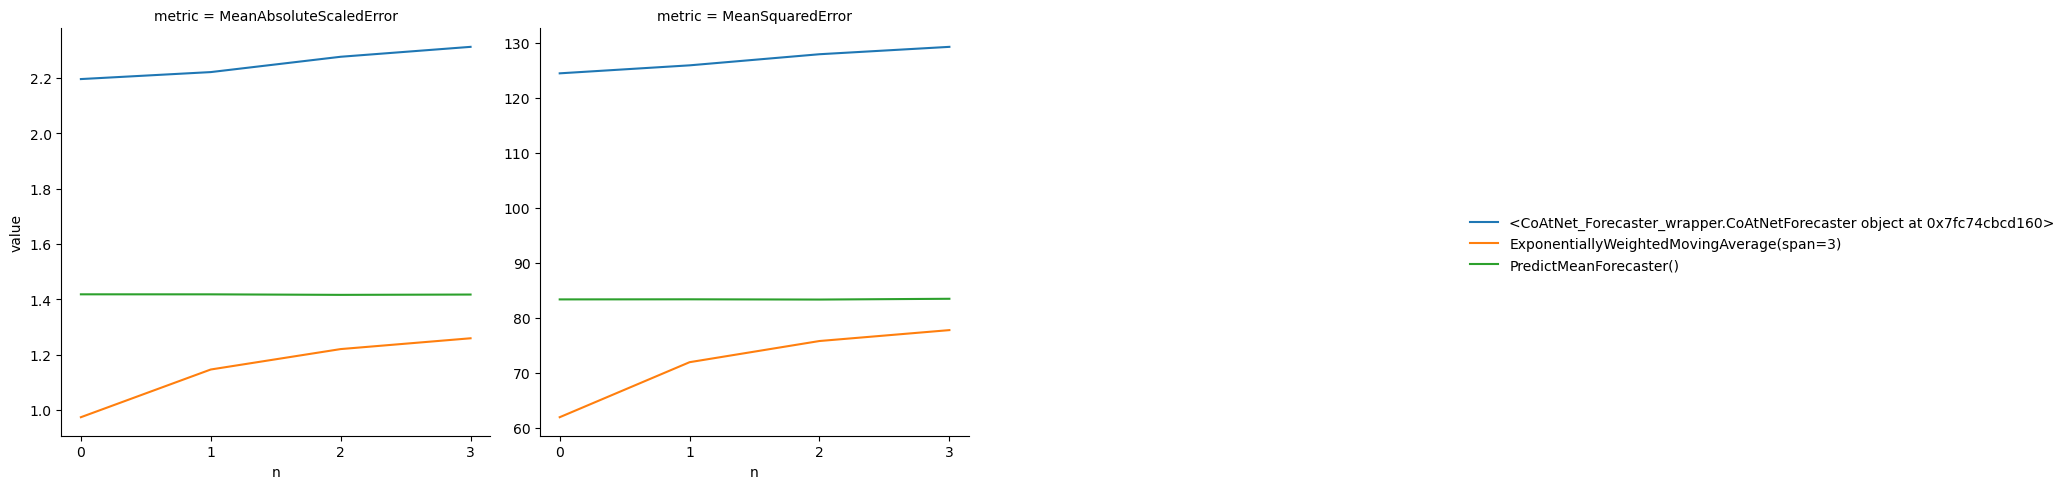

In [9]:
#args.use_gpu=True
#args.lr=0.0008
#args.batch_size=32
#args.train_epochs=2
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster object at 0x7fbd46b689a0>,2.257063,127.032896
PredictMeanForecaster(),1.417159,83.399297
ExponentiallyWeightedMovingAverage(span=3),1.149650,72.187592


MeanAbsoluteScaledError  \
model                                              n                            
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster o... 0                 2.209764   
                                                   1                 2.219412   
                                                   2                 2.291454   
                                                   3                 2.307622   
ExponentiallyWeightedMovingAverage(span=3)         0                 0.973619   
                                                   1                 1.146102   
                                                   2                 1.219915   
                                                   3                 1.258965   
PredictMeanForecaster()                            0                 1.417868   
                                                   1                 1.417793   
                                                   2                 1.415908   
                                                   3                 1.417067   

                                                      MeanSquaredError  
model                                              n                    
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster o... 0        124.792051  
                                                   1        125.329253  
                                                   2        128.327691  
                                                   3        128.714649  
ExponentiallyWeightedMovingAverage(span=3)         0         61.947120  
                                                   1         71.947654  
                                                   2         75.795944  
                                                   3         77.777505  
PredictMeanForecaster()                            0         83.359042  
                                                   1         83.375880  
                                                   2         83.331682  
                                                   3         83.473647

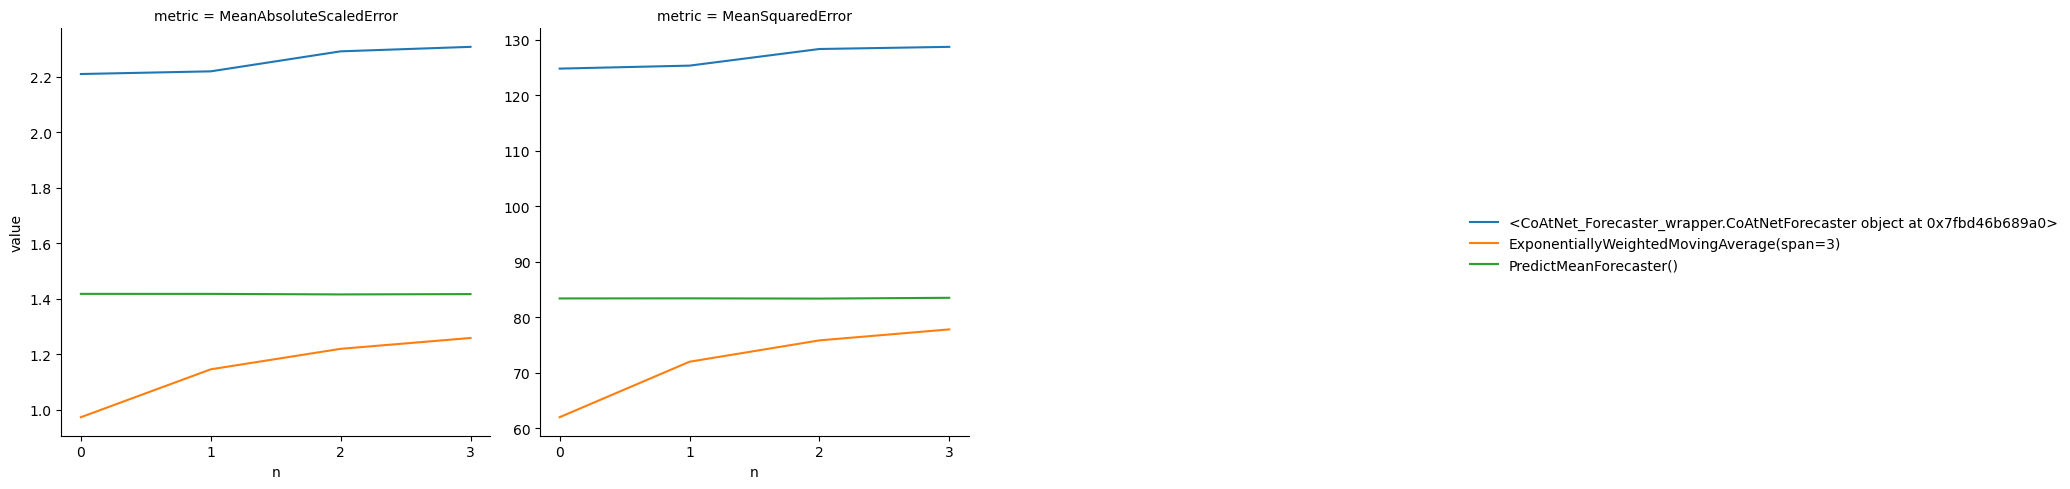

In [13]:
#args.use_gpu=True
#args.lr=0.0008
#args.batch_size=20
#args.train_epochs=2

metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster object at 0x7f82de009340>,2.471091,122.234135
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                              n                            
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster o... 0                 2.399954   
                                                   1                 2.404642   
                                                   2                 2.488319   
                                                   3                 2.591449   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<CoAtNet_Forecaster_wrapper.CoAtNetForecaster o... 0        115.854915  
                                                   1        116.694483  
                                                   2        119.494726  
                                                   3        126.103508  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

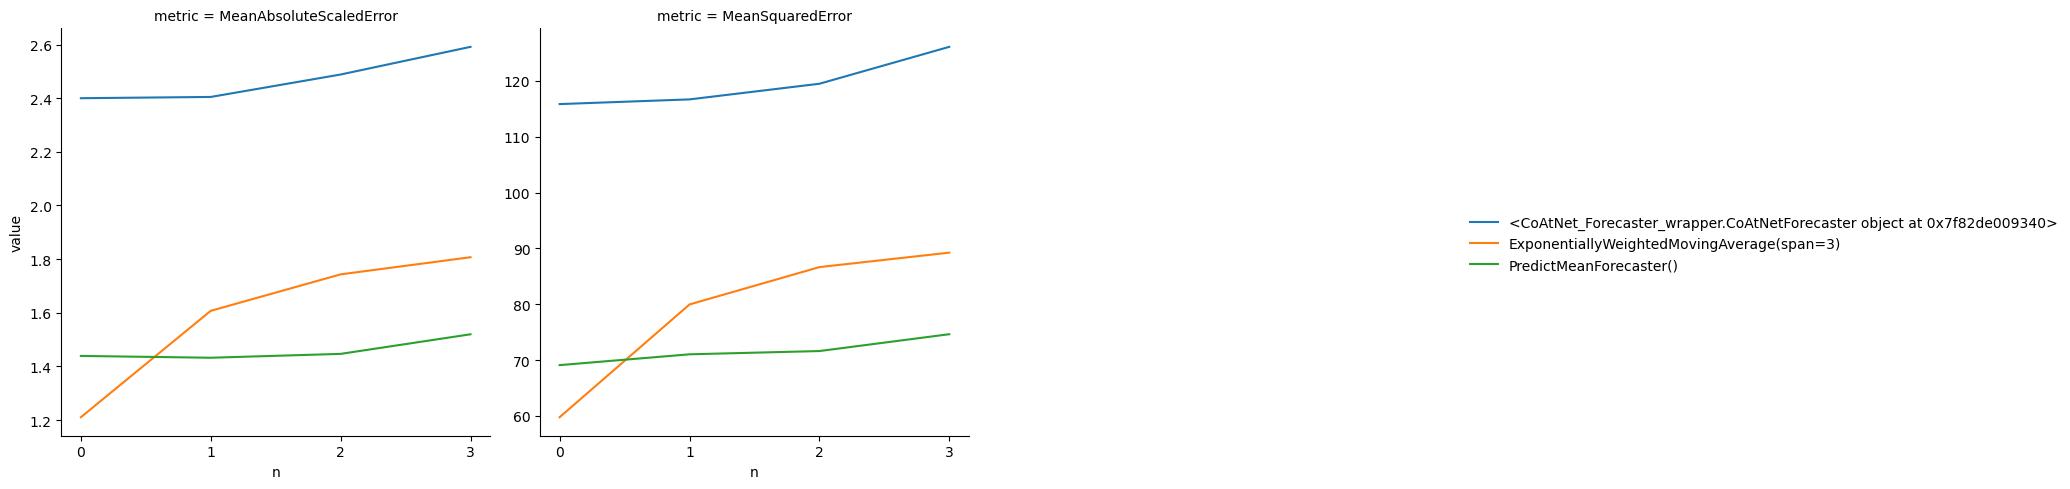

In [98]:
# args = dotdict()

# args.use_gpu=True
# args.lr=0.001
# args.batch_size=32
# args.train_epochs=2

metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))